# Supervised Machine Learning Techniques Assignment II with the Mortgage Probability of Default Data


*Yi-En Tseng, Aug 9th 2023*

1. Provide EDA (The distribution of Y by X) for the following variables. Write down the business insights for the variables. EDA is about the relationship between X and Y. So you can say something like "when X is high or low, Y is high or low". Reference the variable dictionary to give the business content. If you do the EDAs in a for loop, it will be very manageable.  
- AP001, AP003, AP008
- CR009, CR015, CR019
- PA022, PA023, PA029
- TD001, TD005, TD006, TD009, TD010, TD014

2. Feature Engineering: Perform the weight-of-evidence (WOE) transformation for the above variables according to "A Data Scientist’s Toolkit to Encode Categorical Variables to NumericLinks to an external site.".

3. Build a simple decision tree model or a logistic regression model with the above variables.

4. Build the RF model and experiment at least two sampling methods (under-sampling or over-sampling techniques). 

5. Build (1) the GBM (Gradient Boosting Machine) model and (2) the Deep Learning model.

6. Build (1) the GLM model and (2) the  autoML model

The criteria include ROC and the cumulative Lift. Make sure you read the H2O documentationLinks to an external site. for the hyper-parameters to test accordingly. You also can select or drop the variables to improve the model performance.

7. Apply SHAP Values to the data

* Scikit-learn decision tree methods need appropriate variable transformation including missing imputation or categorical binning, etc. Please see "Avoid These Deadly Modeling Mistakes that May Cost You a Career". If you are more familiar with R dplyr, you can prepare your modeling data in R, save as a .csv file, then just use scikit-learn for the SHAP Values.
* Please use the top variables learned from your previous models (RF) to run your scikit-learn random forest model.
* Please keep the top 10 variables.
* Please provide the following plots:
    * The summary_plot
    * The dependence_plot
    * The force_plot for 4 individual observations
* Interpretation is essential. You will provide extensive descriptions for your top 5 variables.
* The variable dictionary of this dataset does not provide much economic meaning. For those variables that you really cannot find more economic meanings, you can still say the relationships between the target and the predictors such as "AP003 shows a positive/megative relationship with the target variable".
* If your dataset is large, please take 10% or 20% samples.
* The random forest of scikit-learn needs you to create dummy variables for your categorical variables. For example if you have a variable with 4 categories, you will have 3 dummy variables. Each one has a value of 1 or 0. The 3 variables will enter your scikit-learn random forest model.
 


## Table of Contents
- <b>[Section 1 EDA](#1)</b>
- <b>[Section 2 Feature Engineering ](#2)</b>
  - [AP001](#31)
  - [AP003](#32)
  - [AP008](#33)
  - [CR009](#34)
  - [CR015](#35)
  - [CR019](#36)
  - [TD001](#37)
  - [TD002](#38)
  - [TD006](#39)
  - [TD009](#310)
  - [TD010](#311)
  - [TD014](#312)
  - [PA022](#313)
  - [PA023](#314)
  - [PA029](#315)
- <b>[Section 3 Random Forest](#3)</b>
- <b>[Section 4 Decision Tree](#4)</b>
- <b>[Section 5 GBM](#5)</b>
- <b>[Section 6 Deep Learning](#6)</b>
- <b>[Section 7 GLM](#7)</b>
- <b>[Section 8 AutoML](#8)</b>
- <b>[Section 9 SHAP](#9)</b>
 <p>&nbsp;</p>

## Section 1 EDA <a class="anchor" id="1"></a>
### Understand the variables
    Var	dtypes	    description	     Var Category
	AP001	Numeric	YR_AGE	Application
	AP003	Numeric	CODE_EDUCATION	Application
	AP008	Numeric	FLAG_IP_CITY_NOT_APPL_CITY	Application
    CR009	Numeric	AMT_LOAN_TOTAL	Credit Bureau
	CR015	Numeric	MONTH_CREDIT_CARD_MOB_MAX	Credit Bureau
	CR019	Numeric	SCORE_SINGLE_DEBIT_CARD_LIMIT	Credit Bureau
    PA022	Numeric	DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL	Call Detail
    PA023	Numeric	DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL	Call Detail
    PA029	Numeric	AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS	Call Detail
    TD001	Numeric	TD_CNT_QUERY_LAST_7Day_P2P	Credit Center
    TD002	Numeric	TD_CNT_QUERY_LAST_7Day_SMALL_LOAN	Credit Center
    TD006	Numeric	TD_CNT_QUERY_LAST_1MON_SMALL_LOAN	Credit Center
    TD009	Numeric	TD_CNT_QUERY_LAST_3MON_P2P	Credit Center
    TD010	Numeric	TD_CNT_QUERY_LAST_3MON_SMALL_LOAN	Credit Center
    TD014	Numeric	TD_CNT_QUERY_LAST_6MON_SMALL_LOAN	Credit Center

In [1]:
import pandas as pd
#path = '/Users/yientseng/Desktop/Classes/APAN 5420/L3/'
#df = pd.read_csv(path + 'XYZloan_default_selected_vars.csv')
df = pd.read_csv('XYZloan_default_selected_vars.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [2]:
columns_to_keep = ['id','loan_default','AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006','TD009', 'TD010', 'TD014']
df = df[columns_to_keep]
df.shape
df.describe()

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,79619.000000,79619.000000,79619.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000
mean,40000.500000,0.193600,31.706913,2.014925,3.117200,3.518711e+04,4.924750,6.199038,19.298811,14.828822,-42.407356,1.986962,3.593037,1.345700,5.40600,2.020812,2.603662
std,23094.155105,0.395121,7.075070,1.196806,1.306335,6.359684e+04,1.094305,3.359354,39.705478,37.009374,97.006168,1.807445,2.799570,1.413362,4.02311,1.973988,2.505840
min,1.000000,0.000000,20.000000,1.000000,1.000000,0.000000e+00,2.000000,1.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,20000.750000,0.000000,27.000000,1.000000,2.000000,4.700000e+03,5.000000,3.000000,-1.000000,-1.000000,-98.000000,1.000000,2.000000,0.000000,3.00000,1.000000,1.000000
50%,40000.500000,0.000000,30.000000,1.000000,3.000000,1.728500e+04,5.000000,5.000000,-1.000000,-1.000000,-98.000000,2.000000,3.000000,1.000000,4.00000,2.000000,2.000000
75%,60000.250000,0.000000,35.000000,3.000000,4.000000,4.075000e+04,6.000000,10.000000,41.000000,14.000000,26.000000,3.000000,5.000000,2.000000,7.00000,3.000000,4.000000
max,80000.000000,1.000000,56.000000,6.000000,5.000000,1.420300e+06,6.000000,12.000000,448.000000,448.000000,2872.000000,20.000000,24.000000,21.000000,46.00000,35.000000,43.000000


In [3]:
AP001_type = df.dtypes['AP001']
AP003_type = df.dtypes['AP003']
AP008_type = df.dtypes['AP008']
CR009_type = df.dtypes['CR009']
CR015_type = df.dtypes['CR009']
CR019_type = df.dtypes['CR009']
PA022_type = df.dtypes['PA022']
PA023_type = df.dtypes['PA023']
PA029_type = df.dtypes['PA029']
TD001_type = df.dtypes['TD001']
TD005_type = df.dtypes['TD005']
TD006_type = df.dtypes['TD006']
TD009_type = df.dtypes['TD009']
TD010_type = df.dtypes['TD010']
TD014_type = df.dtypes['TD014']
print(AP001_type, AP003_type, AP008_type,CR009_type, CR015_type, CR019_type,PA022_type, PA023_type, PA029_type)
print(TD001_type, TD005_type, TD006_type, TD009_type, TD010_type, TD014_type)

int64 int64 int64 int64 int64 int64 float64 float64 float64
int64 int64 int64 int64 int64 int64


In [4]:
#Examine missing data, only in 3 variables 'PA022', 'PA023', 'PA029'
#is_missing_PA022 = df['PA022'].isna().any()
#is_missing_PA022 TRUE
#is_missing_PA023 = df['PA023'].isna().any()
#is_missing_PA023 TRUE
#is_missing_PA029 = df['PA029'].isna().any()
#is_missing_PA029 TRUE

In [5]:
variables = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006','TD009', 'TD010', 'TD014']
target_variable = 'loan_default'

for var in variables:
    # Calculating the average loan_default for different values of X
    avg_loan_default_by_X = df.groupby(var)[target_variable].mean()
    print(f'Average {target_variable} by {var}:')
    print(avg_loan_default_by_X)
    print('\n')

Average loan_default by AP001:
AP001
20    0.221239
21    0.264848
22    0.208487
23    0.204638
24    0.200047
25    0.204809
26    0.201072
27    0.211450
28    0.198194
29    0.190930
30    0.197074
31    0.194540
32    0.189284
33    0.188460
34    0.187583
35    0.178831
36    0.178732
37    0.173545
38    0.182713
39    0.181269
40    0.194564
41    0.180445
42    0.183333
43    0.179156
44    0.181818
45    0.165138
46    0.178610
47    0.192771
48    0.169839
49    0.166124
50    0.185819
51    0.173913
52    0.193309
53    0.135036
54    0.155797
55    0.206061
56    0.160000
Name: loan_default, dtype: float64


Average loan_default by AP003:
AP003
1    0.221034
3    0.173948
4    0.125853
5    0.060345
6    0.000000
Name: loan_default, dtype: float64


Average loan_default by AP008:
AP008
1    0.168286
2    0.179188
3    0.195604
4    0.209325
5    0.209394
Name: loan_default, dtype: float64


Average loan_default by CR009:
CR009
0          0.171687
50         0.000000
99    

In [6]:
# Plot for each column
import matplotlib.pyplot as plt
def plot_histogram(data_frame, column_name):
    %matplotlib inline
    # Check if the column_name exists in the DataFrame
    if column_name not in data_frame.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    # Plot the histogram
    data_frame[column_name].hist()


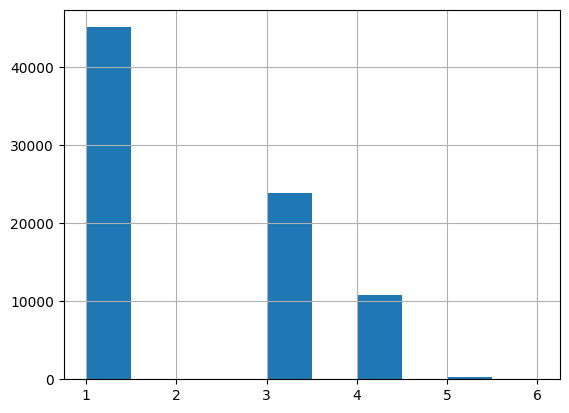

In [7]:
plot_histogram(df, 'AP003')

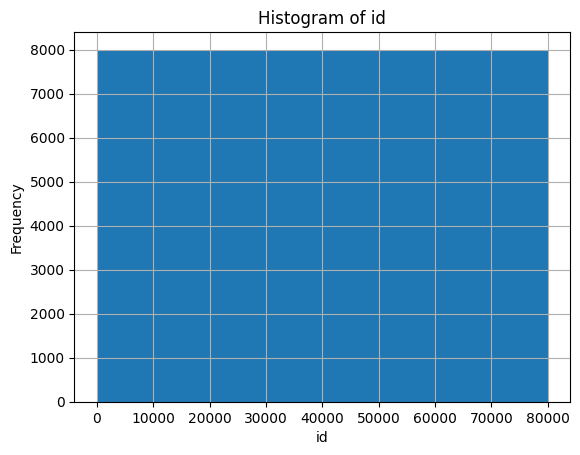

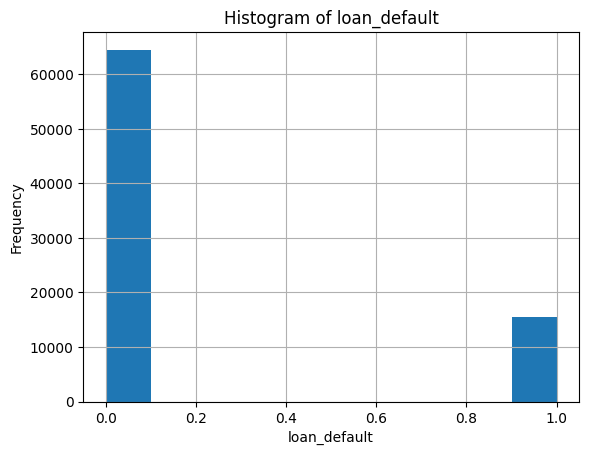

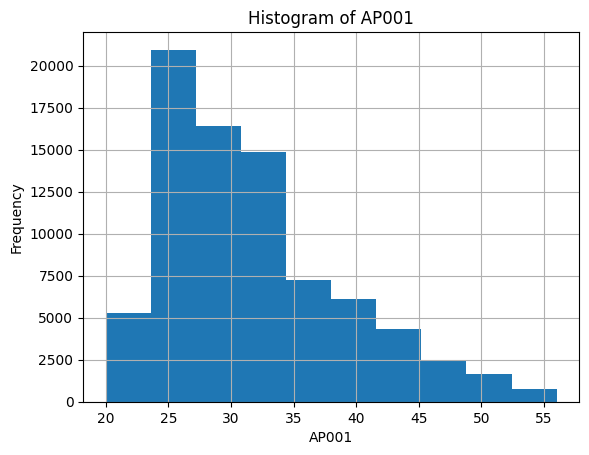

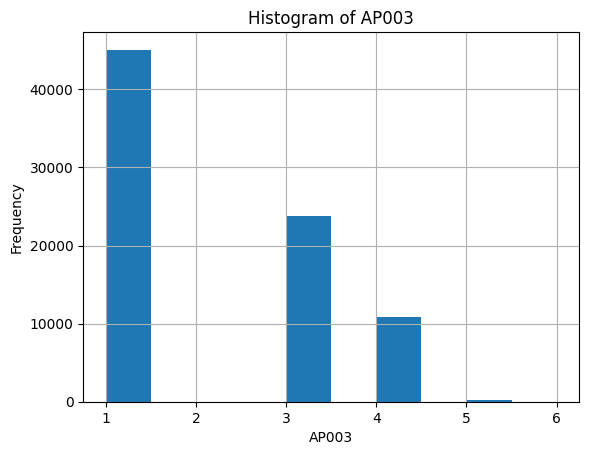

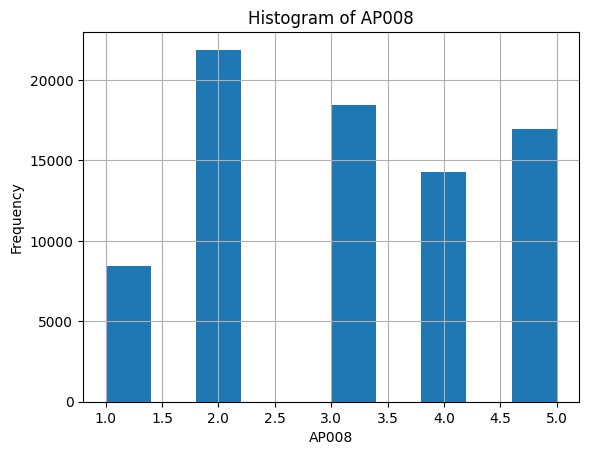

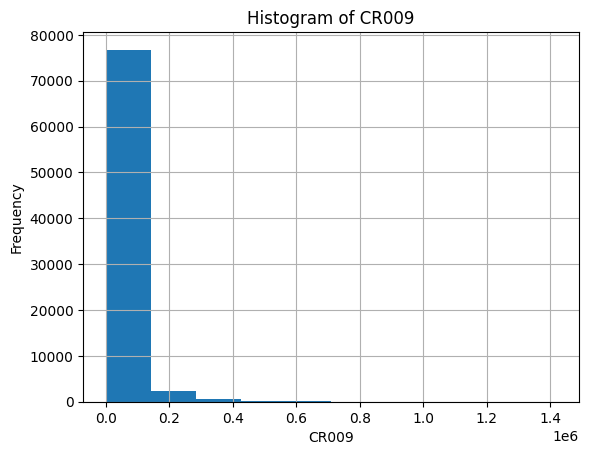

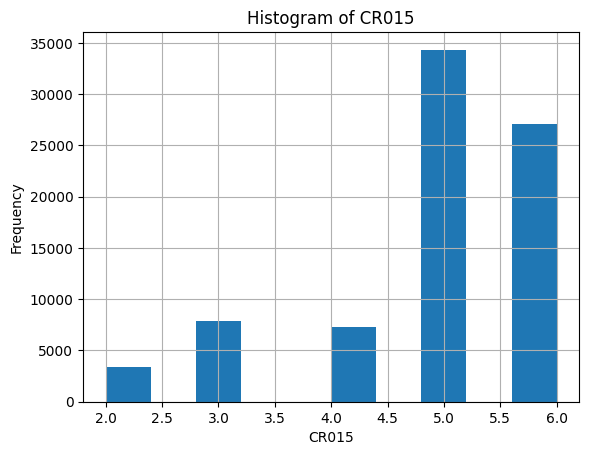

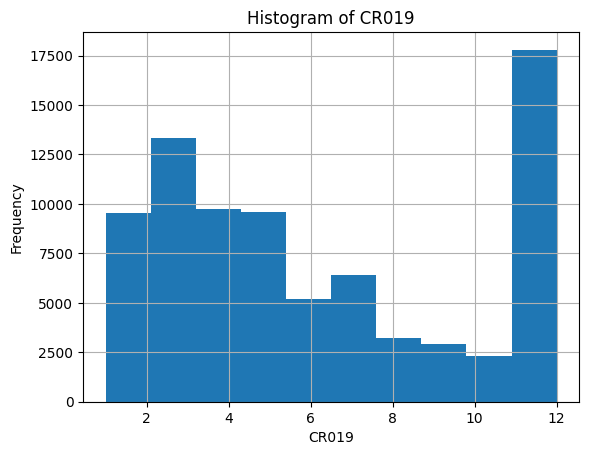

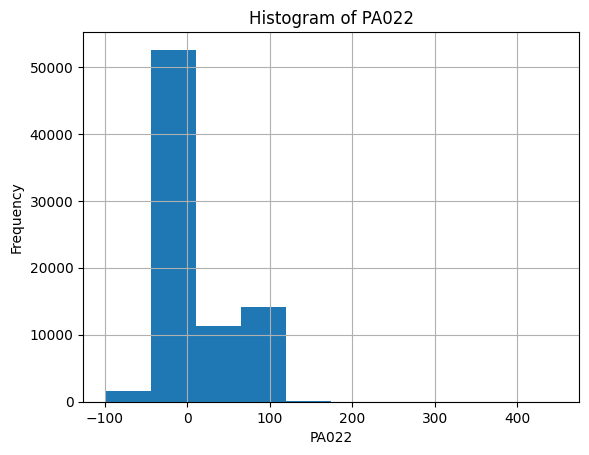

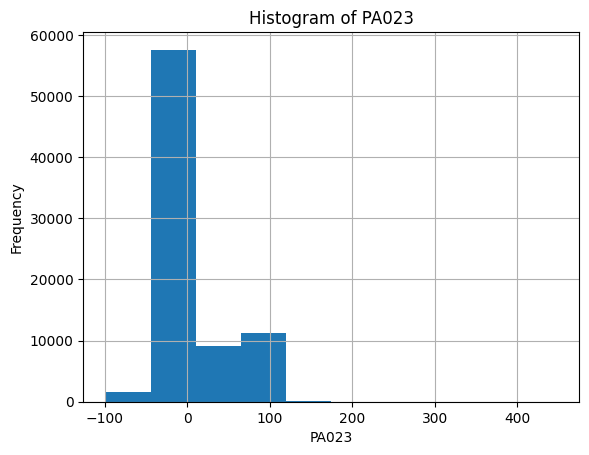

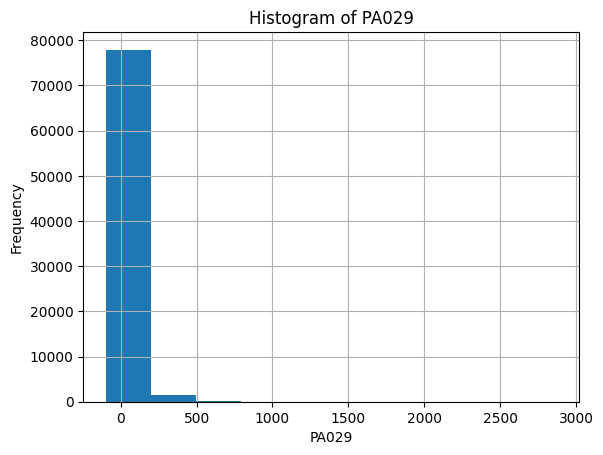

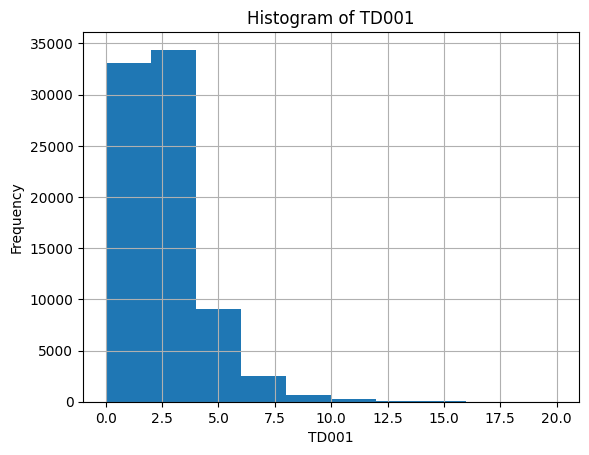

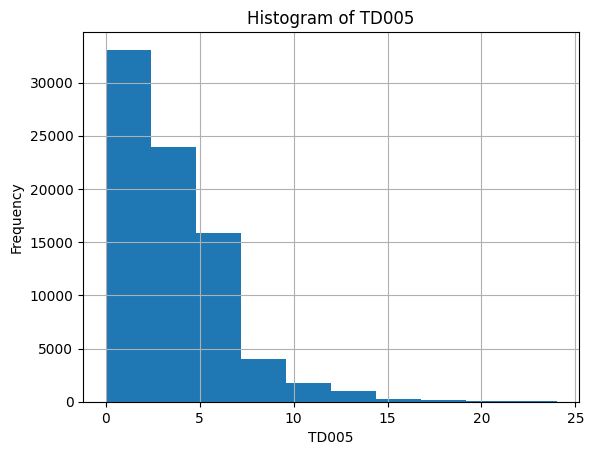

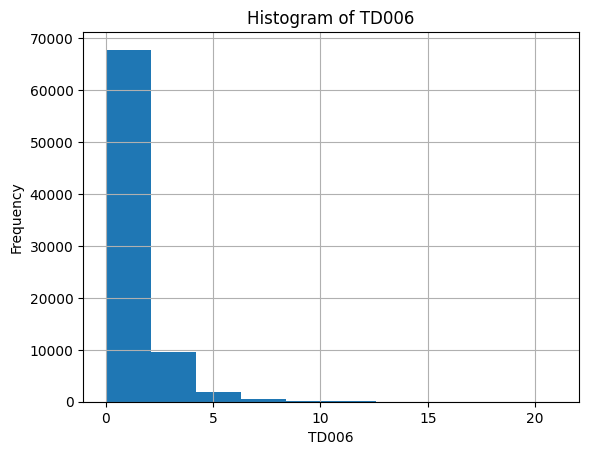

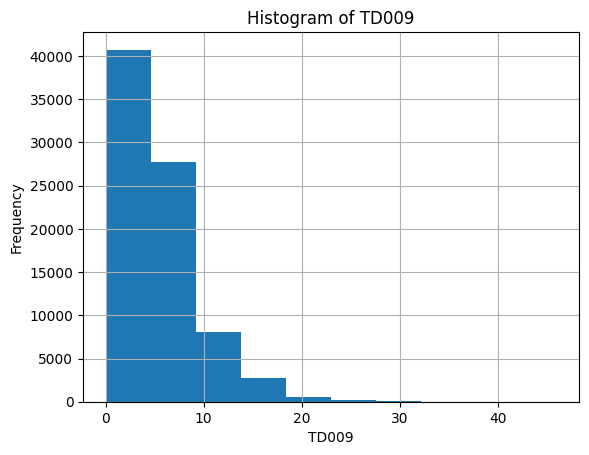

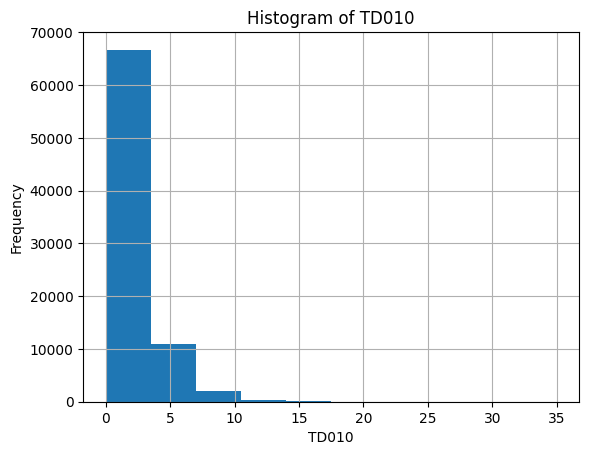

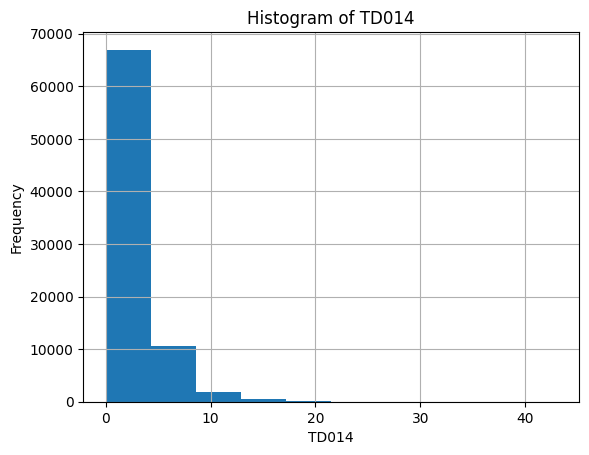

In [8]:
# Plot for all columns
def plot_histograms_for_all_columns(data_frame):
    %matplotlib inline
    for column_name in data_frame.columns:
        data_frame[column_name].hist()
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

plot_histograms_for_all_columns(df)

## Section 2 Feature Engineering <a class="anchor" id="2"></a>
### Define Functions & Split Data

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# Variables for WOE transformation
variables = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
target_variable = 'loan_default'

# Splitting data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
#Define function of WOE for train data
def WOE(var):
    train_df[var] = train_df[var].fillna('NoData')
    k = train_df[[var,'loan_default']].groupby(var)['loan_default'].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Good']
    k['Bad'] = k['Count'] - k['Good']
    k['Good %'] = (k['Good'] / k['Good'].sum()*100).round(2)
    k['Bad %'] = (k['Bad'] / k['Bad'].sum()*100).round(2)
    k[var+'_WOE'] = np.log(k['Good %'] / k['Bad %']).round(2)
    k = k.sort_values(by=var+'_WOE')
    return(k)

### AP001 (YR_AGE): <a class="anchor" id="31"></a>
- A numeric variable representing the applicant's age.
- By analyzing the histogram and average loan_default values, we can understand if there is any correlation between age and the likelihood of defaulting on a loan. For instance, if younger individuals have a higher average loan_default, it suggests that age may be a significant factor in loan default risk.

In [11]:
k = WOE('AP001')
k

,AP001,Count,Good,Bad,Good %,Bad %,AP001_WOE
33,53,224,31,193,0.25,0.37,-0.39
31,51,294,47,247,0.38,0.48,-0.23
34,54,220,37,183,0.30,0.35,-0.15
28,48,530,90,440,0.73,0.85,-0.15
25,45,788,135,653,1.09,1.26,-0.14
17,37,1530,264,1266,2.14,2.45,-0.14
16,36,1941,338,1603,2.74,3.10,-0.12
29,49,494,87,407,0.71,0.79,-0.11
24,44,790,140,650,1.13,1.26,-0.11
19,39,1325,234,1091,1.90,2.11,-0.10


In [12]:
#Append the WOE value of feature back to the original train data
#train_df_AP001_WOE = pd.merge(train_df[['loan_default','AP001']],k[['AP001','AP001_WOE']],
#     left_on='AP001',
#     right_on='AP001',how='left')
#train_df_AP001_WOE.head(10)

train_df_WOE_AP001 = pd.merge(train_df, k[['AP001', 'AP001_WOE']],
                             left_on='AP001',
                             right_on='AP001', how='left')
train_df_WOE_AP001.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,AP001_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,-98.0,5,8,3,14,5,5,-0.03
1,35563,1,47,1,2,0,6,12,87.0,87.0,17.5,2,2,0,2,1,1,-0.04
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,-98.0,2,3,1,6,2,2,0.01
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,-98.0,5,9,3,9,3,3,-0.03
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,-98.0,2,2,0,2,0,0,-0.09
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,-98.0,5,11,3,11,4,4,0.04
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,-98.0,3,4,1,6,3,3,-0.09
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,-98.0,4,4,1,6,1,1,0.04
8,56100,1,26,3,5,20799,5,5,12.0,12.0,96.0,4,9,1,10,1,2,0.04
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,52.0,2,3,3,5,3,3,-0.14


In [13]:
#Append the WOE table to the test data
test_df_WOE_AP001 = pd.merge(test_df, k[['AP001', 'AP001_WOE']],
                             left_on='AP001',
                             right_on='AP001', how='left')
test_df_WOE_AP001.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,AP001_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,-98.000000,2,2,1,2,1,1,0.04
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,-98.000000,2,4,1,7,1,2,-0.04
2,74784,0,29,4,5,33000,5,11,51.0,51.0,7.000000,1,3,1,4,1,1,-0.03
3,70976,1,28,1,5,3000,5,3,85.0,85.0,120.285714,1,1,3,1,3,4,0.04
4,46646,0,27,1,3,48219,5,11,58.0,58.0,180.000000,4,7,2,15,5,6,0.10
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,-98.000000,5,7,0,8,3,4,-0.04
6,65510,0,23,3,1,8100,2,3,75.0,75.0,139.000000,9,14,6,25,8,11,0.04
7,62716,0,36,1,3,0,5,3,115.0,115.0,17.000000,2,3,0,3,1,2,-0.12
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,-98.000000,2,5,1,8,2,6,0.41
9,58835,0,24,3,2,60877,5,10,52.0,23.0,164.000000,3,3,1,6,2,3,0.04


In [14]:
#Append the WOE table to the test data
#test_df_AP001_WOE = pd.merge(test_df[['loan_default','AP001']],k[['AP001','AP001_WOE']],
#     left_on='AP001',
#     right_on='AP001',how='left')
#test_df_AP001_WOE.head(10)

In [15]:
nan_check = test_df_WOE_AP001['AP001_WOE'].isna()
nan_values = test_df_WOE_AP001['AP001_WOE'][nan_check]
nan_values

Series([], Name: AP001_WOE, dtype: float64)

In [16]:
nan_check = train_df_WOE_AP001['AP001_WOE'].isna()
nan_values = train_df_WOE_AP001['AP001_WOE'][nan_check]
nan_values

Series([], Name: AP001_WOE, dtype: float64)

### AP003 (CODE_EDUCATION): <a class="anchor" id="32"></a>
- A numeric variable representing the applicant's education level.
- This variable's distribution and average loan_default values can provide insights into the relationship between education level and loan default. If higher education levels correspond to lower average loan_default, it indicates that education may serve as a protective factor against default.

In [17]:
k = WOE('AP003')
k
#Need to bin this variables

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,AP003,Count,Good,Bad,Good %,Bad %,AP003_WOE
4,6,12,0,12,0.00,0.02,-inf
3,5,187,11,176,0.09,0.34,-1.33
2,4,8672,1107,7565,8.97,14.64,-0.49
1,3,19072,3301,15771,26.75,30.53,-0.13
0,1,36057,7919,28138,64.18,54.47,0.16


In [18]:
#train_df['AP003_bin'] = pd.qcut(train_df['AP003'],5,duplicates='drop').values.add_categories("NoData")
#train_df['AP003_bin'] = train_df['AP003_bin'].fillna("NoData").astype(str)
#train_df['AP003_bin'].value_counts(dropna=False)

#pd.cut: Given the values 0, 1, 3, 4, and 5, here's how they would be categorized based on the default behavior:
#0 will belong to the bin interval [0, 1.2)
#1 will belong to the bin interval [0, 1.2)
#3 will belong to the bin interval [2.4, 3.6)
#4 will belong to the bin interval [3.6, 4.8)
#5 will belong to the bin interval [4.8, 6)

#train_df['AP003_bin'] = pd.cut(train_df['AP003'], bins=5, duplicates='drop', labels=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])
#train_df['AP003_bin'] = train_df['AP003_bin'].astype(str).fillna("NoData")
#train_df['AP003_bin'].value_counts(dropna=False)

#Still has -inf value


In [19]:
#Bin the train data
train_df['AP003_bin'] = pd.qcut(train_df['AP003'],5,duplicates='drop').values.add_categories("NoData")
train_df['AP003_bin'] = train_df['AP003_bin'].fillna("NoData").astype(str)
train_df['AP003_bin'].value_counts(dropna=False)

(0.999, 3.0]    55129
(3.0, 6.0]       8871
Name: AP003_bin, dtype: int64

In [20]:
k = WOE('AP003_bin')
k

,AP003_bin,Count,Good,Bad,Good %,Bad %,AP003_bin_WOE
1,"(3.0, 6.0]",8871,1118,7753,9.06,15.01,-0.50
0,"(0.999, 3.0]",55129,11220,43909,90.94,84.99,0.07


In [21]:
train_df

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,AP003_bin
3822,3823,0,29,4,2,37635,5,5,-1.0,-1.0,-98.0,5,8,3,14,5,5,"(3.0, 6.0]"
35562,35563,1,47,1,2,0,6,12,87.0,87.0,17.5,2,2,0,2,1,1,"(0.999, 3.0]"
4883,4884,0,31,1,5,47506,5,12,-1.0,-1.0,-98.0,2,3,1,6,2,2,"(0.999, 3.0]"
71170,71171,0,29,3,4,22037,6,5,-1.0,-1.0,-98.0,5,9,3,9,3,3,"(0.999, 3.0]"
25665,25666,0,35,4,3,67400,6,7,-1.0,-1.0,-98.0,2,2,0,2,0,0,"(3.0, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,6266,0,25,3,3,12000,5,3,-1.0,-1.0,-98.0,4,4,1,5,1,2,"(0.999, 3.0]"
54886,54887,0,31,3,4,60300,6,5,69.0,-1.0,39.0,2,4,1,5,1,1,"(0.999, 3.0]"
76820,76821,0,28,3,2,45167,5,3,-1.0,-1.0,-98.0,2,13,3,14,3,3,"(0.999, 3.0]"
860,861,1,28,1,5,59111,6,11,-1.0,-1.0,-98.0,1,2,2,8,2,2,"(0.999, 3.0]"


In [22]:
train_df_WOE_AP003 = pd.merge(train_df, k[['AP003_bin', 'AP003_bin_WOE']],
                             left_on='AP003_bin',
                             right_on='AP003_bin', how='left')
train_df_WOE_AP003.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,AP003_bin,AP003_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,-98.0,5,8,3,14,5,5,"(3.0, 6.0]",-0.50
1,35563,1,47,1,2,0,6,12,87.0,87.0,17.5,2,2,0,2,1,1,"(0.999, 3.0]",0.07
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,-98.0,2,3,1,6,2,2,"(0.999, 3.0]",0.07
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,-98.0,5,9,3,9,3,3,"(0.999, 3.0]",0.07
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,-98.0,2,2,0,2,0,0,"(3.0, 6.0]",-0.50
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,-98.0,5,11,3,11,4,4,"(0.999, 3.0]",0.07
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,-98.0,3,4,1,6,3,3,"(0.999, 3.0]",0.07
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,-98.0,4,4,1,6,1,1,"(0.999, 3.0]",0.07
8,56100,1,26,3,5,20799,5,5,12.0,12.0,96.0,4,9,1,10,1,2,"(0.999, 3.0]",0.07
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,52.0,2,3,3,5,3,3,"(0.999, 3.0]",0.07


In [23]:
#train_df_WOE_AP003_usedtomerge = train_df_WOE_AP003.drop(columns=train_df_WOE_AP003.columns.difference(['AP003', 'AP003_bin']))
#train_df_WOE_AP003_usedtomerge

In [24]:
#Merge the WOE value of each category with the train data
#train_df_AP003_WOE = pd.merge(train_df[['loan_default','AP003''AP003_bin']],k[['AP003_bin','AP003_bin_WOE']],
#     left_on='AP003_bin',
#     right_on='AP003_bin',how='left')
#train_df_AP003_WOE.head(10)

#train_df_WOE = pd.merge(train_df_WOE, train_df_usedtomerge[['AP003', 'AP003_bin']],
#                             left_on='AP003',
#                             right_on='AP003', how='left')
#train_df_WOE.head(10)


In [25]:
nan_check = train_df_WOE_AP003['AP003_bin_WOE'].isna()
nan_values = train_df_WOE_AP003['AP003_bin_WOE'][nan_check]
nan_values

Series([], Name: AP003_bin_WOE, dtype: float64)

In [26]:
#Append the WOE value of each category back to the original train data
#train_df['AP003_WOE']=train_df_WOE_AP003['AP003_bin_WOE']

In [27]:
# Define the desired bin labels
bin_labels = ["(0.999, 3.0]", "(3.0, 6.0]"]
# Bin the test data with the specified labels
test_df['AP003_bin_labels'] = pd.qcut(test_df['AP003'], 5, duplicates='drop', labels=False)
# Map the bin labels to the original binning ranges
test_df['AP003_bin'] = pd.qcut(test_df['AP003'], 5, duplicates='drop', labels=bin_labels)
# Replace NaN values with "NoData"
test_df['AP003_bin'] = test_df['AP003_bin'].fillna("NoData")
# Print the value counts
test_df['AP003_bin'].value_counts(dropna=False)


(0.999, 3.0]    13779
(3.0, 6.0]       2221
Name: AP003_bin, dtype: int64

In [28]:
test_df

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,AP003_bin_labels,AP003_bin
47044,47045,0,30,3,3,10000,5,5,25.0,25.0,-98.000000,2,2,1,2,1,1,0,"(0.999, 3.0]"
44295,44296,0,33,3,5,27288,5,5,-1.0,-1.0,-98.000000,2,4,1,7,1,2,0,"(0.999, 3.0]"
74783,74784,0,29,4,5,33000,5,11,51.0,51.0,7.000000,1,3,1,4,1,1,1,"(3.0, 6.0]"
70975,70976,1,28,1,5,3000,5,3,85.0,85.0,120.285714,1,1,3,1,3,4,0,"(0.999, 3.0]"
46645,46646,0,27,1,3,48219,5,11,58.0,58.0,180.000000,4,7,2,15,5,6,0,"(0.999, 3.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67666,67667,0,41,1,5,46967,6,11,56.0,56.0,0.000000,2,3,2,4,4,4,0,"(0.999, 3.0]"
51146,51147,0,39,1,2,25796,6,2,91.0,91.0,59.500000,4,11,3,14,4,5,0,"(0.999, 3.0]"
42494,42495,1,31,1,2,0,5,3,-1.0,-1.0,-98.000000,3,3,1,3,1,2,0,"(0.999, 3.0]"
52517,52518,0,34,1,1,3600,3,2,-1.0,-1.0,-98.000000,3,3,1,3,1,2,0,"(0.999, 3.0]"


In [29]:
#Append the WOE table to the test data
#test_df_WOE_AP003 = pd.merge(test_df[['id','loan_default','AP003','AP003_bin']],k[['AP003_bin','AP003_bin_WOE']],
#     left_on='AP003_bin',
#     right_on='AP003_bin',how='left')
#test_df_AP003_WOE.head(10)
#TD010 way
test_df_WOE_AP003 = pd.merge(test_df, k[['AP003_bin', 'AP003_bin_WOE']],
                             left_on='AP003_bin',
                             right_on='AP003_bin', how='left')
test_df_WOE_AP003.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,AP003_bin_labels,AP003_bin,AP003_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,-98.000000,2,2,1,2,1,1,0,"(0.999, 3.0]",0.07
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,-98.000000,2,4,1,7,1,2,0,"(0.999, 3.0]",0.07
2,74784,0,29,4,5,33000,5,11,51.0,51.0,7.000000,1,3,1,4,1,1,1,"(3.0, 6.0]",-0.50
3,70976,1,28,1,5,3000,5,3,85.0,85.0,120.285714,1,1,3,1,3,4,0,"(0.999, 3.0]",0.07
4,46646,0,27,1,3,48219,5,11,58.0,58.0,180.000000,4,7,2,15,5,6,0,"(0.999, 3.0]",0.07
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,-98.000000,5,7,0,8,3,4,1,"(3.0, 6.0]",-0.50
6,65510,0,23,3,1,8100,2,3,75.0,75.0,139.000000,9,14,6,25,8,11,0,"(0.999, 3.0]",0.07
7,62716,0,36,1,3,0,5,3,115.0,115.0,17.000000,2,3,0,3,1,2,0,"(0.999, 3.0]",0.07
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,-98.000000,2,5,1,8,2,6,0,"(0.999, 3.0]",0.07
9,58835,0,24,3,2,60877,5,10,52.0,23.0,164.000000,3,3,1,6,2,3,0,"(0.999, 3.0]",0.07


In [30]:
nan_check = test_df_WOE_AP003['AP003_bin_WOE'].isna()
nan_values = test_df_WOE_AP003['AP003_bin_WOE'][nan_check]
nan_values

Series([], Name: AP003_bin_WOE, dtype: float64)

### AP008 (FLAG_IP_CITY_NOT_APPL_CITY): <a class="anchor" id="33"></a>
- Numeric variable indicating whether the applicant's current city is different from the city of application.
- This flag variable can reveal the impact of residing in the same city as the applied city on loan default, suggesting that geographical factors play a role in loan repayment behavior.

In [31]:
k = WOE('AP008')
k

,AP008,Count,Good,Bad,Good %,Bad %,AP008_WOE
0,1,6788,1107,5681,8.97,11.00,-0.20
1,2,17470,3119,14351,25.28,27.78,-0.09
2,3,14818,2902,11916,23.52,23.07,0.02
3,4,11381,2356,9025,19.10,17.47,0.09
4,5,13543,2854,10689,23.13,20.69,0.11


In [32]:
#Append the WOE value of feature back to the original train data
train_df_WOE_AP008 = pd.merge(train_df, k[['AP008', 'AP008_WOE']],
                             left_on='AP008',
                             right_on='AP008', how='left')
train_df_WOE_AP008.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,AP003_bin,AP008_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,-98.0,5,8,3,14,5,5,"(3.0, 6.0]",-0.09
1,35563,1,47,1,2,0,6,12,87.0,87.0,17.5,2,2,0,2,1,1,"(0.999, 3.0]",-0.09
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,-98.0,2,3,1,6,2,2,"(0.999, 3.0]",0.11
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,-98.0,5,9,3,9,3,3,"(0.999, 3.0]",0.09
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,-98.0,2,2,0,2,0,0,"(3.0, 6.0]",0.02
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,-98.0,5,11,3,11,4,4,"(0.999, 3.0]",-0.09
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,-98.0,3,4,1,6,3,3,"(0.999, 3.0]",0.11
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,-98.0,4,4,1,6,1,1,"(0.999, 3.0]",0.11
8,56100,1,26,3,5,20799,5,5,12.0,12.0,96.0,4,9,1,10,1,2,"(0.999, 3.0]",0.11
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,52.0,2,3,3,5,3,3,"(0.999, 3.0]",0.02


In [33]:
#Append the WOE table to the test data
test_df_WOE_AP008 = pd.merge(test_df, k[['AP008', 'AP008_WOE']],
                             left_on='AP008',
                             right_on='AP008', how='left')
test_df_WOE_AP008.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,AP003_bin_labels,AP003_bin,AP008_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,-98.000000,2,2,1,2,1,1,0,"(0.999, 3.0]",0.02
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,-98.000000,2,4,1,7,1,2,0,"(0.999, 3.0]",0.11
2,74784,0,29,4,5,33000,5,11,51.0,51.0,7.000000,1,3,1,4,1,1,1,"(3.0, 6.0]",0.11
3,70976,1,28,1,5,3000,5,3,85.0,85.0,120.285714,1,1,3,1,3,4,0,"(0.999, 3.0]",0.11
4,46646,0,27,1,3,48219,5,11,58.0,58.0,180.000000,4,7,2,15,5,6,0,"(0.999, 3.0]",0.02
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,-98.000000,5,7,0,8,3,4,1,"(3.0, 6.0]",-0.20
6,65510,0,23,3,1,8100,2,3,75.0,75.0,139.000000,9,14,6,25,8,11,0,"(0.999, 3.0]",-0.20
7,62716,0,36,1,3,0,5,3,115.0,115.0,17.000000,2,3,0,3,1,2,0,"(0.999, 3.0]",0.02
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,-98.000000,2,5,1,8,2,6,0,"(0.999, 3.0]",0.02
9,58835,0,24,3,2,60877,5,10,52.0,23.0,164.000000,3,3,1,6,2,3,0,"(0.999, 3.0]",-0.09


In [34]:
nan_check = test_df_WOE_AP008['AP008_WOE'].isna()
nan_values = test_df_WOE_AP008['AP008_WOE'][nan_check]
nan_values


Series([], Name: AP008_WOE, dtype: float64)

In [35]:
nan_check = train_df_WOE_AP008['AP008_WOE'].isna()
nan_values = train_df_WOE_AP008['AP008_WOE'][nan_check]
nan_values

Series([], Name: AP008_WOE, dtype: float64)

### CR009 (AMT_LOAN_TOTAL): <a class="anchor" id="34"></a>
- A numeric variable representing the total loan amount reported by the credit bureau.
- This variable represents the total loan amount reported by the credit bureau. Higher values of AMT_LOAN_TOTAL indicate larger loan amounts, suggesting that individuals with higher loan amounts may have a greater financial commitment or higher borrowing capacity.

In [36]:
k = WOE('CR009')
k

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,CR009,Count,Good,Bad,Good %,Bad %,CR009_WOE
3296,12050,4,0,4,0.0,0.01,-inf
3741,13257,4,0,4,0.0,0.01,-inf
17901,88500,5,0,5,0.0,0.01,-inf
3695,13125,3,0,3,0.0,0.01,-inf
8695,27288,3,0,3,0.0,0.01,-inf
...,...,...,...,...,...,...,...
21847,1214822,1,0,1,0.0,0.00,NaN
21848,1238000,1,0,1,0.0,0.00,NaN
21849,1243934,1,0,1,0.0,0.00,NaN
21851,1381000,1,0,1,0.0,0.00,NaN


In [37]:
#Bin the train data
train_df['CR009_bin'] = pd.qcut(train_df['CR009'],5,duplicates='drop').values.add_categories("NoData")
train_df['CR009_bin'] = train_df['CR009_bin'].fillna("NoData").astype(str)
train_df['CR009_bin'].value_counts(dropna=False)

(24221.8, 50000.0]      13072
(-0.001, 2500.0]        13072
(11484.4, 24221.8]      12800
(50000.0, 1420300.0]    12528
(2500.0, 11484.4]       12528
Name: CR009_bin, dtype: int64

In [38]:
k = WOE('CR009_bin')
k

,CR009_bin,Count,Good,Bad,Good %,Bad %,CR009_bin_WOE
4,"(50000.0, 1420300.0]",12528,2158,10370,17.49,20.07,-0.14
0,"(-0.001, 2500.0]",13072,2338,10734,18.95,20.78,-0.09
1,"(11484.4, 24221.8]",12800,2615,10185,21.19,19.71,0.07
2,"(24221.8, 50000.0]",13072,2658,10414,21.54,20.16,0.07
3,"(2500.0, 11484.4]",12528,2569,9959,20.82,19.28,0.08


In [39]:
#Append the WOE value of each category back to the original train data
train_df_WOE_CR009 = pd.merge(train_df, k[['CR009_bin', 'CR009_bin_WOE']],
                             left_on='CR009_bin',
                             right_on='CR009_bin', how='left')
train_df_WOE_CR009.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014,AP003_bin,CR009_bin,CR009_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,-98.0,5,8,3,14,5,5,"(3.0, 6.0]","(24221.8, 50000.0]",0.07
1,35563,1,47,1,2,0,6,12,87.0,87.0,17.5,2,2,0,2,1,1,"(0.999, 3.0]","(-0.001, 2500.0]",-0.09
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,-98.0,2,3,1,6,2,2,"(0.999, 3.0]","(24221.8, 50000.0]",0.07
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,-98.0,5,9,3,9,3,3,"(0.999, 3.0]","(11484.4, 24221.8]",0.07
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,-98.0,2,2,0,2,0,0,"(3.0, 6.0]","(50000.0, 1420300.0]",-0.14
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,-98.0,5,11,3,11,4,4,"(0.999, 3.0]","(24221.8, 50000.0]",0.07
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,-98.0,3,4,1,6,3,3,"(0.999, 3.0]","(-0.001, 2500.0]",-0.09
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,-98.0,4,4,1,6,1,1,"(0.999, 3.0]","(-0.001, 2500.0]",-0.09
8,56100,1,26,3,5,20799,5,5,12.0,12.0,96.0,4,9,1,10,1,2,"(0.999, 3.0]","(11484.4, 24221.8]",0.07
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,52.0,2,3,3,5,3,3,"(0.999, 3.0]","(50000.0, 1420300.0]",-0.14


In [40]:
nan_check = train_df_WOE_CR009['CR009_bin_WOE'].isna()
nan_values = train_df_WOE_CR009['CR009_bin_WOE'][nan_check]
nan_values

Series([], Name: CR009_bin_WOE, dtype: float64)

In [41]:
# Define the desired bin labels
bin_labels = ["(24221.8, 50000.0]", "(-0.001, 2500.0]","(11484.4, 24221.8]","(50000.0, 1420300.0]","(2500.0, 11484.4]"]
# Bin the test data with the specified labels
test_df['CR009_bin_labels'] = pd.qcut(test_df['CR009'], 5, duplicates='drop', labels=False)
# Map the bin labels to the original binning ranges
test_df['CR009_bin'] = pd.qcut(test_df['CR009'], 5, duplicates='drop', labels=bin_labels)
# Replace NaN values with "NoData"
test_df['CR009_bin'] = test_df['CR009_bin'].fillna("NoData")
# Print the value counts
test_df['CR009_bin'].value_counts(dropna=False)


(24221.8, 50000.0]      3265
(50000.0, 1420300.0]    3209
(11484.4, 24221.8]      3207
(2500.0, 11484.4]       3176
(-0.001, 2500.0]        3143
Name: CR009_bin, dtype: int64

In [42]:
test_df_WOE_CR009 = pd.merge(test_df, k[['CR009_bin', 'CR009_bin_WOE']],
                             left_on='CR009_bin',
                             right_on='CR009_bin', how='left')
test_df_WOE_CR009.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD005,TD006,TD009,TD010,TD014,AP003_bin_labels,AP003_bin,CR009_bin_labels,CR009_bin,CR009_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,2,1,2,1,1,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",-0.09
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,4,1,7,1,2,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",-0.14
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,3,1,4,1,1,1,"(3.0, 6.0]",3,"(50000.0, 1420300.0]",-0.14
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,1,3,1,3,4,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",-0.09
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,7,2,15,5,6,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",-0.14
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,7,0,8,3,4,1,"(3.0, 6.0]",1,"(-0.001, 2500.0]",-0.09
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,14,6,25,8,11,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",-0.09
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,3,0,3,1,2,0,"(0.999, 3.0]",0,"(24221.8, 50000.0]",0.07
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,5,1,8,2,6,0,"(0.999, 3.0]",2,"(11484.4, 24221.8]",0.07
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,3,1,6,2,3,0,"(0.999, 3.0]",4,"(2500.0, 11484.4]",0.08


In [43]:
nan_check = test_df_WOE_CR009['CR009_bin_WOE'].isna()
nan_values = test_df_WOE_CR009['CR009_bin_WOE'][nan_check]
nan_values

Series([], Name: CR009_bin_WOE, dtype: float64)

### CR015 (MONTH_CREDIT_CARD_MOB_MAX):<a class="anchor" id="35"></a>
- This variable represents the maximum monthly outstanding balance of a credit card reported by the credit bureau. Higher values of CR015 indicate higher maximum outstanding balances on credit cards, suggesting individuals with higher credit utilization or larger balances on their credit card accounts.

In [44]:
k = WOE('CR015')
k

,CR015,Count,Good,Bad,Good %,Bad %,CR015_WOE
4,6,21562,3337,18225,27.05,35.28,-0.27
0,2,2676,503,2173,4.08,4.21,-0.03
3,5,27500,5641,21859,45.72,42.31,0.08
2,4,5870,1278,4592,10.36,8.89,0.15
1,3,6392,1579,4813,12.80,9.32,0.32


In [45]:
#Bin the train data
train_df['CR015_bin'] = pd.qcut(train_df['CR015'],5,duplicates='drop').values.add_categories("NoData")
train_df['CR015_bin'] = train_df['CR015_bin'].fillna("NoData").astype(str)
train_df['CR015_bin'].value_counts(dropna=False)

(4.0, 5.0]      27500
(5.0, 6.0]      21562
(1.999, 4.0]    14938
Name: CR015_bin, dtype: int64

In [46]:
k = WOE('CR015_bin')
k

,CR015_bin,Count,Good,Bad,Good %,Bad %,CR015_bin_WOE
2,"(5.0, 6.0]",21562,3337,18225,27.05,35.28,-0.27
1,"(4.0, 5.0]",27500,5641,21859,45.72,42.31,0.08
0,"(1.999, 4.0]",14938,3360,11578,27.23,22.41,0.19


In [47]:
#Append the WOE value of each category back to the original train data
train_df_WOE_CR015 = pd.merge(train_df,k[['CR015_bin','CR015_bin_WOE']],
     left_on='CR015_bin',
     right_on='CR015_bin',how='left')
train_df_WOE_CR015.head(10)



,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD001,TD005,TD006,TD009,TD010,TD014,AP003_bin,CR009_bin,CR015_bin,CR015_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,5,8,3,14,5,5,"(3.0, 6.0]","(24221.8, 50000.0]","(4.0, 5.0]",0.08
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,2,2,0,2,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]",-0.27
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,2,3,1,6,2,2,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]",0.08
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,5,9,3,9,3,3,"(0.999, 3.0]","(11484.4, 24221.8]","(5.0, 6.0]",-0.27
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,2,2,0,2,0,0,"(3.0, 6.0]","(50000.0, 1420300.0]","(5.0, 6.0]",-0.27
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,5,11,3,11,4,4,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]",0.08
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,3,4,1,6,3,3,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]",-0.27
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,4,4,1,6,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(1.999, 4.0]",0.19
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,4,9,1,10,1,2,"(0.999, 3.0]","(11484.4, 24221.8]","(4.0, 5.0]",0.08
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,2,3,3,5,3,3,"(0.999, 3.0]","(50000.0, 1420300.0]","(4.0, 5.0]",0.08


In [48]:
nan_check = train_df_WOE_CR015['CR015_bin_WOE'].isna()
nan_values = train_df_WOE_CR015['CR015_bin_WOE'][nan_check]
nan_values

Series([], Name: CR015_bin_WOE, dtype: float64)

In [49]:
# Define the desired bin labels
bin_labels = ["(4.0, 5.0]", "(5.0, 6.0]","(1.999, 4.0]"]
# Bin the test data with the specified labels
test_df['CR015_bin_labels'] = pd.qcut(test_df['CR015'], 5, duplicates='drop', labels=False)
# Map the bin labels to the original binning ranges
test_df['CR015_bin'] = pd.qcut(test_df['CR015'], 5, duplicates='drop', labels=bin_labels)
# Replace NaN values with "NoData"
test_df['CR015_bin'] = test_df['CR015_bin'].fillna("NoData")
# Print the value counts
test_df['CR015_bin'].value_counts(dropna=False)

(5.0, 6.0]      6839
(1.999, 4.0]    5565
(4.0, 5.0]      3596
Name: CR015_bin, dtype: int64

In [50]:
test_df

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD006,TD009,TD010,TD014,AP003_bin_labels,AP003_bin,CR009_bin_labels,CR009_bin,CR015_bin_labels,CR015_bin
47044,47045,0,30,3,3,10000,5,5,25.0,25.0,...,1,2,1,1,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]"
44295,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,1,7,1,2,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]"
74783,74784,0,29,4,5,33000,5,11,51.0,51.0,...,1,4,1,1,1,"(3.0, 6.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]"
70975,70976,1,28,1,5,3000,5,3,85.0,85.0,...,3,1,3,4,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]"
46645,46646,0,27,1,3,48219,5,11,58.0,58.0,...,2,15,5,6,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67666,67667,0,41,1,5,46967,6,11,56.0,56.0,...,2,4,4,4,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",2,"(1.999, 4.0]"
51146,51147,0,39,1,2,25796,6,2,91.0,91.0,...,3,14,4,5,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",2,"(1.999, 4.0]"
42494,42495,1,31,1,2,0,5,3,-1.0,-1.0,...,1,3,1,2,0,"(0.999, 3.0]",0,"(24221.8, 50000.0]",1,"(5.0, 6.0]"
52517,52518,0,34,1,1,3600,3,2,-1.0,-1.0,...,1,3,1,2,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",0,"(4.0, 5.0]"


In [51]:
#Append the WOE table to the test data
test_df_WOE_CR015 = pd.merge(test_df,k[['CR015_bin','CR015_bin_WOE']],
     left_on='CR015_bin',
     right_on='CR015_bin',how='left')
test_df_WOE_CR015.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD009,TD010,TD014,AP003_bin_labels,AP003_bin,CR009_bin_labels,CR009_bin,CR015_bin_labels,CR015_bin,CR015_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,2,1,1,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]",-0.27
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,7,1,2,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",-0.27
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,4,1,1,1,"(3.0, 6.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",-0.27
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,1,3,4,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]",-0.27
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,15,5,6,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",-0.27
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,8,3,4,1,"(3.0, 6.0]",1,"(-0.001, 2500.0]",2,"(1.999, 4.0]",0.19
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,25,8,11,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",0,"(4.0, 5.0]",0.08
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,3,1,2,0,"(0.999, 3.0]",0,"(24221.8, 50000.0]",1,"(5.0, 6.0]",-0.27
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,8,2,6,0,"(0.999, 3.0]",2,"(11484.4, 24221.8]",1,"(5.0, 6.0]",-0.27
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,6,2,3,0,"(0.999, 3.0]",4,"(2500.0, 11484.4]",1,"(5.0, 6.0]",-0.27


In [52]:
nan_check = test_df_WOE_CR015['CR015_bin_WOE'].isna()
nan_values = test_df_WOE_CR015['CR015_bin_WOE'][nan_check]
nan_values

Series([], Name: CR015_bin_WOE, dtype: float64)

### CR019 (SCORE_SINGLE_DEBIT_CARD_LIMIT):<a class="anchor" id="36"></a>
- A numeric variable representing the credit score for a single debit card limit reported by the credit bureau.
- This variable represents the score assigned to the maximum single debit card limit reported by the credit bureau. Higher values of SCORE_SINGLE_DEBIT_CARD_LIMIT indicate a higher assigned score to the maximum single debit card limit, suggesting a higher creditworthiness or a more favorable financial standing.

In [53]:
k = WOE('CR019')
k

,CR019,Count,Good,Bad,Good %,Bad %,CR019_WOE
11,12,3499,564,2935,4.57,5.68,-0.22
10,11,10678,1753,8925,14.21,17.28,-0.20
8,9,2318,388,1930,3.14,3.74,-0.17
5,6,4136,744,3392,6.03,6.57,-0.09
9,10,1808,332,1476,2.69,2.86,-0.06
7,8,2615,484,2131,3.92,4.12,-0.05
6,7,5150,982,4168,7.96,8.07,-0.01
4,5,7699,1513,6186,12.26,11.97,0.02
0,1,872,182,690,1.48,1.34,0.10
2,3,10654,2263,8391,18.34,16.24,0.12


In [54]:
#Append the WOE value of each category back to the original train data
train_df_WOE_CR019 = pd.merge(train_df,k[['CR019','CR019_WOE']],
     left_on='CR019',
     right_on='CR019',how='left')
train_df_WOE_CR019.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD001,TD005,TD006,TD009,TD010,TD014,AP003_bin,CR009_bin,CR015_bin,CR019_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,5,8,3,14,5,5,"(3.0, 6.0]","(24221.8, 50000.0]","(4.0, 5.0]",0.02
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,2,2,0,2,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]",-0.22
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,2,3,1,6,2,2,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]",-0.22
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,5,9,3,9,3,3,"(0.999, 3.0]","(11484.4, 24221.8]","(5.0, 6.0]",0.02
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,2,2,0,2,0,0,"(3.0, 6.0]","(50000.0, 1420300.0]","(5.0, 6.0]",-0.01
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,5,11,3,11,4,4,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]",0.13
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,3,4,1,6,3,3,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]",0.12
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,4,4,1,6,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(1.999, 4.0]",0.02
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,4,9,1,10,1,2,"(0.999, 3.0]","(11484.4, 24221.8]","(4.0, 5.0]",0.02
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,2,3,3,5,3,3,"(0.999, 3.0]","(50000.0, 1420300.0]","(4.0, 5.0]",-0.01


In [55]:
#Append the WOE table to the test data
test_df_WOE_CR019 = pd.merge(test_df,k[['CR019','CR019_WOE']],
     left_on='CR019',
     right_on='CR019',how='left')
test_df_WOE_CR019.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD009,TD010,TD014,AP003_bin_labels,AP003_bin,CR009_bin_labels,CR009_bin,CR015_bin_labels,CR015_bin,CR019_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,2,1,1,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]",0.02
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,7,1,2,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",0.02
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,4,1,1,1,"(3.0, 6.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",-0.20
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,1,3,4,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]",0.12
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,15,5,6,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",-0.20
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,8,3,4,1,"(3.0, 6.0]",1,"(-0.001, 2500.0]",2,"(1.999, 4.0]",-0.20
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,25,8,11,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",0,"(4.0, 5.0]",0.12
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,3,1,2,0,"(0.999, 3.0]",0,"(24221.8, 50000.0]",1,"(5.0, 6.0]",0.12
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,8,2,6,0,"(0.999, 3.0]",2,"(11484.4, 24221.8]",1,"(5.0, 6.0]",-0.05
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,6,2,3,0,"(0.999, 3.0]",4,"(2500.0, 11484.4]",1,"(5.0, 6.0]",-0.06


In [56]:
nan_check = test_df_WOE_CR019['CR019'].isna()
nan_values = test_df_WOE_CR019['CR019_WOE'][nan_check]
nan_values

Series([], Name: CR019_WOE, dtype: float64)

In [57]:
nan_check= train_df_WOE_CR019['CR019_WOE'].isna()
nan_values = train_df_WOE_CR019['CR019_WOE'][nan_check]
nan_values

Series([], Name: CR019_WOE, dtype: float64)

### TD001(TD_CNT_QUERY_LAST_7Day_P2P): <a class="anchor" id="37"></a>
- A numeric variable representing the count of queries for P2P (peer-to-peer) loans in the last 7 days.
- In the context of predicting loan default, this feature can provide insights into a borrower's recent P2P lending activity and potentially impact their likelihood of defaulting on a loan.

In [58]:
k = WOE('TD001')
k

,TD001,Count,Good,Bad,Good %,Bad %,TD001_WOE
0,0,15698,2455,13243,19.90,25.63,-0.25
1,1,10707,1723,8984,13.96,17.39,-0.22
16,16,6,1,5,0.01,0.01,0.00
2,2,17835,3487,14348,28.26,27.77,0.02
3,3,9755,2069,7686,16.77,14.88,0.12
4,4,4891,1163,3728,9.43,7.22,0.27
5,5,2313,614,1699,4.98,3.29,0.41
10,10,112,29,83,0.24,0.16,0.41
6,6,1267,350,917,2.84,1.77,0.47
7,7,712,199,513,1.61,0.99,0.49


In [59]:
#Bin the train data
train_df['TD001_bin'] = pd.qcut(train_df['TD001'],5,duplicates='drop').values.add_categories("NoData")
train_df['TD001_bin'] = train_df['TD001_bin'].fillna("NoData").astype(str)
train_df['TD001_bin'].value_counts(dropna=False)

(-0.001, 1.0]    26405
(1.0, 2.0]       17835
(3.0, 20.0]      10005
(2.0, 3.0]        9755
Name: TD001_bin, dtype: int64

In [60]:
k = WOE('TD001_bin')
k

,TD001_bin,Count,Good,Bad,Good %,Bad %,TD001_bin_WOE
0,"(-0.001, 1.0]",26405,4178,22227,33.86,43.02,-0.24
1,"(1.0, 2.0]",17835,3487,14348,28.26,27.77,0.02
2,"(2.0, 3.0]",9755,2069,7686,16.77,14.88,0.12
3,"(3.0, 20.0]",10005,2604,7401,21.11,14.33,0.39


In [61]:
#Append the WOE value of each category back to the original train data
train_df_WOE_TD001 = pd.merge(train_df,k[['TD001_bin','TD001_bin_WOE']],
     left_on='TD001_bin',
     right_on='TD001_bin',how='left')
train_df_WOE_TD001.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD005,TD006,TD009,TD010,TD014,AP003_bin,CR009_bin,CR015_bin,TD001_bin,TD001_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,8,3,14,5,5,"(3.0, 6.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]",0.39
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,2,0,2,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(1.0, 2.0]",0.02
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,3,1,6,2,2,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(1.0, 2.0]",0.02
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,9,3,9,3,3,"(0.999, 3.0]","(11484.4, 24221.8]","(5.0, 6.0]","(3.0, 20.0]",0.39
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,2,0,2,0,0,"(3.0, 6.0]","(50000.0, 1420300.0]","(5.0, 6.0]","(1.0, 2.0]",0.02
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,11,3,11,4,4,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]",0.39
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,4,1,6,3,3,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(2.0, 3.0]",0.12
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,4,1,6,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(1.999, 4.0]","(3.0, 20.0]",0.39
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,9,1,10,1,2,"(0.999, 3.0]","(11484.4, 24221.8]","(4.0, 5.0]","(3.0, 20.0]",0.39
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,3,3,5,3,3,"(0.999, 3.0]","(50000.0, 1420300.0]","(4.0, 5.0]","(1.0, 2.0]",0.02


In [62]:
nan_check= train_df_WOE_TD001['TD001_bin_WOE'].isna()
nan_values = train_df_WOE_TD001['TD001_bin_WOE'][nan_check]
nan_values


Series([], Name: TD001_bin_WOE, dtype: float64)

In [63]:
# Define the desired bin labels
bin_labels = ["(-0.001, 1.0]", "(1.0, 2.0]", "(3.0, 20.0]","(2.0, 3.0]"]
# Bin the test data with the specified labels
test_df['TD001_bin_labels'] = pd.qcut(test_df['TD001'], 5, duplicates='drop', labels=False)
# Map the bin labels to the original binning ranges
test_df['TD001_bin'] = pd.qcut(test_df['TD001'], 5, duplicates='drop', labels=bin_labels)
# Replace NaN values with "NoData"
test_df['TD001_bin'] = test_df['TD001_bin'].fillna("NoData")
# Print the value counts
test_df['TD001_bin'].value_counts(dropna=False)


(-0.001, 1.0]    6635
(1.0, 2.0]       4364
(2.0, 3.0]       2570
(3.0, 20.0]      2431
Name: TD001_bin, dtype: int64

In [64]:
test_df_WOE_TD001 = pd.merge(test_df, k[['TD001_bin', 'TD001_bin_WOE']],
                             left_on='TD001_bin',
                             right_on='TD001_bin', how='left')
test_df_WOE_TD001.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD014,AP003_bin_labels,AP003_bin,CR009_bin_labels,CR009_bin,CR015_bin_labels,CR015_bin,TD001_bin_labels,TD001_bin,TD001_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,1,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0.02
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,2,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0.02
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,1,1,"(3.0, 6.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",0,"(-0.001, 1.0]",-0.24
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,4,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]",0,"(-0.001, 1.0]",-0.24
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,6,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",3,"(2.0, 3.0]",0.12
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,4,1,"(3.0, 6.0]",1,"(-0.001, 2500.0]",2,"(1.999, 4.0]",3,"(2.0, 3.0]",0.12
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,11,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",0,"(4.0, 5.0]",3,"(2.0, 3.0]",0.12
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,2,0,"(0.999, 3.0]",0,"(24221.8, 50000.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0.02
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,6,0,"(0.999, 3.0]",2,"(11484.4, 24221.8]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0.02
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,3,0,"(0.999, 3.0]",4,"(2500.0, 11484.4]",1,"(5.0, 6.0]",2,"(3.0, 20.0]",0.39


In [65]:
nan_check = test_df_WOE_TD001['TD001_bin_WOE'].isna()
nan_values = test_df_WOE_TD001['TD001_bin_WOE'][nan_check]
nan_values


Series([], Name: TD001_bin_WOE, dtype: float64)

### TD005 (TD_CNT_QUERY_LAST_1MON_P2P, Credit Center): <a class="anchor" id="38"></a>
-  This variable represents the count of P2P credit queries made in the last 1 month by the Credit Center. Higher values of TD005 indicate a greater number of P2P credit queries within the last 1 month, suggesting increased credit activity or more frequent inquiries for evaluating creditworthiness.

In [66]:
k = WOE('TD005')
k

,TD005,Count,Good,Bad,Good %,Bad %,TD005_WOE
1,1,6735,844,5891,6.84,11.40,-0.51
0,0,6157,821,5336,6.65,10.33,-0.44
2,2,13559,2188,11371,17.73,22.01,-0.22
3,3,10995,2076,8919,16.83,17.26,-0.03
23,23,4,1,3,0.01,0.01,0.00
24,24,4,1,3,0.01,0.01,0.00
4,4,8174,1633,6541,13.24,12.66,0.04
5,5,5779,1340,4439,10.86,8.59,0.23
6,6,4081,991,3090,8.03,5.98,0.29
7,7,2835,739,2096,5.99,4.06,0.39


In [67]:
#Append the WOE value of each category back to the original train data
train_df_WOE_TD005 = pd.merge(train_df,k[['TD005','TD005_WOE']],
     left_on='TD005',
     right_on='TD005',how='left')
train_df_WOE_TD005.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD005,TD006,TD009,TD010,TD014,AP003_bin,CR009_bin,CR015_bin,TD001_bin,TD005_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,8,3,14,5,5,"(3.0, 6.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]",0.41
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,2,0,2,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(1.0, 2.0]",-0.22
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,3,1,6,2,2,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(1.0, 2.0]",-0.03
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,9,3,9,3,3,"(0.999, 3.0]","(11484.4, 24221.8]","(5.0, 6.0]","(3.0, 20.0]",0.59
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,2,0,2,0,0,"(3.0, 6.0]","(50000.0, 1420300.0]","(5.0, 6.0]","(1.0, 2.0]",-0.22
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,11,3,11,4,4,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]",0.58
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,4,1,6,3,3,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(2.0, 3.0]",0.04
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,4,1,6,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(1.999, 4.0]","(3.0, 20.0]",0.04
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,9,1,10,1,2,"(0.999, 3.0]","(11484.4, 24221.8]","(4.0, 5.0]","(3.0, 20.0]",0.59
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,3,3,5,3,3,"(0.999, 3.0]","(50000.0, 1420300.0]","(4.0, 5.0]","(1.0, 2.0]",-0.03


In [68]:
#Append the WOE table to the test data
test_df_WOE_TD005 = pd.merge(test_df,k[['TD005','TD005_WOE']],
     left_on='TD005',
     right_on='TD005',how='left')
test_df_WOE_TD005.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD014,AP003_bin_labels,AP003_bin,CR009_bin_labels,CR009_bin,CR015_bin_labels,CR015_bin,TD001_bin_labels,TD001_bin,TD005_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,1,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",-0.22
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,2,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0.04
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,1,1,"(3.0, 6.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",0,"(-0.001, 1.0]",-0.03
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,4,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]",0,"(-0.001, 1.0]",-0.51
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,6,0,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",3,"(2.0, 3.0]",0.39
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,4,1,"(3.0, 6.0]",1,"(-0.001, 2500.0]",2,"(1.999, 4.0]",3,"(2.0, 3.0]",0.39
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,11,0,"(0.999, 3.0]",1,"(-0.001, 2500.0]",0,"(4.0, 5.0]",3,"(2.0, 3.0]",1.06
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,2,0,"(0.999, 3.0]",0,"(24221.8, 50000.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",-0.03
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,6,0,"(0.999, 3.0]",2,"(11484.4, 24221.8]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0.23
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,3,0,"(0.999, 3.0]",4,"(2500.0, 11484.4]",1,"(5.0, 6.0]",2,"(3.0, 20.0]",-0.03


In [69]:
nan_check = test_df_WOE_TD005['TD005_WOE'].isna()
nan_values = test_df_WOE_TD005['TD005_WOE'][nan_check]
nan_values



Series([], Name: TD005_WOE, dtype: float64)

In [70]:

nan_check= train_df_WOE_TD005['TD005_WOE'].isna()
nan_values = train_df_WOE_TD005['TD005_WOE'][nan_check]
nan_values

Series([], Name: TD005_WOE, dtype: float64)

### TD006 (TD_CNT_QUERY_LAST_1MON_SMALL_LOAN, Credit Center): <a class="anchor" id="39"></a>
- A numeric variable representing the count of queries for small loans in the last 1 month.
- This variable represents the count of small loan credit queries made in the last 1 month by the Credit Center. Higher values of TD006 indicate a greater number of small loan credit queries within the last 1 month, suggesting increased credit activity or more frequent inquiries for evaluating creditworthiness.

In [71]:
k = WOE('TD006')
k

,TD006,Count,Good,Bad,Good %,Bad %,TD006_WOE
0,0,18701,3135,15566,25.41,30.13,-0.17
1,1,23081,4027,19054,32.64,36.88,-0.12
14,14,6,1,5,0.01,0.01,0.00
13,13,12,3,9,0.02,0.02,0.00
2,2,12417,2610,9807,21.15,18.98,0.11
3,3,5461,1299,4162,10.53,8.06,0.27
4,4,2292,624,1668,5.06,3.23,0.45
5,5,1014,295,719,2.39,1.39,0.54
7,7,242,72,170,0.58,0.33,0.56
6,6,464,151,313,1.22,0.61,0.69


In [72]:
#Bin the train data
train_df['TD006_bin'] = pd.qcut(train_df['TD006'],5,duplicates='drop').values.add_categories("NoData")
train_df['TD006_bin'] = train_df['TD006_bin'].fillna("NoData").astype(str)
train_df['TD006_bin'].value_counts(dropna=False)

(-0.001, 1.0]    41782
(1.0, 2.0]       12417
(2.0, 21.0]       9801
Name: TD006_bin, dtype: int64

In [73]:
k = WOE('TD006_bin')
k

,TD006_bin,Count,Good,Bad,Good %,Bad %,TD006_bin_WOE
0,"(-0.001, 1.0]",41782,7162,34620,58.05,67.01,-0.14
1,"(1.0, 2.0]",12417,2610,9807,21.15,18.98,0.11
2,"(2.0, 21.0]",9801,2566,7235,20.80,14.00,0.40


In [74]:

#Append the WOE value of each category back to the original train data
train_df_WOE_TD006 = pd.merge(train_df,k[['TD006_bin','TD006_bin_WOE']],
     left_on='TD006_bin',
     right_on='TD006_bin',how='left')
train_df_WOE_TD006.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD006,TD009,TD010,TD014,AP003_bin,CR009_bin,CR015_bin,TD001_bin,TD006_bin,TD006_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,3,14,5,5,"(3.0, 6.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]",0.40
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,0,2,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]",-0.14
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,1,6,2,2,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(1.0, 2.0]","(-0.001, 1.0]",-0.14
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,3,9,3,3,"(0.999, 3.0]","(11484.4, 24221.8]","(5.0, 6.0]","(3.0, 20.0]","(2.0, 21.0]",0.40
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,0,2,0,0,"(3.0, 6.0]","(50000.0, 1420300.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]",-0.14
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,3,11,4,4,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]",0.40
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,1,6,3,3,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(2.0, 3.0]","(-0.001, 1.0]",-0.14
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,1,6,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(1.999, 4.0]","(3.0, 20.0]","(-0.001, 1.0]",-0.14
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,1,10,1,2,"(0.999, 3.0]","(11484.4, 24221.8]","(4.0, 5.0]","(3.0, 20.0]","(-0.001, 1.0]",-0.14
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,3,5,3,3,"(0.999, 3.0]","(50000.0, 1420300.0]","(4.0, 5.0]","(1.0, 2.0]","(2.0, 21.0]",0.40


In [75]:
nan_check= train_df_WOE_TD006['TD006_bin_WOE'].isna()
nan_values = train_df_WOE_TD006['TD006_bin_WOE'][nan_check]
nan_values

Series([], Name: TD006_bin_WOE, dtype: float64)

In [76]:
# Define the desired bin labels
bin_labels = ["(-0.001, 1.0]", "(1.0, 2.0]","(2.0, 21.0]"]
# Bin the test data with the specified labels
test_df['TD006_bin_labels'] = pd.qcut(test_df['TD006'], 5, duplicates='drop', labels=False)
# Map the bin labels to the original binning ranges
test_df['TD006_bin'] = pd.qcut(test_df['TD006'], 5, duplicates='drop', labels=bin_labels)
# Replace NaN values with "NoData"
test_df['TD006_bin'] = test_df['TD006_bin'].fillna("NoData")
# Print the value counts
test_df['TD006_bin'].value_counts(dropna=False)


(-0.001, 1.0]    10475
(1.0, 2.0]        3110
(2.0, 21.0]       2415
Name: TD006_bin, dtype: int64

In [77]:
test_df_WOE_TD006 = pd.merge(test_df, k[['TD006_bin', 'TD006_bin_WOE']],
                             left_on='TD006_bin',
                             right_on='TD006_bin', how='left')
test_df_WOE_TD006.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,AP003_bin,CR009_bin_labels,CR009_bin,CR015_bin_labels,CR015_bin,TD001_bin_labels,TD001_bin,TD006_bin_labels,TD006_bin,TD006_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",-0.14
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",-0.14
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,"(3.0, 6.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]",-0.14
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,"(0.999, 3.0]",1,"(-0.001, 2500.0]",1,"(5.0, 6.0]",0,"(-0.001, 1.0]",2,"(2.0, 21.0]",0.40
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,"(0.999, 3.0]",3,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",3,"(2.0, 3.0]",1,"(1.0, 2.0]",0.11
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,"(3.0, 6.0]",1,"(-0.001, 2500.0]",2,"(1.999, 4.0]",3,"(2.0, 3.0]",0,"(-0.001, 1.0]",-0.14
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,"(0.999, 3.0]",1,"(-0.001, 2500.0]",0,"(4.0, 5.0]",3,"(2.0, 3.0]",2,"(2.0, 21.0]",0.40
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,"(0.999, 3.0]",0,"(24221.8, 50000.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",-0.14
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,"(0.999, 3.0]",2,"(11484.4, 24221.8]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",-0.14
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,"(0.999, 3.0]",4,"(2500.0, 11484.4]",1,"(5.0, 6.0]",2,"(3.0, 20.0]",0,"(-0.001, 1.0]",-0.14


In [78]:
nan_check = test_df_WOE_TD006['TD006_bin_WOE'].isna()
nan_values = test_df_WOE_TD006['TD006_bin_WOE'][nan_check]
nan_values

Series([], Name: TD006_bin_WOE, dtype: float64)

### TD009 (TD_CNT_QUERY_LAST_3MON_P2P): <a class="anchor" id="310"></a>
- A numeric variable representing the count of queries for P2P loans in the last 3 months.

In [79]:
k = WOE('TD009')
k

,TD009,Count,Good,Bad,Good %,Bad %,TD009_WOE
0,0,2951,340,2611,2.76,5.05,-0.60
1,1,3838,443,3395,3.59,6.57,-0.60
2,2,9131,1255,7876,10.17,15.25,-0.41
3,3,8864,1388,7476,11.25,14.47,-0.25
4,4,7712,1367,6345,11.08,12.28,-0.10
27,27,13,2,11,0.02,0.02,0.00
31,31,4,1,3,0.01,0.01,0.00
5,5,6316,1254,5062,10.16,9.80,0.04
6,6,5198,1083,4115,8.78,7.97,0.10
7,7,4339,959,3380,7.77,6.54,0.17


In [80]:
#Bin the train data
train_df['TD009_bin'] = pd.qcut(train_df['TD009'],5,duplicates='drop').values.add_categories("NoData")
train_df['TD009_bin'] = train_df['TD009_bin'].fillna("NoData").astype(str)
train_df['TD009_bin'].value_counts(dropna=False)

(2.0, 4.0]       16576
(-0.001, 2.0]    15920
(5.0, 8.0]       12995
(8.0, 46.0]      12193
(4.0, 5.0]        6316
Name: TD009_bin, dtype: int64

In [81]:
k = WOE('TD009_bin')
k

,TD009_bin,Count,Good,Bad,Good %,Bad %,TD009_bin_WOE
0,"(-0.001, 2.0]",15920,2038,13882,16.52,26.87,-0.49
1,"(2.0, 4.0]",16576,2755,13821,22.33,26.75,-0.18
2,"(4.0, 5.0]",6316,1254,5062,10.16,9.80,0.04
3,"(5.0, 8.0]",12995,2860,10135,23.18,19.62,0.17
4,"(8.0, 46.0]",12193,3431,8762,27.81,16.96,0.49


In [82]:
#Append the WOE value of each category back to the original train data
train_df_WOE_TD009 = pd.merge(train_df,k[['TD009_bin','TD009_bin_WOE']],
     left_on='TD009_bin',
     right_on='TD009_bin',how='left')
train_df_WOE_TD009.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD009,TD010,TD014,AP003_bin,CR009_bin,CR015_bin,TD001_bin,TD006_bin,TD009_bin,TD009_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,14,5,5,"(3.0, 6.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]",0.49
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,2,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]",-0.49
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,6,2,2,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(1.0, 2.0]","(-0.001, 1.0]","(5.0, 8.0]",0.17
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,9,3,3,"(0.999, 3.0]","(11484.4, 24221.8]","(5.0, 6.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]",0.49
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,2,0,0,"(3.0, 6.0]","(50000.0, 1420300.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]",-0.49
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,11,4,4,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]",0.49
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,6,3,3,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(2.0, 3.0]","(-0.001, 1.0]","(5.0, 8.0]",0.17
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,6,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(1.999, 4.0]","(3.0, 20.0]","(-0.001, 1.0]","(5.0, 8.0]",0.17
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,10,1,2,"(0.999, 3.0]","(11484.4, 24221.8]","(4.0, 5.0]","(3.0, 20.0]","(-0.001, 1.0]","(8.0, 46.0]",0.49
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,5,3,3,"(0.999, 3.0]","(50000.0, 1420300.0]","(4.0, 5.0]","(1.0, 2.0]","(2.0, 21.0]","(4.0, 5.0]",0.04


In [83]:
nan_check= train_df_WOE_TD009['TD009_bin_WOE'].isna()
nan_values = train_df_WOE_TD009['TD009_bin_WOE'][nan_check]
nan_values

Series([], Name: TD009_bin_WOE, dtype: float64)

In [84]:
# Define the desired bin labels
bin_labels = ["(2.0, 4.0]", "(-0.001, 2.0]", "(5.0, 8.0]", "(8.0, 46.0]", "(4.0, 5.0]"]
# Bin the test data with the specified labels
test_df['TD009_bin_labels'] = pd.qcut(test_df['TD009'], 5, duplicates='drop', labels=False)
# Map the bin labels to the original binning ranges
test_df['TD009_bin'] = pd.qcut(test_df['TD009'], 5, duplicates='drop', labels=bin_labels)
# Replace NaN values with "NoData"
test_df['TD009_bin'] = test_df['TD009_bin'].fillna("NoData")
# Print the value counts
test_df['TD009_bin'].value_counts(dropna=False)

(-0.001, 2.0]    4146
(2.0, 4.0]       4078
(8.0, 46.0]      3150
(4.0, 5.0]       3067
(5.0, 8.0]       1559
Name: TD009_bin, dtype: int64

In [85]:
#Append the WOE table to the test data
test_df_WOE_TD009 = pd.merge(test_df,k[['TD009_bin','TD009_bin_WOE']],
     left_on='TD009_bin',
     right_on='TD009_bin',how='left')
test_df_WOE_TD009.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,CR009_bin,CR015_bin_labels,CR015_bin,TD001_bin_labels,TD001_bin,TD006_bin_labels,TD006_bin,TD009_bin_labels,TD009_bin,TD009_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,"(-0.001, 2500.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",0,"(2.0, 4.0]",-0.18
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",0.49
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]",1,"(-0.001, 2.0]",-0.49
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,"(-0.001, 2500.0]",1,"(5.0, 6.0]",0,"(-0.001, 1.0]",2,"(2.0, 21.0]",0,"(2.0, 4.0]",-0.18
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,"(50000.0, 1420300.0]",1,"(5.0, 6.0]",3,"(2.0, 3.0]",1,"(1.0, 2.0]",4,"(4.0, 5.0]",0.04
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,"(-0.001, 2500.0]",2,"(1.999, 4.0]",3,"(2.0, 3.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",0.49
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,"(-0.001, 2500.0]",0,"(4.0, 5.0]",3,"(2.0, 3.0]",2,"(2.0, 21.0]",4,"(4.0, 5.0]",0.04
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,"(24221.8, 50000.0]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",1,"(-0.001, 2.0]",-0.49
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,"(11484.4, 24221.8]",1,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",0.49
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,"(2500.0, 11484.4]",1,"(5.0, 6.0]",2,"(3.0, 20.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",0.49


In [86]:
nan_check = test_df_WOE_TD009['TD009_bin_WOE'].isna()
nan_values = test_df_WOE_TD009['TD009_bin_WOE'][nan_check]
nan_values

Series([], Name: TD009_bin_WOE, dtype: float64)

## TD010 (TD_CNT_QUERY_LAST_3MON_SMALL_LOAN): <a class="anchor" id="311"></a>
- A numeric variable representing the count of queries for small loans in the last 3 months.
- It provides insights into the borrower's recent engagement with small loan products and can contribute to predicting loan default.

In [87]:
k = WOE('TD010')
k

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,TD010,Count,Good,Bad,Good %,Bad %,TD010_WOE
19,19,4,0,4,0.00,0.01,-inf
0,0,12378,1879,10499,15.23,20.32,-0.29
1,1,18591,3008,15583,24.38,30.16,-0.21
2,2,13916,2689,11227,21.79,21.73,0.00
3,3,8472,1859,6613,15.07,12.80,0.16
4,4,4696,1161,3535,9.41,6.84,0.32
5,5,2601,718,1883,5.82,3.64,0.47
6,6,1406,394,1012,3.19,1.96,0.49
7,7,772,230,542,1.86,1.05,0.57
8,8,430,128,302,1.04,0.58,0.58


In [88]:
#Bin the train data
train_df['TD010_bin'] = pd.qcut(train_df['TD010'],5,duplicates='drop').values.add_categories("NoData")
train_df['TD010_bin'] = train_df['TD010_bin'].fillna("NoData").astype(str)
train_df['TD010_bin'].value_counts(dropna=False)

(-0.001, 1.0]    30969
(1.0, 2.0]       13916
(3.0, 35.0]      10643
(2.0, 3.0]        8472
Name: TD010_bin, dtype: int64

In [89]:
k = WOE('TD010_bin')
k

,TD010_bin,Count,Good,Bad,Good %,Bad %,TD010_bin_WOE
0,"(-0.001, 1.0]",30969,4887,26082,39.61,50.49,-0.24
1,"(1.0, 2.0]",13916,2689,11227,21.79,21.73,0.00
2,"(2.0, 3.0]",8472,1859,6613,15.07,12.80,0.16
3,"(3.0, 35.0]",10643,2903,7740,23.53,14.98,0.45


In [90]:
#Append the WOE value of each category back to the original train data
train_df_WOE_TD010 = pd.merge(train_df,k[['TD010_bin','TD010_bin_WOE']],
     left_on='TD010_bin',
     right_on='TD010_bin',how='left')
train_df_WOE_TD010.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD010,TD014,AP003_bin,CR009_bin,CR015_bin,TD001_bin,TD006_bin,TD009_bin,TD010_bin,TD010_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,5,5,"(3.0, 6.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]",0.45
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]",-0.24
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,2,2,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(1.0, 2.0]","(-0.001, 1.0]","(5.0, 8.0]","(1.0, 2.0]",0.00
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,3,3,"(0.999, 3.0]","(11484.4, 24221.8]","(5.0, 6.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(2.0, 3.0]",0.16
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,0,0,"(3.0, 6.0]","(50000.0, 1420300.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]",-0.24
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,4,4,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]",0.45
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,3,3,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(2.0, 3.0]","(-0.001, 1.0]","(5.0, 8.0]","(2.0, 3.0]",0.16
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,1,1,"(0.999, 3.0]","(-0.001, 2500.0]","(1.999, 4.0]","(3.0, 20.0]","(-0.001, 1.0]","(5.0, 8.0]","(-0.001, 1.0]",-0.24
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,1,2,"(0.999, 3.0]","(11484.4, 24221.8]","(4.0, 5.0]","(3.0, 20.0]","(-0.001, 1.0]","(8.0, 46.0]","(-0.001, 1.0]",-0.24
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,3,3,"(0.999, 3.0]","(50000.0, 1420300.0]","(4.0, 5.0]","(1.0, 2.0]","(2.0, 21.0]","(4.0, 5.0]","(2.0, 3.0]",0.16


In [91]:
# Define the desired bin labels
bin_labels = ["(-0.001, 1.0]", "(1.0, 2.0]", "(3.0, 35.0]", "(2.0, 3.0]"]
# Bin the test data with the specified labels
test_df['TD010_bin_labels'] = pd.qcut(test_df['TD010'], 5, duplicates='drop', labels=False)
# Map the bin labels to the original binning ranges
test_df['TD010_bin'] = pd.qcut(test_df['TD010'], 5, duplicates='drop', labels=bin_labels)
# Replace NaN values with "NoData"
test_df['TD010_bin'] = test_df['TD010_bin'].fillna("NoData")
# Print the value counts
test_df['TD010_bin'].value_counts(dropna=False)

(-0.001, 1.0]    7789
(1.0, 2.0]       3472
(2.0, 3.0]       2665
(3.0, 35.0]      2074
Name: TD010_bin, dtype: int64

In [92]:
#Append the WOE table to the test data
test_df_WOE_TD010 = pd.merge(test_df,k[['TD010_bin','TD010_bin_WOE']],
     left_on='TD010_bin',
     right_on='TD010_bin',how='left')
test_df_WOE_TD010.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,CR015_bin,TD001_bin_labels,TD001_bin,TD006_bin_labels,TD006_bin,TD009_bin_labels,TD009_bin,TD010_bin_labels,TD010_bin,TD010_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",0,"(2.0, 4.0]",0,"(-0.001, 1.0]",-0.24
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",0,"(-0.001, 1.0]",-0.24
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,"(5.0, 6.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]",1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",-0.24
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,"(5.0, 6.0]",0,"(-0.001, 1.0]",2,"(2.0, 21.0]",0,"(2.0, 4.0]",2,"(3.0, 35.0]",0.45
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,"(5.0, 6.0]",3,"(2.0, 3.0]",1,"(1.0, 2.0]",4,"(4.0, 5.0]",3,"(2.0, 3.0]",0.16
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,"(1.999, 4.0]",3,"(2.0, 3.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",2,"(3.0, 35.0]",0.45
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,"(4.0, 5.0]",3,"(2.0, 3.0]",2,"(2.0, 21.0]",4,"(4.0, 5.0]",3,"(2.0, 3.0]",0.16
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",-0.24
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,"(5.0, 6.0]",1,"(1.0, 2.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",1,"(1.0, 2.0]",0.00
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,"(5.0, 6.0]",2,"(3.0, 20.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",1,"(1.0, 2.0]",0.00


In [93]:
nan_check = train_df_WOE_TD010['TD010_bin_WOE'].isna()
nan_values = train_df_WOE_TD010['TD010_bin_WOE'][nan_check]
nan_values

Series([], Name: TD010_bin_WOE, dtype: float64)

In [94]:
nan_check = test_df_WOE_TD010['TD010_bin_WOE'].isna()
nan_values = test_df_WOE_TD010['TD010_bin_WOE'][nan_check]
nan_values

Series([], Name: TD010_bin_WOE, dtype: float64)

## TD014 (TD_CNT_QUERY_LAST_6MON_SMALL_LOAN): <a class="anchor" id="312"></a>
- A numeric variable representing the count of queries for small loans in the last 6 months.

In [95]:
k = WOE('TD014')
k

,TD014,Count,Good,Bad,Good %,Bad %,TD014_WOE
0,0,9486,1357,8129,11.00,15.73,-0.36
1,1,15573,2400,13173,19.45,25.50,-0.27
2,2,13366,2407,10959,19.51,21.21,-0.08
3,3,9156,1856,7300,15.04,14.13,0.06
4,4,5967,1414,4553,11.46,8.81,0.26
18,18,21,5,16,0.04,0.03,0.29
5,5,3755,941,2814,7.63,5.45,0.34
6,6,2332,625,1707,5.07,3.30,0.43
7,7,1465,422,1043,3.42,2.02,0.53
10,10,408,117,291,0.95,0.56,0.53


In [96]:
#Bin the train data
train_df['TD014_bin'] = pd.qcut(train_df['TD014'],5,duplicates='drop').values.add_categories("NoData")
train_df['TD014_bin'] = train_df['TD014_bin'].fillna("NoData").astype(str)
train_df['TD014_bin'].value_counts(dropna=False)

(-0.001, 1.0]    25059
(2.0, 4.0]       15123
(1.0, 2.0]       13366
(4.0, 43.0]      10452
Name: TD014_bin, dtype: int64

In [97]:
k = WOE('TD014_bin')
k

,TD014_bin,Count,Good,Bad,Good %,Bad %,TD014_bin_WOE
0,"(-0.001, 1.0]",25059,3757,21302,30.45,41.23,-0.30
1,"(1.0, 2.0]",13366,2407,10959,19.51,21.21,-0.08
2,"(2.0, 4.0]",15123,3270,11853,26.50,22.94,0.14
3,"(4.0, 43.0]",10452,2904,7548,23.54,14.61,0.48


In [98]:
#Append the WOE value of each category back to the original train data
train_df_WOE_TD014 = pd.merge(train_df,k[['TD014_bin','TD014_bin_WOE']],
     left_on='TD014_bin',
     right_on='TD014_bin',how='left')
train_df_WOE_TD014.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD014,AP003_bin,CR009_bin,CR015_bin,TD001_bin,TD006_bin,TD009_bin,TD010_bin,TD014_bin,TD014_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,5,"(3.0, 6.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]","(4.0, 43.0]",0.48
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,1,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]",-0.30
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,2,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(1.0, 2.0]","(-0.001, 1.0]","(5.0, 8.0]","(1.0, 2.0]","(1.0, 2.0]",-0.08
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,3,"(0.999, 3.0]","(11484.4, 24221.8]","(5.0, 6.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(2.0, 3.0]","(2.0, 4.0]",0.14
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,0,"(3.0, 6.0]","(50000.0, 1420300.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]",-0.30
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,4,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]","(2.0, 4.0]",0.14
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,3,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(2.0, 3.0]","(-0.001, 1.0]","(5.0, 8.0]","(2.0, 3.0]","(2.0, 4.0]",0.14
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,1,"(0.999, 3.0]","(-0.001, 2500.0]","(1.999, 4.0]","(3.0, 20.0]","(-0.001, 1.0]","(5.0, 8.0]","(-0.001, 1.0]","(-0.001, 1.0]",-0.30
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,2,"(0.999, 3.0]","(11484.4, 24221.8]","(4.0, 5.0]","(3.0, 20.0]","(-0.001, 1.0]","(8.0, 46.0]","(-0.001, 1.0]","(1.0, 2.0]",-0.08
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,3,"(0.999, 3.0]","(50000.0, 1420300.0]","(4.0, 5.0]","(1.0, 2.0]","(2.0, 21.0]","(4.0, 5.0]","(2.0, 3.0]","(2.0, 4.0]",0.14


In [99]:
nan_check = train_df_WOE_TD014['TD014_bin_WOE'].isna()
nan_values = train_df_WOE_TD014['TD014_bin_WOE'][nan_check]
nan_values

Series([], Name: TD014_bin_WOE, dtype: float64)

In [100]:
# Define the desired bin labels
bin_labels = ["(-0.001, 1.0]", "(2.0, 4.0]", "(1.0, 2.0]", "(4.0, 43.0]"]
# Bin the test data with the specified labels
test_df['TD014_bin_labels'] = pd.qcut(test_df['TD014'], 5, duplicates='drop', labels=False)
# Map the bin labels to the original binning ranges
test_df['TD014_bin'] = pd.qcut(test_df['TD014'], 5, duplicates='drop', labels=bin_labels)
# Replace NaN values with "NoData"
test_df['TD014_bin'] = test_df['TD014_bin'].fillna("NoData")
# Print the value counts
test_df['TD014_bin'].value_counts(dropna=False)

(-0.001, 1.0]    6323
(1.0, 2.0]       3809
(2.0, 4.0]       3279
(4.0, 43.0]      2589
Name: TD014_bin, dtype: int64

In [101]:
#Append the WOE table to the test data
test_df_WOE_TD014 = pd.merge(test_df,k[['TD014_bin','TD014_bin_WOE']],
     left_on='TD014_bin',
     right_on='TD014_bin',how='left')
test_df_WOE_TD014.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD001_bin,TD006_bin_labels,TD006_bin,TD009_bin_labels,TD009_bin,TD010_bin_labels,TD010_bin,TD014_bin_labels,TD014_bin,TD014_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,"(1.0, 2.0]",0,"(-0.001, 1.0]",0,"(2.0, 4.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]",-0.30
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,"(1.0, 2.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",0,"(-0.001, 1.0]",1,"(2.0, 4.0]",0.14
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,"(-0.001, 1.0]",0,"(-0.001, 1.0]",1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]",-0.30
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,"(-0.001, 1.0]",2,"(2.0, 21.0]",0,"(2.0, 4.0]",2,"(3.0, 35.0]",2,"(1.0, 2.0]",-0.08
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,"(2.0, 3.0]",1,"(1.0, 2.0]",4,"(4.0, 5.0]",3,"(2.0, 3.0]",3,"(4.0, 43.0]",0.48
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,"(2.0, 3.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",2,"(3.0, 35.0]",2,"(1.0, 2.0]",-0.08
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,"(2.0, 3.0]",2,"(2.0, 21.0]",4,"(4.0, 5.0]",3,"(2.0, 3.0]",3,"(4.0, 43.0]",0.48
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,"(1.0, 2.0]",0,"(-0.001, 1.0]",1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",1,"(2.0, 4.0]",0.14
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,"(1.0, 2.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",1,"(1.0, 2.0]",3,"(4.0, 43.0]",0.48
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,"(3.0, 20.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",1,"(1.0, 2.0]",2,"(1.0, 2.0]",-0.08


In [102]:
nan_check = test_df_WOE_TD014['TD014_bin_WOE'].isna()
nan_values = test_df_WOE_TD014['TD014_bin_WOE'][nan_check]
nan_values

Series([], Name: TD014_bin_WOE, dtype: float64)

## PA022 (DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL, Call Detail): <a class="anchor" id="313"></a>
- A numeric variable representing the number of days between the application and the first collection or high-risk call.
- It provides insights into the time lapse between applying for the loan and the initiation of collection activities or high-risk calls. A longer duration may indicate delayed or prolonged collection efforts, potentially impacting the loan default risk.

In [103]:
k = WOE('PA022')
k

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PA022,Count,Good,Bad,Good %,Bad %,PA022_WOE
125,123.0,4,0,4,0.00,0.01,-inf
123,121.0,10,1,9,0.01,0.02,-0.69
53,51.0,177,23,154,0.19,0.30,-0.46
0,-99.0,1196,179,1017,1.45,1.97,-0.31
74,72.0,195,29,166,0.24,0.32,-0.29
...,...,...,...,...,...,...,...
155,426.0,1,0,1,0.00,0.00,NaN
157,437.0,1,0,1,0.00,0.00,NaN
158,440.0,1,0,1,0.00,0.00,NaN
159,441.0,1,0,1,0.00,0.00,NaN


In [104]:
#Bin the train data
#Convert the 'PA022' column to numeric values, and any non-numeric values (including 'NoData') will be replaced with NaN using the errors='coerce'
train_df['PA022'] = pd.to_numeric(train_df['PA022'], errors='coerce')
train_df['PA022_bin'] = pd.qcut(train_df['PA022'],5,duplicates='drop').values.add_categories("NoData")
train_df['PA022_bin'] = train_df['PA022_bin'].fillna("NoData").astype(str)
train_df['PA022_bin'].value_counts(dropna=False)

(-99.001, -1.0]    41766
(59.0, 448.0]      12644
(-1.0, 59.0]        9278
NoData               312
Name: PA022_bin, dtype: int64

In [105]:
train_df

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD014,AP003_bin,CR009_bin,CR015_bin,TD001_bin,TD006_bin,TD009_bin,TD010_bin,TD014_bin,PA022_bin
3822,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,5,"(3.0, 6.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]","(4.0, 43.0]","(-99.001, -1.0]"
35562,35563,1,47,1,2,0,6,12,87.0,87.0,...,1,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(59.0, 448.0]"
4883,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,2,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(1.0, 2.0]","(-0.001, 1.0]","(5.0, 8.0]","(1.0, 2.0]","(1.0, 2.0]","(-99.001, -1.0]"
71170,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,3,"(0.999, 3.0]","(11484.4, 24221.8]","(5.0, 6.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(2.0, 3.0]","(2.0, 4.0]","(-99.001, -1.0]"
25665,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,0,"(3.0, 6.0]","(50000.0, 1420300.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-99.001, -1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,6266,0,25,3,3,12000,5,3,-1.0,-1.0,...,2,"(0.999, 3.0]","(11484.4, 24221.8]","(4.0, 5.0]","(3.0, 20.0]","(-0.001, 1.0]","(4.0, 5.0]","(-0.001, 1.0]","(1.0, 2.0]","(-99.001, -1.0]"
54886,54887,0,31,3,4,60300,6,5,69.0,-1.0,...,1,"(0.999, 3.0]","(50000.0, 1420300.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(4.0, 5.0]","(-0.001, 1.0]","(-0.001, 1.0]","(59.0, 448.0]"
76820,76821,0,28,3,2,45167,5,3,-1.0,-1.0,...,3,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(1.0, 2.0]","(2.0, 21.0]","(8.0, 46.0]","(2.0, 3.0]","(2.0, 4.0]","(-99.001, -1.0]"
860,861,1,28,1,5,59111,6,11,-1.0,-1.0,...,2,"(0.999, 3.0]","(50000.0, 1420300.0]","(5.0, 6.0]","(-0.001, 1.0]","(1.0, 2.0]","(5.0, 8.0]","(1.0, 2.0]","(1.0, 2.0]","(-99.001, -1.0]"


In [106]:
k = WOE('PA022_bin')
k

,PA022_bin,Count,Good,Bad,Good %,Bad %,PA022_bin_WOE
1,"(-99.001, -1.0]",41766,7093,34673,57.49,67.12,-0.15
0,"(-1.0, 59.0]",9278,2121,7157,17.19,13.85,0.22
2,"(59.0, 448.0]",12644,3045,9599,24.68,18.58,0.28
3,NoData,312,79,233,0.64,0.45,0.35


In [107]:
train_df_WOE_PA022 = pd.merge(train_df, k[['PA022_bin', 'PA022_bin_WOE']],
                             left_on='PA022_bin',
                             right_on='PA022_bin', how='left')
train_df_WOE_PA022.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,AP003_bin,CR009_bin,CR015_bin,TD001_bin,TD006_bin,TD009_bin,TD010_bin,TD014_bin,PA022_bin,PA022_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,"(3.0, 6.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]","(4.0, 43.0]","(-99.001, -1.0]",-0.15
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(59.0, 448.0]",0.28
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(1.0, 2.0]","(-0.001, 1.0]","(5.0, 8.0]","(1.0, 2.0]","(1.0, 2.0]","(-99.001, -1.0]",-0.15
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,"(0.999, 3.0]","(11484.4, 24221.8]","(5.0, 6.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(2.0, 3.0]","(2.0, 4.0]","(-99.001, -1.0]",-0.15
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,"(3.0, 6.0]","(50000.0, 1420300.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-99.001, -1.0]",-0.15
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,"(0.999, 3.0]","(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]","(2.0, 4.0]","(-99.001, -1.0]",-0.15
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,"(0.999, 3.0]","(-0.001, 2500.0]","(5.0, 6.0]","(2.0, 3.0]","(-0.001, 1.0]","(5.0, 8.0]","(2.0, 3.0]","(2.0, 4.0]","(-99.001, -1.0]",-0.15
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,"(0.999, 3.0]","(-0.001, 2500.0]","(1.999, 4.0]","(3.0, 20.0]","(-0.001, 1.0]","(5.0, 8.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-99.001, -1.0]",-0.15
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,"(0.999, 3.0]","(11484.4, 24221.8]","(4.0, 5.0]","(3.0, 20.0]","(-0.001, 1.0]","(8.0, 46.0]","(-0.001, 1.0]","(1.0, 2.0]","(-1.0, 59.0]",0.22
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,"(0.999, 3.0]","(50000.0, 1420300.0]","(4.0, 5.0]","(1.0, 2.0]","(2.0, 21.0]","(4.0, 5.0]","(2.0, 3.0]","(2.0, 4.0]","(59.0, 448.0]",0.28


In [108]:
nan_check= train_df_WOE_PA022['PA022_bin_WOE'].isna()
nan_values = train_df_WOE_PA022['PA022_bin_WOE'][nan_check]
nan_values

Series([], Name: PA022_bin_WOE, dtype: float64)

In [109]:
test_df['PA022'] = pd.to_numeric(test_df['PA022'], errors='coerce')
test_df['PA022_bin'] = pd.qcut(test_df['PA022'],5,duplicates='drop').values.add_categories("NoData")
test_df['PA022_bin'] = test_df['PA022_bin'].fillna("NoData").astype(str)
test_df['PA022_bin'].value_counts(dropna=False)

(-99.001, -1.0]    10407
(57.0, 434.0]       3147
(-1.0, 57.0]        2377
NoData                69
Name: PA022_bin, dtype: int64

In [110]:
test_df.head()

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD001_bin,TD006_bin_labels,TD006_bin,TD009_bin_labels,TD009_bin,TD010_bin_labels,TD010_bin,TD014_bin_labels,TD014_bin,PA022_bin
47044,47045,0,30,3,3,10000,5,5,25.0,25.0,...,"(1.0, 2.0]",0,"(-0.001, 1.0]",0,"(2.0, 4.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]","(-1.0, 57.0]"
44295,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,"(1.0, 2.0]",0,"(-0.001, 1.0]",3,"(8.0, 46.0]",0,"(-0.001, 1.0]",1,"(2.0, 4.0]","(-99.001, -1.0]"
74783,74784,0,29,4,5,33000,5,11,51.0,51.0,...,"(-0.001, 1.0]",0,"(-0.001, 1.0]",1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]","(-1.0, 57.0]"
70975,70976,1,28,1,5,3000,5,3,85.0,85.0,...,"(-0.001, 1.0]",2,"(2.0, 21.0]",0,"(2.0, 4.0]",2,"(3.0, 35.0]",2,"(1.0, 2.0]","(57.0, 434.0]"
46645,46646,0,27,1,3,48219,5,11,58.0,58.0,...,"(2.0, 3.0]",1,"(1.0, 2.0]",4,"(4.0, 5.0]",3,"(2.0, 3.0]",3,"(4.0, 43.0]","(57.0, 434.0]"


In [111]:
# Replace values in a column with another set of values
test_df['PA022_bin'] = test_df['PA022_bin'].replace({"(-1.0, 57.0]": '(-1.0, 59.0]', '(57.0, 434.0]': '(59.0, 448.0]'})


In [112]:
test_df['PA022_bin'].value_counts(dropna=False)

(-99.001, -1.0]    10407
(59.0, 448.0]       3147
(-1.0, 59.0]        2377
NoData                69
Name: PA022_bin, dtype: int64

In [113]:
test_df_WOE_PA022 = pd.merge(test_df, k[['PA022_bin', 'PA022_bin_WOE']],
                             left_on='PA022_bin',
                             right_on='PA022_bin', how='left')
test_df_WOE_PA022.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD006_bin_labels,TD006_bin,TD009_bin_labels,TD009_bin,TD010_bin_labels,TD010_bin,TD014_bin_labels,TD014_bin,PA022_bin,PA022_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,0,"(-0.001, 1.0]",0,"(2.0, 4.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]","(-1.0, 59.0]",0.22
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,0,"(-0.001, 1.0]",3,"(8.0, 46.0]",0,"(-0.001, 1.0]",1,"(2.0, 4.0]","(-99.001, -1.0]",-0.15
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,0,"(-0.001, 1.0]",1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]","(-1.0, 59.0]",0.22
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,2,"(2.0, 21.0]",0,"(2.0, 4.0]",2,"(3.0, 35.0]",2,"(1.0, 2.0]","(59.0, 448.0]",0.28
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,1,"(1.0, 2.0]",4,"(4.0, 5.0]",3,"(2.0, 3.0]",3,"(4.0, 43.0]","(59.0, 448.0]",0.28
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,0,"(-0.001, 1.0]",3,"(8.0, 46.0]",2,"(3.0, 35.0]",2,"(1.0, 2.0]","(-99.001, -1.0]",-0.15
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,2,"(2.0, 21.0]",4,"(4.0, 5.0]",3,"(2.0, 3.0]",3,"(4.0, 43.0]","(59.0, 448.0]",0.28
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,0,"(-0.001, 1.0]",1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",1,"(2.0, 4.0]","(59.0, 448.0]",0.28
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,0,"(-0.001, 1.0]",3,"(8.0, 46.0]",1,"(1.0, 2.0]",3,"(4.0, 43.0]","(-99.001, -1.0]",-0.15
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,0,"(-0.001, 1.0]",3,"(8.0, 46.0]",1,"(1.0, 2.0]",2,"(1.0, 2.0]","(-1.0, 59.0]",0.22


In [114]:
nan_check = test_df_WOE_PA022['PA022_bin_WOE'].isna()
nan_values = test_df_WOE_PA022['PA022_bin_WOE'][nan_check]
nan_values

Series([], Name: PA022_bin_WOE, dtype: float64)

## PA023 (DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_CALL, Call Detail):<a class="anchor" id="314"></a>
- This numeric variable represents the number of days between the loan application and the first collection call.
- It provides insights into the time lapse between applying for the loan and the initiation of collection calls. A longer duration may indicate delayed collection activities, potentially affecting the loan default risk.

In [115]:
k = WOE('PA022')
k

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PA022,Count,Good,Bad,Good %,Bad %,PA022_WOE
125,123.0,4,0,4,0.00,0.01,-inf
123,121.0,10,1,9,0.01,0.02,-0.69
53,51.0,177,23,154,0.19,0.30,-0.46
0,-99.0,1196,179,1017,1.45,1.97,-0.31
74,72.0,195,29,166,0.24,0.32,-0.29
...,...,...,...,...,...,...,...
155,426.0,1,0,1,0.00,0.00,NaN
157,437.0,1,0,1,0.00,0.00,NaN
158,440.0,1,0,1,0.00,0.00,NaN
159,441.0,1,0,1,0.00,0.00,NaN


In [116]:
#Bin the train data
#Convert the 'PA023' column to numeric values, and any non-numeric values (including 'NoData') will be replaced with NaN using the errors='coerce'
train_df['PA023'] = pd.to_numeric(train_df['PA023'], errors='coerce')
train_df['PA023_bin'] = pd.qcut(train_df['PA023'],5,duplicates='drop').values.add_categories("NoData")
train_df['PA023_bin'] = train_df['PA023_bin'].fillna("NoData").astype(str)
train_df['PA023_bin'].value_counts(dropna=False)

(-99.001, -1.0]    46059
(41.0, 448.0]      12715
(-1.0, 41.0]        4914
NoData               312
Name: PA023_bin, dtype: int64

In [117]:
k = WOE('PA023_bin')
k

,PA023_bin,Count,Good,Bad,Good %,Bad %,PA023_bin_WOE
1,"(-99.001, -1.0]",46059,7997,38062,64.82,73.68,-0.13
0,"(-1.0, 41.0]",4914,1165,3749,9.44,7.26,0.26
2,"(41.0, 448.0]",12715,3097,9618,25.10,18.62,0.30
3,NoData,312,79,233,0.64,0.45,0.35


In [118]:
train_df_WOE_PA023 = pd.merge(train_df, k[['PA023_bin','PA023_bin_WOE']],
                             left_on='PA023_bin',
                             right_on='PA023_bin', how='left')
train_df_WOE_PA023.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,CR009_bin,CR015_bin,TD001_bin,TD006_bin,TD009_bin,TD010_bin,TD014_bin,PA022_bin,PA023_bin,PA023_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,"(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]","(4.0, 43.0]","(-99.001, -1.0]","(-99.001, -1.0]",-0.13
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,"(-0.001, 2500.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(59.0, 448.0]","(41.0, 448.0]",0.30
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,"(24221.8, 50000.0]","(4.0, 5.0]","(1.0, 2.0]","(-0.001, 1.0]","(5.0, 8.0]","(1.0, 2.0]","(1.0, 2.0]","(-99.001, -1.0]","(-99.001, -1.0]",-0.13
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,"(11484.4, 24221.8]","(5.0, 6.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(2.0, 3.0]","(2.0, 4.0]","(-99.001, -1.0]","(-99.001, -1.0]",-0.13
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,"(50000.0, 1420300.0]","(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-99.001, -1.0]","(-99.001, -1.0]",-0.13
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,"(24221.8, 50000.0]","(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]","(2.0, 4.0]","(-99.001, -1.0]","(-99.001, -1.0]",-0.13
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,"(-0.001, 2500.0]","(5.0, 6.0]","(2.0, 3.0]","(-0.001, 1.0]","(5.0, 8.0]","(2.0, 3.0]","(2.0, 4.0]","(-99.001, -1.0]","(-99.001, -1.0]",-0.13
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,"(-0.001, 2500.0]","(1.999, 4.0]","(3.0, 20.0]","(-0.001, 1.0]","(5.0, 8.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-99.001, -1.0]","(-99.001, -1.0]",-0.13
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,"(11484.4, 24221.8]","(4.0, 5.0]","(3.0, 20.0]","(-0.001, 1.0]","(8.0, 46.0]","(-0.001, 1.0]","(1.0, 2.0]","(-1.0, 59.0]","(-1.0, 41.0]",0.26
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,"(50000.0, 1420300.0]","(4.0, 5.0]","(1.0, 2.0]","(2.0, 21.0]","(4.0, 5.0]","(2.0, 3.0]","(2.0, 4.0]","(59.0, 448.0]","(-99.001, -1.0]",-0.13


In [119]:
nan_check= train_df_WOE_PA023['PA023_bin_WOE'].isna()
nan_values = train_df_WOE_PA023['PA023_bin_WOE'][nan_check]
nan_values

Series([], Name: PA023_bin_WOE, dtype: float64)

In [120]:
test_df['PA023'] = pd.to_numeric(test_df['PA023'], errors='coerce')
test_df['PA023_bin'] = pd.qcut(test_df['PA023'],5,duplicates='drop').values.add_categories("NoData")
test_df['PA023_bin'] = test_df['PA023_bin'].fillna("NoData").astype(str)
test_df['PA023_bin'].value_counts(dropna=False)

(-99.001, -1.0]    11479
(39.0, 434.0]       3174
(-1.0, 39.0]        1278
NoData                69
Name: PA023_bin, dtype: int64

In [121]:
# Replace values in a column with another set of values
test_df['PA023_bin'] = test_df['PA023_bin'].replace({"(-1.0, 39.0]": "(-1.0, 41.0]","(39.0, 434.0]": "(41.0, 448.0]"})
test_df['PA023_bin'].value_counts(dropna=False)

(-99.001, -1.0]    11479
(41.0, 448.0]       3174
(-1.0, 41.0]        1278
NoData                69
Name: PA023_bin, dtype: int64

In [122]:
test_df_WOE_PA023 = pd.merge(test_df, k[['PA023_bin', 'PA023_bin_WOE']],
                             left_on='PA023_bin',
                             right_on='PA023_bin', how='left')
test_df_WOE_PA023.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD006_bin,TD009_bin_labels,TD009_bin,TD010_bin_labels,TD010_bin,TD014_bin_labels,TD014_bin,PA022_bin,PA023_bin,PA023_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,"(-0.001, 1.0]",0,"(2.0, 4.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]","(-1.0, 59.0]","(-1.0, 41.0]",0.26
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,"(-0.001, 1.0]",3,"(8.0, 46.0]",0,"(-0.001, 1.0]",1,"(2.0, 4.0]","(-99.001, -1.0]","(-99.001, -1.0]",-0.13
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,"(-0.001, 1.0]",1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]","(-1.0, 59.0]","(41.0, 448.0]",0.30
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,"(2.0, 21.0]",0,"(2.0, 4.0]",2,"(3.0, 35.0]",2,"(1.0, 2.0]","(59.0, 448.0]","(41.0, 448.0]",0.30
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,"(1.0, 2.0]",4,"(4.0, 5.0]",3,"(2.0, 3.0]",3,"(4.0, 43.0]","(59.0, 448.0]","(41.0, 448.0]",0.30
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,"(-0.001, 1.0]",3,"(8.0, 46.0]",2,"(3.0, 35.0]",2,"(1.0, 2.0]","(-99.001, -1.0]","(-99.001, -1.0]",-0.13
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,"(2.0, 21.0]",4,"(4.0, 5.0]",3,"(2.0, 3.0]",3,"(4.0, 43.0]","(59.0, 448.0]","(41.0, 448.0]",0.30
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,"(-0.001, 1.0]",1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",1,"(2.0, 4.0]","(59.0, 448.0]","(41.0, 448.0]",0.30
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,"(-0.001, 1.0]",3,"(8.0, 46.0]",1,"(1.0, 2.0]",3,"(4.0, 43.0]","(-99.001, -1.0]","(-99.001, -1.0]",-0.13
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,"(-0.001, 1.0]",3,"(8.0, 46.0]",1,"(1.0, 2.0]",2,"(1.0, 2.0]","(-1.0, 59.0]","(-1.0, 41.0]",0.26


In [123]:
nan_check = test_df_WOE_PA023['PA023_bin_WOE'].isna()
nan_values = test_df_WOE_PA023['PA023_bin_WOE'][nan_check]
nan_values

Series([], Name: PA023_bin_WOE, dtype: float64)

## PA029 (AVG_LEN_COLLECTION_OR_HIGH_RISK_INBOUND_CALLS, Call Detail): <a class="anchor" id="315"></a>
- This numeric variable represents the average length of collection or high-risk inbound calls.
- It provides insights into the average duration of calls related to collections or high-risk situations. Higher values suggest longer conversations, indicating potentially more in-depth discussions related to repayment or risk mitigation strategies.

In [124]:
k = WOE('PA029')
k

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PA029,Count,Good,Bad,Good %,Bad %,PA029_WOE
2516,142.5,6,0,6,0.0,0.01,-inf
778,45.25,3,0,3,0.0,0.01,-inf
1587,77.666667,6,0,6,0.0,0.01,-inf
1614,79.2,3,0,3,0.0,0.01,-inf
2988,221.5,5,0,5,0.0,0.01,-inf
...,...,...,...,...,...,...,...
3583,1462.0,1,0,1,0.0,0.00,NaN
3584,1614.0,1,0,1,0.0,0.00,NaN
3585,1757.0,1,0,1,0.0,0.00,NaN
3586,1919.0,1,0,1,0.0,0.00,NaN


In [125]:
#Bin the train data
#Convert the 'PA029' column to numeric values, and any non-numeric values (including 'NoData') will be replaced with NaN using the errors='coerce'
train_df['PA029'] = pd.to_numeric(train_df['PA029'], errors='coerce')
train_df['PA029_bin'] = pd.qcut(train_df['PA029'],5,duplicates='drop').values.add_categories("NoData")
train_df['PA029_bin'] = train_df['PA029_bin'].fillna("NoData").astype(str)
train_df['PA029_bin'].value_counts(dropna=False)

(-99.001, -98.0]    43718
(40.0, 2872.0]      12674
(-98.0, 40.0]        7296
NoData                312
Name: PA029_bin, dtype: int64

In [126]:
k = WOE('PA029_bin')
k

,PA029_bin,Count,Good,Bad,Good %,Bad %,PA029_bin_WOE
1,"(-99.001, -98.0]",43718,7545,36173,61.15,70.02,-0.14
0,"(-98.0, 40.0]",7296,1493,5803,12.10,11.23,0.07
3,NoData,312,79,233,0.64,0.45,0.35
2,"(40.0, 2872.0]",12674,3221,9453,26.11,18.30,0.36


In [127]:
train_df_WOE_PA029 = pd.merge(train_df, k[['PA029_bin','PA029_bin_WOE']],
                             left_on='PA029_bin',
                             right_on='PA029_bin', how='left')
train_df_WOE_PA029.head(10)

,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,CR015_bin,TD001_bin,TD006_bin,TD009_bin,TD010_bin,TD014_bin,PA022_bin,PA023_bin,PA029_bin,PA029_bin_WOE
0,3823,0,29,4,2,37635,5,5,-1.0,-1.0,...,"(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]","(4.0, 43.0]","(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14
1,35563,1,47,1,2,0,6,12,87.0,87.0,...,"(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(59.0, 448.0]","(41.0, 448.0]","(-98.0, 40.0]",0.07
2,4884,0,31,1,5,47506,5,12,-1.0,-1.0,...,"(4.0, 5.0]","(1.0, 2.0]","(-0.001, 1.0]","(5.0, 8.0]","(1.0, 2.0]","(1.0, 2.0]","(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14
3,71171,0,29,3,4,22037,6,5,-1.0,-1.0,...,"(5.0, 6.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(2.0, 3.0]","(2.0, 4.0]","(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14
4,25666,0,35,4,3,67400,6,7,-1.0,-1.0,...,"(5.0, 6.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14
5,8007,0,30,3,2,26917,5,4,-1.0,-1.0,...,"(4.0, 5.0]","(3.0, 20.0]","(2.0, 21.0]","(8.0, 46.0]","(3.0, 35.0]","(2.0, 4.0]","(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14
6,62227,0,35,1,5,0,6,3,-1.0,-1.0,...,"(5.0, 6.0]","(2.0, 3.0]","(-0.001, 1.0]","(5.0, 8.0]","(2.0, 3.0]","(2.0, 4.0]","(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14
7,12634,0,25,1,5,0,3,5,-1.0,-1.0,...,"(1.999, 4.0]","(3.0, 20.0]","(-0.001, 1.0]","(5.0, 8.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14
8,56100,1,26,3,5,20799,5,5,12.0,12.0,...,"(4.0, 5.0]","(3.0, 20.0]","(-0.001, 1.0]","(8.0, 46.0]","(-0.001, 1.0]","(1.0, 2.0]","(-1.0, 59.0]","(-1.0, 41.0]","(40.0, 2872.0]",0.36
9,33174,0,37,1,3,55000,5,7,69.0,-1.0,...,"(4.0, 5.0]","(1.0, 2.0]","(2.0, 21.0]","(4.0, 5.0]","(2.0, 3.0]","(2.0, 4.0]","(59.0, 448.0]","(-99.001, -1.0]","(40.0, 2872.0]",0.36


In [128]:
nan_check= train_df_WOE_PA029['PA029_bin_WOE'].isna()
nan_values = train_df_WOE_PA029['PA029_bin_WOE'][nan_check]
nan_values

Series([], Name: PA029_bin_WOE, dtype: float64)

In [129]:
test_df['PA029'] = pd.to_numeric(test_df['PA029'], errors='coerce')
test_df['PA029_bin'] = pd.qcut(test_df['PA029'],5,duplicates='drop').values.add_categories("NoData")
test_df['PA029_bin'] = test_df['PA029_bin'].fillna("NoData").astype(str)
test_df['PA029_bin'].value_counts(dropna=False)

(-99.001, -98.0]    10902
(40.2, 1767.75]      3186
(-98.0, 40.2]        1843
NoData                 69
Name: PA029_bin, dtype: int64

In [130]:
# Replace values in a column with another set of values
test_df['PA029_bin'] = test_df['PA029_bin'].replace({"(40.2, 1767.75]": "(40.0, 2872.0]","(-98.0, 40.2]": "(-98.0, 40.0]"})
test_df['PA029_bin'].value_counts(dropna=False)

(-99.001, -98.0]    10902
(40.0, 2872.0]       3186
(-98.0, 40.0]        1843
NoData                 69
Name: PA029_bin, dtype: int64

In [131]:
test_df_WOE_PA029 = pd.merge(test_df, k[['PA029_bin', 'PA029_bin_WOE']],
                             left_on='PA029_bin',
                             right_on='PA029_bin', how='left')
test_df_WOE_PA029.head(10)


,id,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,...,TD009_bin_labels,TD009_bin,TD010_bin_labels,TD010_bin,TD014_bin_labels,TD014_bin,PA022_bin,PA023_bin,PA029_bin,PA029_bin_WOE
0,47045,0,30,3,3,10000,5,5,25.0,25.0,...,0,"(2.0, 4.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]","(-1.0, 59.0]","(-1.0, 41.0]","(-99.001, -98.0]",-0.14
1,44296,0,33,3,5,27288,5,5,-1.0,-1.0,...,3,"(8.0, 46.0]",0,"(-0.001, 1.0]",1,"(2.0, 4.0]","(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14
2,74784,0,29,4,5,33000,5,11,51.0,51.0,...,1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",0,"(-0.001, 1.0]","(-1.0, 59.0]","(41.0, 448.0]","(-98.0, 40.0]",0.07
3,70976,1,28,1,5,3000,5,3,85.0,85.0,...,0,"(2.0, 4.0]",2,"(3.0, 35.0]",2,"(1.0, 2.0]","(59.0, 448.0]","(41.0, 448.0]","(40.0, 2872.0]",0.36
4,46646,0,27,1,3,48219,5,11,58.0,58.0,...,4,"(4.0, 5.0]",3,"(2.0, 3.0]",3,"(4.0, 43.0]","(59.0, 448.0]","(41.0, 448.0]","(40.0, 2872.0]",0.36
5,8216,0,33,4,1,5000,6,11,-1.0,-1.0,...,3,"(8.0, 46.0]",2,"(3.0, 35.0]",2,"(1.0, 2.0]","(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14
6,65510,0,23,3,1,8100,2,3,75.0,75.0,...,4,"(4.0, 5.0]",3,"(2.0, 3.0]",3,"(4.0, 43.0]","(59.0, 448.0]","(41.0, 448.0]","(40.0, 2872.0]",0.36
7,62716,0,36,1,3,0,5,3,115.0,115.0,...,1,"(-0.001, 2.0]",0,"(-0.001, 1.0]",1,"(2.0, 4.0]","(59.0, 448.0]","(41.0, 448.0]","(-98.0, 40.0]",0.07
8,39860,0,21,3,3,17110,5,8,-1.0,-1.0,...,3,"(8.0, 46.0]",1,"(1.0, 2.0]",3,"(4.0, 43.0]","(-99.001, -1.0]","(-99.001, -1.0]","(-99.001, -98.0]",-0.14
9,58835,0,24,3,2,60877,5,10,52.0,23.0,...,3,"(8.0, 46.0]",1,"(1.0, 2.0]",2,"(1.0, 2.0]","(-1.0, 59.0]","(-1.0, 41.0]","(40.0, 2872.0]",0.36


In [132]:
nan_check = test_df_WOE_PA029['PA029_bin_WOE'].isna()
nan_values = test_df_WOE_PA029['PA029_bin_WOE'][nan_check]
nan_values

Series([], Name: PA029_bin_WOE, dtype: float64)

### Merge all data by id

In [133]:
column_names = train_df.columns.tolist()
print(column_names)

['id', 'loan_default', 'AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014', 'AP003_bin', 'CR009_bin', 'CR015_bin', 'TD001_bin', 'TD006_bin', 'TD009_bin', 'TD010_bin', 'TD014_bin', 'PA022_bin', 'PA023_bin', 'PA029_bin']


In [134]:
column_names1 = test_df.columns.tolist()
print(column_names1)

['id', 'loan_default', 'AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014', 'AP003_bin_labels', 'AP003_bin', 'CR009_bin_labels', 'CR009_bin', 'CR015_bin_labels', 'CR015_bin', 'TD001_bin_labels', 'TD001_bin', 'TD006_bin_labels', 'TD006_bin', 'TD009_bin_labels', 'TD009_bin', 'TD010_bin_labels', 'TD010_bin', 'TD014_bin_labels', 'TD014_bin', 'PA022_bin', 'PA023_bin', 'PA029_bin']


In [135]:
#train_df.target = train_df['id', 'loan_default']
train_df.target = train_df.drop(columns=train_df.columns.difference(['loan_default']))
test_df.target = test_df.drop(columns=test_df.columns.difference(['loan_default']))
#test_df.target = test_df['id','loan_default']

/var/folders/jl/pdyb2sq53l1_msbfhzzlrt6m0000gn/T/ipykernel_11511/245799215.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train_df.target = train_df.drop(columns=train_df.columns.difference(['loan_default']))
/var/folders/jl/pdyb2sq53l1_msbfhzzlrt6m0000gn/T/ipykernel_11511/245799215.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_df.target = test_df.drop(columns=test_df.columns.difference(['loan_default']))


In [136]:
test_df.target

,loan_default
47044,0
44295,0
74783,0
70975,1
46645,0
...,...
67666,0
51146,0
42494,1
52517,0


In [137]:
train_df.target

,loan_default
3822,0
35562,1
4883,0
71170,0
25665,0
...,...
6265,0
54886,0
76820,0
860,1


In [138]:
#train_df.drop('loan_default', 'AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014', 'PA022_bin', 'PA023_bin', 'PA029_bin', 'TD001_bin', 'TD006_bin', 'TD009_bin', 'TD010_bin', 'TD014_bin', 'AP003_bin', 'CR009_bin', 'CR015_bin', axis=1, inplace=True)

train_df_WOE= train_df.drop(columns=train_df.columns.difference(['id']))


In [139]:
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_AP001[['id',"AP001_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_AP003[['id',"AP003_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_AP008[['id',"AP008_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_CR009[['id',"CR009_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_CR015[['id',"CR015_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_CR019[['id',"CR019_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_PA022[['id',"PA022_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_PA023[['id',"PA023_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_PA029[['id',"PA029_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_TD001[['id',"TD001_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_TD005[['id',"TD005_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_TD006[['id',"TD006_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_TD009[['id',"TD009_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_TD010[['id',"TD010_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_WOE= pd.merge(train_df_WOE, train_df_WOE_TD014[['id',"TD014_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')


In [140]:
train_df_WOE

,id,AP001_WOE,AP003_bin_WOE,AP008_WOE,CR009_bin_WOE,CR015_bin_WOE,CR019_WOE,PA022_bin_WOE,PA023_bin_WOE,PA029_bin_WOE,TD001_bin_WOE,TD005_WOE,TD006_bin_WOE,TD009_bin_WOE,TD010_bin_WOE,TD014_bin_WOE
0,3823,-0.03,-0.50,-0.09,0.07,0.08,0.02,-0.15,-0.13,-0.14,0.39,0.41,0.40,0.49,0.45,0.48
1,35563,-0.04,0.07,-0.09,-0.09,-0.27,-0.22,0.28,0.30,0.07,0.02,-0.22,-0.14,-0.49,-0.24,-0.30
2,4884,0.01,0.07,0.11,0.07,0.08,-0.22,-0.15,-0.13,-0.14,0.02,-0.03,-0.14,0.17,0.00,-0.08
3,71171,-0.03,0.07,0.09,0.07,-0.27,0.02,-0.15,-0.13,-0.14,0.39,0.59,0.40,0.49,0.16,0.14
4,25666,-0.09,-0.50,0.02,-0.14,-0.27,-0.01,-0.15,-0.13,-0.14,0.02,-0.22,-0.14,-0.49,-0.24,-0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,6266,0.04,0.07,0.02,0.07,0.08,0.12,-0.15,-0.13,-0.14,0.39,0.04,-0.14,0.04,-0.24,-0.08
63996,54887,0.01,0.07,0.09,-0.14,-0.27,0.02,0.28,-0.13,0.07,0.02,0.04,-0.14,0.04,-0.24,-0.30
63997,76821,0.04,0.07,-0.09,0.07,0.08,0.12,-0.15,-0.13,-0.14,0.02,0.69,0.40,0.49,0.16,0.14
63998,861,0.04,0.07,0.11,-0.14,-0.27,-0.20,-0.15,-0.13,-0.14,-0.24,-0.22,0.11,0.17,0.00,-0.08


In [141]:
test_df_WOE= test_df.drop(columns=test_df.columns.difference(['id']))

In [142]:
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_AP001[['id', 'AP001_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_AP003[['id', 'AP003_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_AP008[['id', 'AP008_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_CR009[['id', 'CR009_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_CR015[['id', 'CR015_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_CR019[['id', 'CR019_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_PA022[['id', 'PA022_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_PA023[['id', 'PA023_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_PA029[['id', 'PA029_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_TD001[['id', 'TD001_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_TD005[['id', 'TD005_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_TD006[['id', 'TD006_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_TD009[['id', 'TD009_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_TD010[['id', 'TD010_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_WOE = pd.merge(test_df_WOE, test_df_WOE_TD014[['id', 'TD014_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')


In [143]:
test_df_WOE

,id,AP001_WOE,AP003_bin_WOE,AP008_WOE,CR009_bin_WOE,CR015_bin_WOE,CR019_WOE,PA022_bin_WOE,PA023_bin_WOE,PA029_bin_WOE,TD001_bin_WOE,TD005_WOE,TD006_bin_WOE,TD009_bin_WOE,TD010_bin_WOE,TD014_bin_WOE
0,47045,0.04,0.07,0.02,-0.09,-0.27,0.02,0.22,0.26,-0.14,0.02,-0.22,-0.14,-0.18,-0.24,-0.30
1,44296,-0.04,0.07,0.11,-0.14,-0.27,0.02,-0.15,-0.13,-0.14,0.02,0.04,-0.14,0.49,-0.24,0.14
2,74784,-0.03,-0.50,0.11,-0.14,-0.27,-0.20,0.22,0.30,0.07,-0.24,-0.03,-0.14,-0.49,-0.24,-0.30
3,70976,0.04,0.07,0.11,-0.09,-0.27,0.12,0.28,0.30,0.36,-0.24,-0.51,0.40,-0.18,0.45,-0.08
4,46646,0.10,0.07,0.02,-0.14,-0.27,-0.20,0.28,0.30,0.36,0.12,0.39,0.11,0.04,0.16,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,67667,-0.08,0.07,0.11,-0.14,0.19,-0.20,0.22,0.30,0.07,0.02,-0.03,0.11,-0.49,0.16,-0.08
15996,51147,-0.10,0.07,-0.09,-0.14,0.19,0.14,0.28,0.30,0.36,0.12,0.58,0.40,0.04,0.16,0.48
15997,42495,0.01,0.07,-0.09,0.07,-0.27,0.12,-0.15,-0.13,-0.14,0.39,-0.03,-0.14,-0.49,-0.24,0.14
15998,52518,-0.03,0.07,-0.20,-0.09,0.08,0.14,-0.15,-0.13,-0.14,0.39,-0.03,-0.14,-0.49,-0.24,0.14


In [144]:
column_names = train_df_WOE.columns.tolist()
print(column_names)

['id', 'AP001_WOE', 'AP003_bin_WOE', 'AP008_WOE', 'CR009_bin_WOE', 'CR015_bin_WOE', 'CR019_WOE', 'PA022_bin_WOE', 'PA023_bin_WOE', 'PA029_bin_WOE', 'TD001_bin_WOE', 'TD005_WOE', 'TD006_bin_WOE', 'TD009_bin_WOE', 'TD010_bin_WOE', 'TD014_bin_WOE']


In [145]:
column_names = train_df_WOE.columns.tolist()
print(column_names)

['id', 'AP001_WOE', 'AP003_bin_WOE', 'AP008_WOE', 'CR009_bin_WOE', 'CR015_bin_WOE', 'CR019_WOE', 'PA022_bin_WOE', 'PA023_bin_WOE', 'PA029_bin_WOE', 'TD001_bin_WOE', 'TD005_WOE', 'TD006_bin_WOE', 'TD009_bin_WOE', 'TD010_bin_WOE', 'TD014_bin_WOE']


In [146]:
test_df_WOE_withoutid = test_df_WOE.drop("id", axis=1)
test_df_WOE_withoutid

,AP001_WOE,AP003_bin_WOE,AP008_WOE,CR009_bin_WOE,CR015_bin_WOE,CR019_WOE,PA022_bin_WOE,PA023_bin_WOE,PA029_bin_WOE,TD001_bin_WOE,TD005_WOE,TD006_bin_WOE,TD009_bin_WOE,TD010_bin_WOE,TD014_bin_WOE
0,0.04,0.07,0.02,-0.09,-0.27,0.02,0.22,0.26,-0.14,0.02,-0.22,-0.14,-0.18,-0.24,-0.30
1,-0.04,0.07,0.11,-0.14,-0.27,0.02,-0.15,-0.13,-0.14,0.02,0.04,-0.14,0.49,-0.24,0.14
2,-0.03,-0.50,0.11,-0.14,-0.27,-0.20,0.22,0.30,0.07,-0.24,-0.03,-0.14,-0.49,-0.24,-0.30
3,0.04,0.07,0.11,-0.09,-0.27,0.12,0.28,0.30,0.36,-0.24,-0.51,0.40,-0.18,0.45,-0.08
4,0.10,0.07,0.02,-0.14,-0.27,-0.20,0.28,0.30,0.36,0.12,0.39,0.11,0.04,0.16,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.08,0.07,0.11,-0.14,0.19,-0.20,0.22,0.30,0.07,0.02,-0.03,0.11,-0.49,0.16,-0.08
15996,-0.10,0.07,-0.09,-0.14,0.19,0.14,0.28,0.30,0.36,0.12,0.58,0.40,0.04,0.16,0.48
15997,0.01,0.07,-0.09,0.07,-0.27,0.12,-0.15,-0.13,-0.14,0.39,-0.03,-0.14,-0.49,-0.24,0.14
15998,-0.03,0.07,-0.20,-0.09,0.08,0.14,-0.15,-0.13,-0.14,0.39,-0.03,-0.14,-0.49,-0.24,0.14


In [147]:
train_df_WOE_withoutid = train_df_WOE.drop("id", axis=1)
train_df_WOE_withoutid

,AP001_WOE,AP003_bin_WOE,AP008_WOE,CR009_bin_WOE,CR015_bin_WOE,CR019_WOE,PA022_bin_WOE,PA023_bin_WOE,PA029_bin_WOE,TD001_bin_WOE,TD005_WOE,TD006_bin_WOE,TD009_bin_WOE,TD010_bin_WOE,TD014_bin_WOE
0,-0.03,-0.50,-0.09,0.07,0.08,0.02,-0.15,-0.13,-0.14,0.39,0.41,0.40,0.49,0.45,0.48
1,-0.04,0.07,-0.09,-0.09,-0.27,-0.22,0.28,0.30,0.07,0.02,-0.22,-0.14,-0.49,-0.24,-0.30
2,0.01,0.07,0.11,0.07,0.08,-0.22,-0.15,-0.13,-0.14,0.02,-0.03,-0.14,0.17,0.00,-0.08
3,-0.03,0.07,0.09,0.07,-0.27,0.02,-0.15,-0.13,-0.14,0.39,0.59,0.40,0.49,0.16,0.14
4,-0.09,-0.50,0.02,-0.14,-0.27,-0.01,-0.15,-0.13,-0.14,0.02,-0.22,-0.14,-0.49,-0.24,-0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,0.04,0.07,0.02,0.07,0.08,0.12,-0.15,-0.13,-0.14,0.39,0.04,-0.14,0.04,-0.24,-0.08
63996,0.01,0.07,0.09,-0.14,-0.27,0.02,0.28,-0.13,0.07,0.02,0.04,-0.14,0.04,-0.24,-0.30
63997,0.04,0.07,-0.09,0.07,0.08,0.12,-0.15,-0.13,-0.14,0.02,0.69,0.40,0.49,0.16,0.14
63998,0.04,0.07,0.11,-0.14,-0.27,-0.20,-0.15,-0.13,-0.14,-0.24,-0.22,0.11,0.17,0.00,-0.08


## Section 3 Randon Forest<a class="anchor" id="3"></a>



### Process data for modeling

In [148]:
train_df_rf= train_df.drop(columns=train_df.columns.difference(['id', 'loan_default']))

In [149]:
train_df_rf= pd.merge(train_df_rf, train_df_WOE_AP001[['id',"AP001_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_AP003[['id',"AP003_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_AP008[['id',"AP008_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_CR009[['id',"CR009_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_CR015[['id',"CR015_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_CR019[['id',"CR019_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_PA022[['id',"PA022_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_PA023[['id',"PA023_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_PA029[['id',"PA029_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_TD001[['id',"TD001_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf =pd.merge(train_df_rf, train_df_WOE_TD005[['id',"TD005_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_TD006[['id',"TD006_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_TD009[['id',"TD009_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_TD010[['id',"TD010_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')
train_df_rf= pd.merge(train_df_rf, train_df_WOE_TD014[['id',"TD014_bin_WOE"]],
                             left_on='id',
                             right_on='id', how='left')


In [150]:
train_df_rf

,id,loan_default,AP001_WOE,AP003_bin_WOE,AP008_WOE,CR009_bin_WOE,CR015_bin_WOE,CR019_WOE,PA022_bin_WOE,PA023_bin_WOE,PA029_bin_WOE,TD001_bin_WOE,TD005_WOE,TD006_bin_WOE,TD009_bin_WOE,TD010_bin_WOE,TD014_bin_WOE
0,3823,0,-0.03,-0.50,-0.09,0.07,0.08,0.02,-0.15,-0.13,-0.14,0.39,0.41,0.40,0.49,0.45,0.48
1,35563,1,-0.04,0.07,-0.09,-0.09,-0.27,-0.22,0.28,0.30,0.07,0.02,-0.22,-0.14,-0.49,-0.24,-0.30
2,4884,0,0.01,0.07,0.11,0.07,0.08,-0.22,-0.15,-0.13,-0.14,0.02,-0.03,-0.14,0.17,0.00,-0.08
3,71171,0,-0.03,0.07,0.09,0.07,-0.27,0.02,-0.15,-0.13,-0.14,0.39,0.59,0.40,0.49,0.16,0.14
4,25666,0,-0.09,-0.50,0.02,-0.14,-0.27,-0.01,-0.15,-0.13,-0.14,0.02,-0.22,-0.14,-0.49,-0.24,-0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,6266,0,0.04,0.07,0.02,0.07,0.08,0.12,-0.15,-0.13,-0.14,0.39,0.04,-0.14,0.04,-0.24,-0.08
63996,54887,0,0.01,0.07,0.09,-0.14,-0.27,0.02,0.28,-0.13,0.07,0.02,0.04,-0.14,0.04,-0.24,-0.30
63997,76821,0,0.04,0.07,-0.09,0.07,0.08,0.12,-0.15,-0.13,-0.14,0.02,0.69,0.40,0.49,0.16,0.14
63998,861,1,0.04,0.07,0.11,-0.14,-0.27,-0.20,-0.15,-0.13,-0.14,-0.24,-0.22,0.11,0.17,0.00,-0.08


In [151]:
test_df_rf= test_df.drop(columns=test_df.columns.difference(['id','loan_default']))

In [152]:
test_df_rf = pd.merge(test_df_rf, test_df_WOE_AP001[['id', 'AP001_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_AP003[['id', 'AP003_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_AP008[['id', 'AP008_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_CR009[['id', 'CR009_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_CR015[['id', 'CR015_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_CR019[['id', 'CR019_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_PA022[['id', 'PA022_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_PA023[['id', 'PA023_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_PA029[['id', 'PA029_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_TD001[['id', 'TD001_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_TD005[['id', 'TD005_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_TD006[['id', 'TD006_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_TD009[['id', 'TD009_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_TD010[['id', 'TD010_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')
test_df_rf = pd.merge(test_df_rf, test_df_WOE_TD014[['id', 'TD014_bin_WOE']],
                      left_on='id',
                      right_on='id', how='left')


In [153]:
test_df_rf

,id,loan_default,AP001_WOE,AP003_bin_WOE,AP008_WOE,CR009_bin_WOE,CR015_bin_WOE,CR019_WOE,PA022_bin_WOE,PA023_bin_WOE,PA029_bin_WOE,TD001_bin_WOE,TD005_WOE,TD006_bin_WOE,TD009_bin_WOE,TD010_bin_WOE,TD014_bin_WOE
0,47045,0,0.04,0.07,0.02,-0.09,-0.27,0.02,0.22,0.26,-0.14,0.02,-0.22,-0.14,-0.18,-0.24,-0.30
1,44296,0,-0.04,0.07,0.11,-0.14,-0.27,0.02,-0.15,-0.13,-0.14,0.02,0.04,-0.14,0.49,-0.24,0.14
2,74784,0,-0.03,-0.50,0.11,-0.14,-0.27,-0.20,0.22,0.30,0.07,-0.24,-0.03,-0.14,-0.49,-0.24,-0.30
3,70976,1,0.04,0.07,0.11,-0.09,-0.27,0.12,0.28,0.30,0.36,-0.24,-0.51,0.40,-0.18,0.45,-0.08
4,46646,0,0.10,0.07,0.02,-0.14,-0.27,-0.20,0.28,0.30,0.36,0.12,0.39,0.11,0.04,0.16,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,67667,0,-0.08,0.07,0.11,-0.14,0.19,-0.20,0.22,0.30,0.07,0.02,-0.03,0.11,-0.49,0.16,-0.08
15996,51147,0,-0.10,0.07,-0.09,-0.14,0.19,0.14,0.28,0.30,0.36,0.12,0.58,0.40,0.04,0.16,0.48
15997,42495,1,0.01,0.07,-0.09,0.07,-0.27,0.12,-0.15,-0.13,-0.14,0.39,-0.03,-0.14,-0.49,-0.24,0.14
15998,52518,0,-0.03,0.07,-0.20,-0.09,0.08,0.14,-0.15,-0.13,-0.14,0.39,-0.03,-0.14,-0.49,-0.24,0.14


In [154]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [155]:
from matplotlib.rcsetup import validate_aspect
#Use WOE transformed features to run model
#train_df_WOE & test_df_WOE
train_df_rf.shape

(64000, 17)

In [156]:
test_df_rf.shape

(16000, 17)

In [157]:
var = pd.DataFrame(train_df_rf.dtypes)
var

,0
id,int64
loan_default,int64
AP001_WOE,float64
AP003_bin_WOE,float64
AP008_WOE,float64
CR009_bin_WOE,float64
CR015_bin_WOE,float64
CR019_WOE,float64
PA022_bin_WOE,float64
PA023_bin_WOE,float64


In [158]:
pip install h2o


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [159]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 hours 9 mins
H2O_cluster_timezone:,Asia/Taipei
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month and 27 days
H2O_cluster_name:,H2O_from_python_yientseng_hm4qux
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.469 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [160]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [161]:
target='loan_default'

### Modeling best practices
* When you model, you should run with a small sample dataset
* Try to write repeating code in a function

In [ ]:
train_smpl = train_df_rf.sample(frac=0.1, random_state=1)
test_smpl = test_df_rf.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
predictors = train_df_rf.columns.tolist()
predictors=predictors[2:17]
predictors

['AP001_WOE',
 'AP003_bin_WOE',
 'AP008_WOE',
 'CR009_bin_WOE',
 'CR015_bin_WOE',
 'CR019_WOE',
 'PA022_bin_WOE',
 'PA023_bin_WOE',
 'PA029_bin_WOE',
 'TD001_bin_WOE',
 'TD005_WOE',
 'TD006_bin_WOE',
 'TD009_bin_WOE',
 'TD010_bin_WOE',
 'TD014_bin_WOE']

In [ ]:
rf_v1 = H2ORandomForestEstimator(
        model_id = 'rf_v1',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v1.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_v1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         125312                 7            12           8.96333       24            32            28.4233

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.14951065232172528
RMSE: 0.3866660734040747
MAE: 0.2992474803933356
RMSLE: 0.2712098866294993
Mean Residual Deviance: 0.14951065232172528

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.14963480040402838
RMSE: 0.3868265766516416
MAE: 0.299352536320045
RMSLE: 0.27131915462305656
Mean Residual Deviance: 0.14963480040402838

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.299391   0.00829243  0.313231      0.294441      0.30191       0.292545      0.300058      0.305275      0.290171      0.309067      0.287733      0.299476
mean_residual_deviance  0.149633   0.00944276  0.165238      0.143339      0.154531      0.143727      0.150492      0.157783      0.137765      0.15916       0.137166      0.147128
mse                     0.149633   0.00944276  0.165238      0.143339      0.154531      0.143727      0.150492      0.157783      0.137765      0.15916       0.137166      0.147128
r2                      0.0231276  0.0151769   0.00321823    0.0241438     0.0142291     0.0122233     0.0187475     0.0222429     0.0333        0.0565313     0.0124066     0.0342336
residual_deviance       0.149633   0.00944276  0.165238      0.143339      0.154531      0.143727      0.150492      0.157783      0.137765      0.15916       0.137166      0.147128
rmse                    0.386651   0.012185    0.406495      0.378602      0.393105      0.379114      0.387933      0.397219      0.371167      0.398949      0.370359      0.383573
rmsle                   0.271244   0.00651096  0.283014      0.26703       0.274887      0.267406      0.27225       0.276734      0.262788      0.275948      0.26292       0.269466

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 23:24:29  1 min  3.505 sec  0.0                nan                  nan                  nan
     2023-07-26 23:24:29  1 min  3.573 sec  1.0                0.38754059122110446  0.2971529876363688   0.1501877098440032
     2023-07-26 23:24:30  1 min  3.615 sec  2.0                0.38908887516526136  0.3008565835832038   0.15139015277736834
     2023-07-26 23:24:30  1 min  3.630 sec  3.0                0.3882860713050474   0.2995614829568523   0.15076607316950832
     2023-07-26 23:24:30  1 min  3.645 sec  4.0                0.3869130843628915   0.2988633098096824   0.14970173485120603
     2023-07-26 23:24:30  1 min  3.660 sec  5.0                0.3873920257230865   0.3000798247107018   0.15007258159383652
     2023-07-26 23:24:30  1 min  3.674 sec  6.0                0.3873827542921961   0.299919396332556    0.15006539832300797
     2023-07-26 23:24:30  1 min  3.690 sec  7.0                0.38798865288300727  0.30041473490505316  0.15053519476597071
     2023-07-26 23:24:30  1 min  3.706 sec  8.0                0.3881241

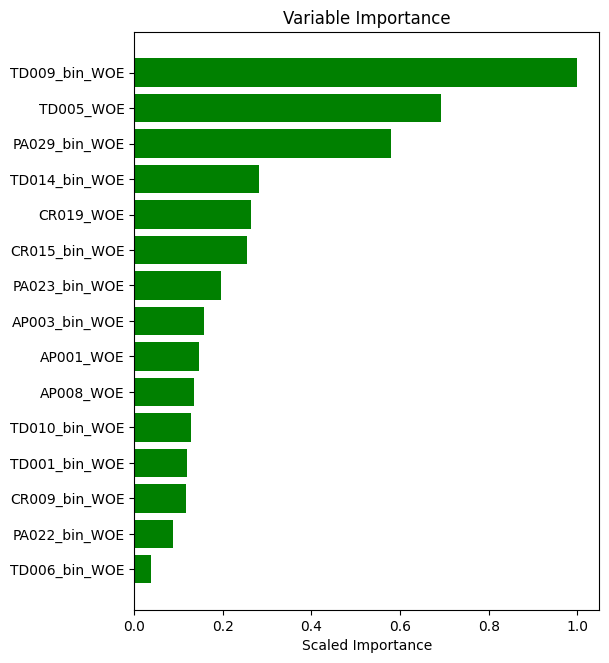

In [ ]:
def VarImp(model_name):

    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()

VarImp(rf_v1)

In [ ]:
predictions = rf_v1.predict(test_hex)
predictions.head()
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,predict
0,0,0.278723
1,0,0.257221
2,0,0.209367
3,0,0.153741
4,0,0.215133


In [ ]:
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(rf_v1)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,160,47,113,160,47,113,0.16,0.09,30.0,1.57,7.0,29.38
1,160,42,118,320,89,231,0.30,0.18,60.0,1.48,12.0,27.81
2,160,41,119,480,130,350,0.43,0.27,90.0,1.44,16.0,27.08
3,160,35,125,640,165,475,0.55,0.37,120.0,1.38,18.0,25.78
4,160,31,129,800,196,604,0.65,0.46,150.0,1.31,19.0,24.50
5,160,24,136,960,220,740,0.73,0.57,180.0,1.22,16.0,22.92
6,160,23,137,1120,243,877,0.81,0.67,210.0,1.16,14.0,21.70
7,160,16,144,1280,259,1021,0.86,0.79,240.0,1.08,7.0,20.23
8,160,23,137,1440,282,1158,0.94,0.89,270.0,1.04,5.0,19.58


In [ ]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)

    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')

    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')


    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



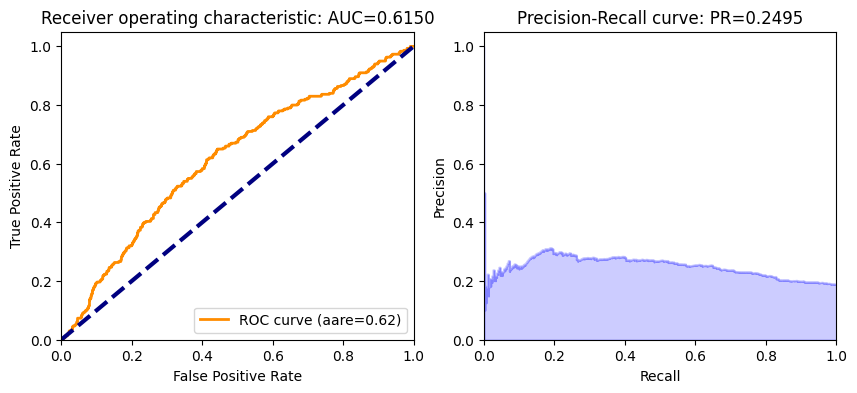

In [ ]:
ROC_AUC(rf_v1,test_hex,'loan_default')

### Now the code works fine with the small dataset, we can model with the entire dataset.

Turn out it doesn't perform better with entire training dataset. One possible reason is smaller datasets are less likely to lead to overfitting as they force the model to generalize better.

In [ ]:
train_hex = h2o.H2OFrame(train_df_rf)
test_hex = h2o.H2OFrame(test_df_rf)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
rf_v2 = H2ORandomForestEstimator(
        model_id = 'rf_v2',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v2.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_v2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         1.07384e+06            13           20           17.0267       263           297           280.537

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.1498718771489339
RMSE: 0.38713289339570967
MAE: 0.30003284286595944
RMSLE: 0.2715420816428299
Mean Residual Deviance: 0.1498718771489339

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.1499180749524892
RMSE: 0.3871925553939399
MAE: 0.30018390703180164
RMSLE: 0.271583976669591
Mean Residual Deviance: 0.1499180749524892

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.300196   0.00352264  0.304395      0.304693      0.302665      0.297634      0.295531      0.294828      0.301542      0.29789       0.301939      0.300843
mean_residual_deviance  0.149931   0.00358142  0.154152      0.154923      0.151517      0.147762      0.146034      0.14385       0.151774      0.14742       0.151828      0.150052
mse                     0.149931   0.00358142  0.154152      0.154923      0.151517      0.147762      0.146034      0.14385       0.151774      0.14742       0.151828      0.150052
r2                      0.0363812  0.002943    0.0362065     0.0338884     0.0395042     0.0345291     0.031303      0.0379271     0.0411318     0.037692      0.0341692     0.0374612
residual_deviance       0.149931   0.00358142  0.154152      0.154923      0.151517      0.147762      0.146034      0.14385       0.151774      0.14742       0.151828      0.150052
rmse                    0.387185   0.00463155  0.392623      0.393603      0.389251      0.384398      0.382144      0.379276      0.389582      0.383953      0.389651      0.387366
rmsle                   0.271583   0.00249114  0.274502      0.275126      0.272713      0.270023      0.268969      0.267359      0.272602      0.26979       0.273041      0.271709

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 23:30:18  5 min 39.854 sec  0.0                nan                  nan                  nan
     2023-07-26 23:30:18  5 min 39.953 sec  1.0                0.38998158300284846  0.2991295175125647   0.15208563508140757
     2023-07-26 23:30:18  5 min 40.058 sec  2.0                0.39135979734936444  0.30065384678769336  0.1531624909813356
     2023-07-26 23:30:18  5 min 40.148 sec  3.0                0.38965996688734084  0.3000130705781346   0.15183488979464355
     2023-07-26 23:30:18  5 min 40.247 sec  4.0                0.38902230076257044  0.2999989426288789   0.15133835049060382
     2023-07-26 23:30:18  5 min 40.352 sec  5.0                0.38917029732995406  0.3000873154563365   0.15145352032388487
     2023-07-26 23:30:18  5 min 40.453 sec  6.0                0.3886907891703167   0.30021413788695833  0.1510805295858436
     2023-07-26 23:30:18  5 min 40.550 sec  7.0                0.3884295916460142   0.3002263714759305   0.15087754766628933
     2023-07-26 23:30:18  5 min 40.649 sec  8.0                0.3882853837

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



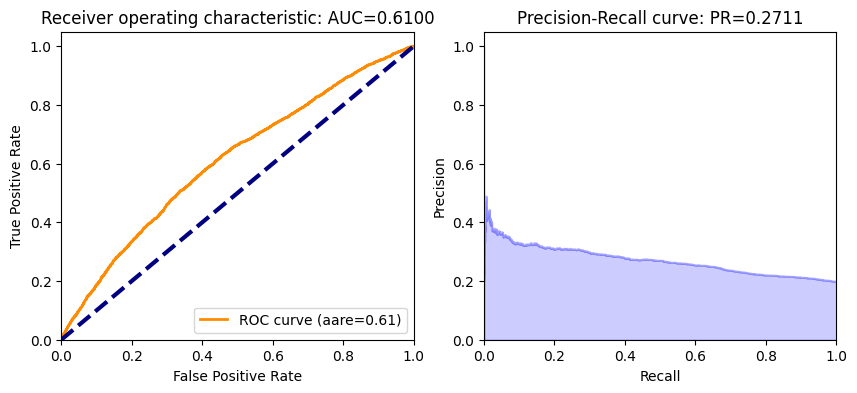

In [ ]:
ROC_AUC(rf_v2,test_hex,'loan_default')

In [ ]:
createGains(rf_v2)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1600,509,1091,1600,509,1091,0.16,0.08,315.0,1.62,8.0,31.81
1,1600,440,1160,3200,949,2251,0.30,0.18,630.0,1.51,12.0,29.66
2,1600,362,1238,4800,1311,3489,0.42,0.27,945.0,1.39,15.0,27.31
3,1600,368,1232,6400,1679,4721,0.53,0.37,1260.0,1.33,16.0,26.23
4,1600,326,1274,8000,2005,5995,0.64,0.47,1575.0,1.27,17.0,25.06
5,1600,237,1363,9600,2242,7358,0.71,0.57,1890.0,1.19,14.0,23.35
6,1600,239,1361,11200,2481,8719,0.79,0.68,2205.0,1.13,11.0,22.15
7,1600,263,1337,12800,2744,10056,0.87,0.78,2520.0,1.09,9.0,21.44
8,1600,233,1367,14400,2977,11423,0.95,0.89,2835.0,1.05,6.0,20.67


### Use H2O's "balance_classes"
* The balance_classes option can be used to balance the class distribution. When enabled, H2O will either undersample the majority classes or oversample the minority classes.
* Note that the resulting model will also correct the final probabilities (“undo the sampling”) using a monotonic transform, so the predicted probabilities of the first model will differ from a second model. However, because AUC only cares about ordering, it won’t be affected.
* See [this H2O page](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/balance_classes.html).

In [ ]:
train_smpl = train_df_rf.sample(frac=0.1, random_state=1)
test_smpl = test_df_rf.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
rf_v3 = H2ORandomForestEstimator(
        model_id = 'rf_v3',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        balance_classes = True,
        seed=1234)
rf_v3.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_v3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         125323                 7            12           8.96333       24            32            28.4233

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.14951065232172528
RMSE: 0.3866660734040747
MAE: 0.2992474803933356
RMSLE: 0.2712098866294993
Mean Residual Deviance: 0.14951065232172528

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.14963480040402838
RMSE: 0.3868265766516416
MAE: 0.299352536320045
RMSLE: 0.27131915462305656
Mean Residual Deviance: 0.14963480040402838

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.299391   0.00829243  0.313231      0.294441      0.30191       0.292545      0.300058      0.305275      0.290171      0.309067      0.287733      0.299476
mean_residual_deviance  0.149633   0.00944276  0.165238      0.143339      0.154531      0.143727      0.150492      0.157783      0.137765      0.15916       0.137166      0.147128
mse                     0.149633   0.00944276  0.165238      0.143339      0.154531      0.143727      0.150492      0.157783      0.137765      0.15916       0.137166      0.147128
r2                      0.0231276  0.0151769   0.00321823    0.0241438     0.0142291     0.0122233     0.0187475     0.0222429     0.0333        0.0565313     0.0124066     0.0342336
residual_deviance       0.149633   0.00944276  0.165238      0.143339      0.154531      0.143727      0.150492      0.157783      0.137765      0.15916       0.137166      0.147128
rmse                    0.386651   0.012185    0.406495      0.378602      0.393105      0.379114      0.387933      0.397219      0.371167      0.398949      0.370359      0.383573
rmsle                   0.271244   0.00651096  0.283014      0.26703       0.274887      0.267406      0.27225       0.276734      0.262788      0.275948      0.26292       0.269466

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 23:31:26  33.817 sec  0.0                nan                  nan                  nan
     2023-07-26 23:31:26  33.827 sec  1.0                0.38754059122110446  0.2971529876363688   0.1501877098440032
     2023-07-26 23:31:26  33.836 sec  2.0                0.38908887516526136  0.3008565835832038   0.15139015277736834
     2023-07-26 23:31:26  33.844 sec  3.0                0.3882860713050474   0.2995614829568523   0.15076607316950832
     2023-07-26 23:31:26  33.853 sec  4.0                0.3869130843628915   0.2988633098096824   0.14970173485120603
     2023-07-26 23:31:26  33.863 sec  5.0                0.3873920257230865   0.3000798247107018   0.15007258159383652
     2023-07-26 23:31:26  33.872 sec  6.0                0.3873827542921961   0.299919396332556    0.15006539832300797
     2023-07-26 23:31:26  33.880 sec  7.0                0.38798865288300727  0.30041473490505316  0.15053519476597071
     2023-07-26 23:31:26  33.889 sec  8.0                0.3881241085994359   0.30002044227454755  0.15064032367610672
     2023-07-

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



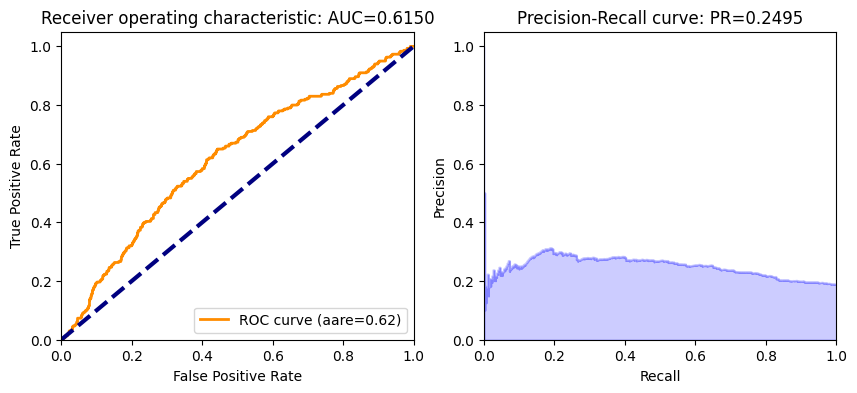

In [ ]:
ROC_AUC(rf_v3,test_hex,'loan_default')

In [ ]:
createGains(rf_v3)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,160,47,113,160,47,113,0.16,0.09,30.0,1.57,7.0,29.38
1,160,42,118,320,89,231,0.30,0.18,60.0,1.48,12.0,27.81
2,160,41,119,480,130,350,0.43,0.27,90.0,1.44,16.0,27.08
3,160,35,125,640,165,475,0.55,0.37,120.0,1.38,18.0,25.78
4,160,31,129,800,196,604,0.65,0.46,150.0,1.31,19.0,24.50
5,160,24,136,960,220,740,0.73,0.57,180.0,1.22,16.0,22.92
6,160,23,137,1120,243,877,0.81,0.67,210.0,1.16,14.0,21.70
7,160,16,144,1280,259,1021,0.86,0.79,240.0,1.08,7.0,20.23
8,160,23,137,1440,282,1158,0.94,0.89,270.0,1.04,5.0,19.58


### Undersampling
- Undersampling is a technique used to tackle class imbalance in a dataset. It involves reducing the representation of the majority class by randomly removing instances from the majority class until the desired balance between classes is achieved. By reducing the number of instances of the majority class, undersampling helps prevent the model from being overwhelmed by the dominant class and focuses on learning from the minority class instances.
- However, undersampling might lead to a loss of potentially useful information from the majority class, which could impact the model's overall performance.
* [Using Under-Sampling Techniques for Extremely Imbalanced Data](https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8)
* [imblearn](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.datasets.make_imbalance.html)

In [ ]:
#Concatenate along rows (vertically)
#data_undersample = pd.concat([train_df_rf, test_df_rf])
#data_undersample = data_undersample.sort_values(by='id', ascending=True)
#data_undersample

In [ ]:
y = train_df_rf[target]
X = train_df_rf.drop(target,axis=1)
y.dtypes

dtype('int64')

In [ ]:
y1_cnt = train_df_rf[target].sum()
y1_cnt

12338

In [ ]:
N = 2
y0_cnt = y1_cnt * N
y0_cnt

24676

In [ ]:
pip install imblearn

In [ ]:
from imblearn.datasets import make_imbalance
X_rs, y_rs = make_imbalance(X, y,
                            sampling_strategy={1:y1_cnt , 0:  y0_cnt},
                            random_state=0)
X_rs = pd.DataFrame(X_rs)
y_rs = pd.DataFrame(y_rs)

In [ ]:
y_rs = train_df_rf[train_df_rf[target]==1]
X_rs = train_df_rf[train_df_rf[target]==0].sample(n=y0_cnt)
smpl = pd.concat([X_rs,y_rs])
smpl_hex = h2o.H2OFrame(smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
rf_v4 = H2ORandomForestEstimator(
        model_id = 'rf_v4',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v4.train(predictors,target,training_frame=smpl_hex)
#train with the upsampled smpl_hex as the training frame

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_v4


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         631596                 12           18           14.2          149           174           163.03

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.21077186366658382
RMSE: 0.4590989693590956
MAE: 0.4228487633192769
RMSLE: 0.3227436376803513
Mean Residual Deviance: 0.21077186366658382

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.21079706546892607
RMSE: 0.4591264155643041
MAE: 0.4230214030525104
RMSLE: 0.32274926426018896
Mean Residual Deviance: 0.21079706546892607

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.423026   0.00165518   0.424258      0.422699      0.423241      0.420576      0.421756      0.421731      0.424893      0.423662      0.425825      0.421621
mean_residual_deviance  0.2108     0.0015687    0.211635      0.210802      0.211189      0.20865       0.208799      0.209898      0.212001      0.212158      0.213406      0.209464
mse                     0.2108     0.0015687    0.211635      0.210802      0.211189      0.20865       0.208799      0.209898      0.212001      0.212158      0.213406      0.209464
r2                      0.0512652  0.00548066   0.0512642     0.0533489     0.0554153     0.0419659     0.0552363     0.0527978     0.0554222     0.05125       0.0407212     0.0552302
residual_deviance       0.2108     0.0015687    0.211635      0.210802      0.211189      0.20865       0.208799      0.209898      0.212001      0.212158      0.213406      0.209464
rmse                    0.459127   0.00170823   0.460038      0.459131      0.459553      0.456782      0.456946      0.458146      0.460435      0.460606      0.461958      0.457673
rmsle                   0.322751   0.000863403  0.323228      0.32237       0.322569      0.322807      0.322044      0.321963      0.322839      0.323038      0.324814      0.321839

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 23:34:15  2 min 38.652 sec  0.0                nan                  nan                  nan
     2023-07-26 23:34:15  2 min 38.703 sec  1.0                0.4645581327571748   0.42387027479240125  0.21581425871083282
     2023-07-26 23:34:15  2 min 38.747 sec  2.0                0.46229486279213067  0.422342442518995    0.21371654016399494
     2023-07-26 23:34:15  2 min 38.797 sec  3.0                0.4623465337250435   0.42302790688507147  0.21376431724756279
     2023-07-26 23:34:15  2 min 38.844 sec  4.0                0.4627497836277979   0.4236461809102115   0.2141373622475738
     2023-07-26 23:34:15  2 min 38.891 sec  5.0                0.46226050822648085  0.42300232316159125  0.2136847774658044
     2023-07-26 23:34:15  2 min 38.938 sec  6.0                0.4615715339863645   0.42280648376827645  0.21304828098652567
     2023-07-26 23:34:15  2 min 38.981 sec  7.0                0.46116708905119974  0.42282170457829965  0.2126750840239572
     2023-07-26 23:34:15  2 min 39.023 sec  8.0                0.

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



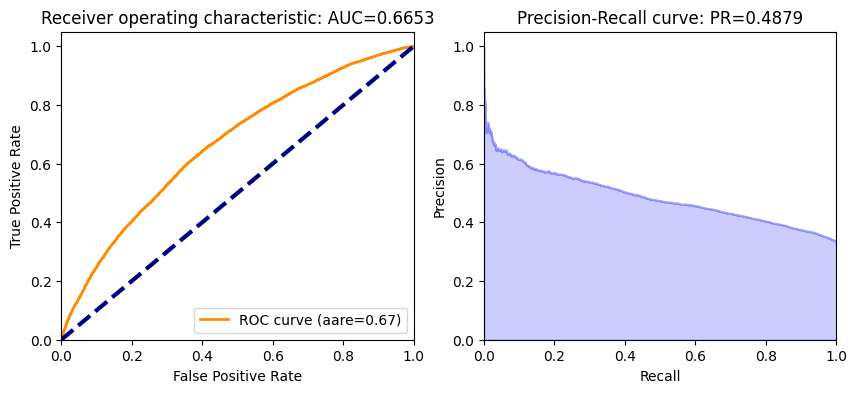

In [ ]:
ROC_AUC(rf_v4,smpl_hex,'loan_default')


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



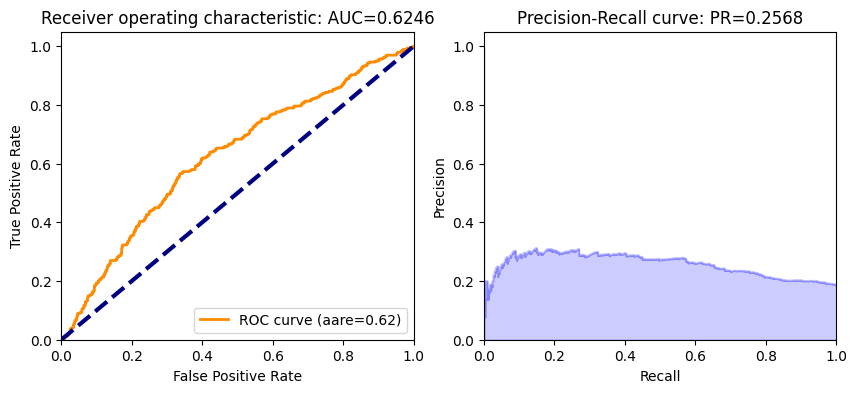

In [ ]:
ROC_AUC(rf_v4,test_hex,'loan_default')

In [ ]:
createGains(rf_v4)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,160,47,113,160,47,113,0.16,0.09,30.0,1.57,7.0,29.38
1,160,48,112,320,95,225,0.32,0.17,60.0,1.58,15.0,29.69
2,160,40,120,480,135,345,0.45,0.27,90.0,1.50,18.0,28.12
3,160,37,123,640,172,468,0.57,0.36,120.0,1.43,21.0,26.88
4,160,25,135,800,197,603,0.66,0.46,150.0,1.31,20.0,24.62
5,160,26,134,960,223,737,0.74,0.57,180.0,1.24,17.0,23.23
6,160,16,144,1120,239,881,0.80,0.68,210.0,1.14,12.0,21.34
7,160,19,141,1280,258,1022,0.86,0.79,240.0,1.08,7.0,20.16
8,160,26,134,1440,284,1156,0.95,0.89,270.0,1.05,6.0,19.72


### Oversampling
- Oversampling is a technique used in machine learning to address class imbalance in a dataset.
- It aims to improve model performance by providing more training data for the underrepresented class, thus reducing bias and enabling the model to better capture the characteristics of the minority class.

In [ ]:
from imblearn.over_sampling import RandomOverSampler


In [ ]:
# Assuming you have a DataFrame train_df_rf with your training data
target = 'loan_default'
X = train_df_rf.drop(target, axis=1)
y = train_df_rf[target]
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=0)
# Perform the Random Over-Sampling on the data
X_ros, y_ros = ros.fit_resample(X, y)

X_ros = pd.DataFrame(X_ros)
y_ros = pd.DataFrame(y_ros)

y_ros = train_df_rf[train_df_rf[target]==1]
X_ros = train_df_rf[train_df_rf[target]==0].sample(n=y0_cnt)
smpl2 = pd.concat([X_ros,y_ros])
smpl_hex2 = h2o.H2OFrame(smpl2)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
rf_v5 = H2ORandomForestEstimator(
        model_id = 'rf_v5',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v5.train(predictors,target,training_frame=smpl_hex2)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_v5


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    300                300                         631419                 12           18           14.6467       153           173           163.04

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.2108294692109558
RMSE: 0.45916170268322226
MAE: 0.4230355253292622
RMSLE: 0.32276222801680743
Mean Residual Deviance: 0.2108294692109558

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.21091192465924377
RMSE: 0.4592514830234561
MAE: 0.4232599539533539
RMSLE: 0.3228381427219545
Mean Residual Deviance: 0.21091192465924377

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.423268   0.00168384  0.425346      0.424194      0.422451      0.419874      0.422428      0.425086      0.421761      0.42319       0.424511      0.423839
mean_residual_deviance  0.210918   0.00155381  0.212448      0.212096      0.210203      0.208245      0.209017      0.212326      0.20998       0.211551      0.212748      0.210571
mse                     0.210918   0.00155381  0.212448      0.212096      0.210203      0.208245      0.209017      0.212326      0.20998       0.211551      0.212748      0.210571
r2                      0.0507201  0.00737718  0.04762       0.0475348     0.0598237     0.0438222     0.0542511     0.0418383     0.0644265     0.0539665     0.0436772     0.0502408
residual_deviance       0.210918   0.00155381  0.212448      0.212096      0.210203      0.208245      0.209017      0.212326      0.20998       0.211551      0.212748      0.210571
rmse                    0.459256   0.00169286  0.46092       0.460539      0.458479      0.456339      0.457184      0.460789      0.458235      0.459946      0.461246      0.45888
rmsle                   0.322842   0.00115477  0.324051      0.323476      0.321656      0.32234       0.322278      0.324291      0.320724      0.32253       0.324042      0.323033

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 23:37:30  2 min 50.855 sec  0.0                nan                  nan                  nan
     2023-07-26 23:37:30  2 min 50.982 sec  1.0                0.46345451108903507  0.42301180598223465  0.21479008384877654
     2023-07-26 23:37:30  2 min 51.102 sec  2.0                0.4629595736995028   0.42262182053693387  0.2143315668800254
     2023-07-26 23:37:30  2 min 51.180 sec  3.0                0.46226598049391904  0.4228333388695397   0.2136898367220043
     2023-07-26 23:37:31  2 min 51.239 sec  4.0                0.46297384534581565  0.4237793393265341   0.21434478147429123
     2023-07-26 23:37:31  2 min 51.311 sec  5.0                0.46261223065452356  0.4233074116653379   0.21401007595115412
     2023-07-26 23:37:31  2 min 51.379 sec  6.0                0.4620550994611856   0.42329340850548886  0.21349491493808612
     2023-07-26 23:37:31  2 min 51.446 sec  7.0                0.4615998862095135   0.42330060243782747  0.21307445494863578
     2023-07-26 23:37:31  2 min 51.498 sec  8.0                0.4613334757

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



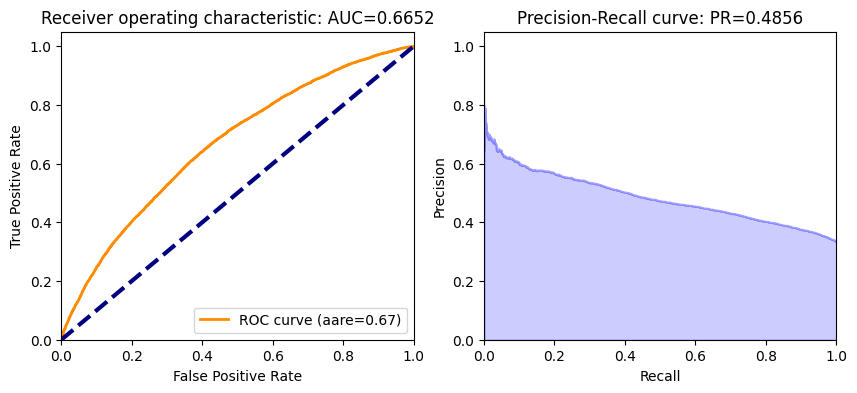

In [ ]:
ROC_AUC(rf_v5,smpl_hex2,'loan_default')



drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



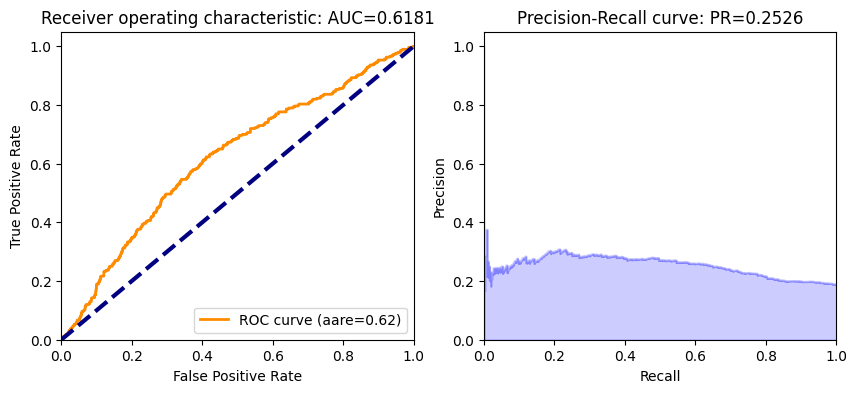

In [ ]:
ROC_AUC(rf_v5,test_hex,'loan_default')

### Insights:
- Both the ROC-AUC metric and PR (average precision) indicates that the model performs the best **after undersampling** (rf_v4), followed by the model **with oversampling** (rf_v5), and lastly, the model that has **addressed class imbalance in the dataset** (rf_v3). Notably, they all perform better than **decision tree model** using the same set of feature.
- It seems that under-sampling/over-sampling techniques do improve the predictability.
- However, the AUCs of all the models are very close, suggesting similar discrimination abilities among the models.
- Possible reasons:
(1) If the feature set doesn't contain strong discriminatory information for the minority class, balancing the data alone might not lead to substantial improvements.
(2) If the original dataset is well-balanced, representative, and contains sufficient information for the classifier to learn, then both oversampling and undersampling might not have a substantial impact on the model's performance.

### Next Steps:
- Explore ways to improve the model's performance. This can involve feature selection, testing different sets of feature, and conducting hyperparameter tuning using techniques like grid search, random search, or Bayesian optimization to find the best combination of hyperparameters that yield the highest model performance.

## Section 4 Decision Tree <a class="anchor" id="4"></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression

# First, specify the model
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)

In [ ]:
# Then, train the model.
dtree.fit(train_df_WOE_withoutid,train_df.target)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [ ]:
features = ['AP001_WOE', 'AP003_bin_WOE', 'AP008_WOE', 'CR009_bin_WOE', 'CR015_bin_WOE', 'CR019_WOE', 'PA022_bin_WOE', 'PA023_bin_WOE', 'PA029_bin_WOE', 'TD001_bin_WOE', 'TD005_WOE', 'TD006_bin_WOE', 'TD009_bin_WOE', 'TD010_bin_WOE', 'TD014_bin_WOE']

In [ ]:
predictions = dtree.predict(test_df_WOE_withoutid[features])
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
dtree.predict_proba(test_df_WOE_withoutid[features])

array([[0.85357873, 0.14642127],
       [0.7785124 , 0.2214876 ],
       [0.95964126, 0.04035874],
       ...,
       [0.85357873, 0.14642127],
       [0.86291827, 0.13708173],
       [0.74327628, 0.25672372]])

In [ ]:
y_pred = dtree.predict_proba(test_df_WOE_withoutid[features])[:,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

roc_auc_value = roc_auc_score(test_df.target,y_pred)
roc_auc_value

0.598508109443518

In [ ]:
fpr, tpr, _ = roc_curve(test_df.target,y_pred)
[fpr,tpr]

[array([0.00000000e+00, 5.44747082e-04, 1.08949416e-03, 1.16731518e-03,
        9.49416342e-03, 1.06614786e-02, 1.15953307e-02, 1.27626459e-02,
        2.87937743e-02, 3.19066148e-02, 4.38910506e-02, 4.69260700e-02,
        4.87937743e-02, 6.07003891e-02, 9.06614786e-02, 9.53307393e-02,
        1.57821012e-01, 1.94941634e-01, 2.06536965e-01, 2.27003891e-01,
        2.34007782e-01, 2.39922179e-01, 2.60778210e-01, 3.08404669e-01,
        3.28871595e-01, 3.41400778e-01, 3.46381323e-01, 3.83424125e-01,
        3.83424125e-01, 4.29260700e-01, 4.49105058e-01, 4.51517510e-01,
        4.55642023e-01, 4.64980545e-01, 4.66147860e-01, 4.81478599e-01,
        5.48560311e-01, 5.50350195e-01, 5.53307393e-01, 5.59299611e-01,
        5.98287938e-01, 6.05214008e-01, 6.63891051e-01, 6.78832685e-01,
        6.83968872e-01, 7.88949416e-01, 7.96342412e-01, 8.03657588e-01,
        8.29571984e-01, 8.39844358e-01, 8.50583658e-01, 8.57976654e-01,
        9.50894942e-01, 9.52217899e-01, 9.58521401e-01, 9.815564

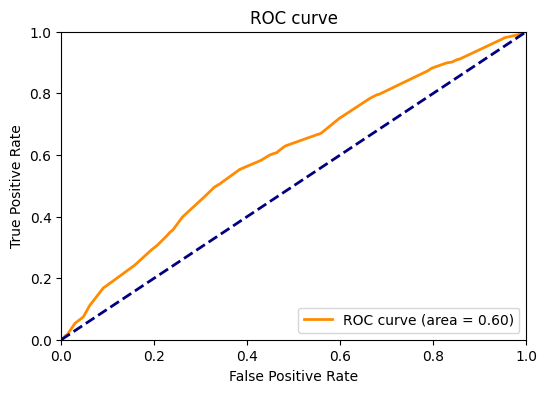

In [ ]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

### Interpretation of ROC and AUC
- ROC shows the diagnostic ability of binary classifiers, the closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
- In general, an AUC of 0.5 suggests no discrimination, an Area Under the Curve (AUC) of 0.6 indicates a moderate level of predictive power. The model's ability to distinguish between positive and negative instances is slightly better than random chance, but there is room for improvement.

### Next Steps:
- Explore ways to improve the model's performance. This can involve feature engineering, considering additional relevant variables, adjusting model parameters, or using more advanced modeling techniques. Iteratively refining the model and evaluating its impact on the ROC curve and AUC can help improve its performance.

## Section 5 GBM <a class="anchor" id="5"></a>
### What's Gradient Boosting Machine (GBM)?
**Gradient Boosting Machine** is a forward learning ensemble method. It is a powerful and popular machine learning algorithm used for both regression and classification tasks. It works by combining multiple weak learners, typically decision trees, in an iterative manner. Each subsequent tree corrects the errors made by the previous ones, gradually improving the model's predictive accuracy. GBM optimizes a loss function using gradient descent to find the best possible ensemble of trees.

H2O's GBM is an implementation of the GBM algorithm designed for high-performance and scalability. It offers various tuning parameters and options for model customization, making it a preferred choice for many data scientists and engineers dealing with big data scenarios.

In [ ]:
train_df_gbm = train_df_rf
test_df_gbm = test_df_rf

In [ ]:
#Use all the features first for testing
target = 'loan_default'
predictors = train_df_gbm.columns.tolist()
predictors=predictors[2:17]
predictors

['AP001_WOE',
 'AP003_bin_WOE',
 'AP008_WOE',
 'CR009_bin_WOE',
 'CR015_bin_WOE',
 'CR019_WOE',
 'PA022_bin_WOE',
 'PA023_bin_WOE',
 'PA029_bin_WOE',
 'TD001_bin_WOE',
 'TD005_WOE',
 'TD006_bin_WOE',
 'TD009_bin_WOE',
 'TD010_bin_WOE',
 'TD014_bin_WOE']

In [ ]:
#Use 50% training data
train_smpl = train_df_gbm.sample(frac=0.5, random_state=1)
test_smpl = test_df_gbm.sample(frac=0.5, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
gbm_v1 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v1',
        seed=1234)
gbm_v1.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22251                  5            5            5             24            32            30.72

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.144712223309159
RMSE: 0.3804105983134001
MAE: 0.29368577951529734
RMSLE: 0.2663937423135674
Mean Residual Deviance: 0.144712223309159

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 01:00:03  0.350 sec   0.0                0.3950172056675509   0.3120771855468894   0.1560385927734002
     2023-07-26 01:00:04  1.243 sec   1.0                0.3934904203616159   0.31080994147621094  0.1548347109163612
     2023-07-26 01:00:05  1.560 sec   2.0                0.3922290106548253   0.3096627510720864   0.15384359679926307
     2023-07-26 01:00:05  1.754 sec   3.0                0.3911679262180301   0.3086323019368574   0.15301234650171425
     2023-07-26 01:00:05  1.940 sec   4.0                0.3902702453500051   0.30767901630094274  0.1523108644055532
     2023-07-26 01:00:05  2.092 sec   5.0                0.3894680493872943   0.3067850429448299   0.15168536149354392
     2023-07-26 01:00:05  2.256 sec   6.0                0.3888119497040962   0.30597943165618924  0.15117473223270064
     2023-07-26 01:00:05  2.405 sec   7.0                0.388209636843007    0.3052193441311829   0.15070672213777941
     2023-07-26 01:00:06  2.573 sec   8.0                0.3876804650240999   0.3045069801406935   0.15029614296130236
     2023-07-26 01:00:06  2.711 sec   9.0                0.38723985255960397  0.30388313557137736  0.1499547034103838
---  ---                  ---         ---                ---                  ---                  ---
     2023-07-26 01:00:07  3.526 sec   15.0               0.38530868911208976  0.3008515754174441   0.14846278590527703
     2023-07-26 01:00:07  3.653 sec   16.0               0.38508703579746156  0.30047361316042953  0.14829202513927545
     2023-07-26 01:00:07  3.760 sec   17.0               0.3848540691595053   0.30008165032509715  0.1481126545486293
     2023-07-26 01:00:07  3.864 sec   18.0               0.3846231976814459   0.29969966658903285  0.14793500419470063
     2023-07-26 01:00:07  3.994 sec   19.0               0.3844343528570152   0.29938035680539904  0.1477897716565921
     2023-07-26 01:00:07  4.101 sec   20.0               0.38425240415644507  0.29907276141957845  0.14764991010000802
     2023-07-26 01:00:07  4.209 sec   21.0               0.38407727623028326  0.29880612493271475  0.1475153541164733
     2023-07-26 01:00:07  4.287 sec   22.0               0.3839034184604832   0.29850293644017073  0.1473818347056449
     2023-07-26 01:00:07  4.375 sec   23.0               0.38372943443527596  0.29822588425537105  0.14724827885201677
     2023-07-26 01:00:10  7.187 sec   50.0               0.3804105983134001   0.29368577951529734  0.144712223309159
[25 rows x 7 columns]


Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
TD009_bin_WOE  375.086                1                    0.196371
TD005_WOE      277.002                0.738503             0.145021
AP003_bin_WOE  199.602                0.532149             0.104499
CR015_bin_WOE  165.064                0.440071             0.0864173
AP001_WOE      145.417        

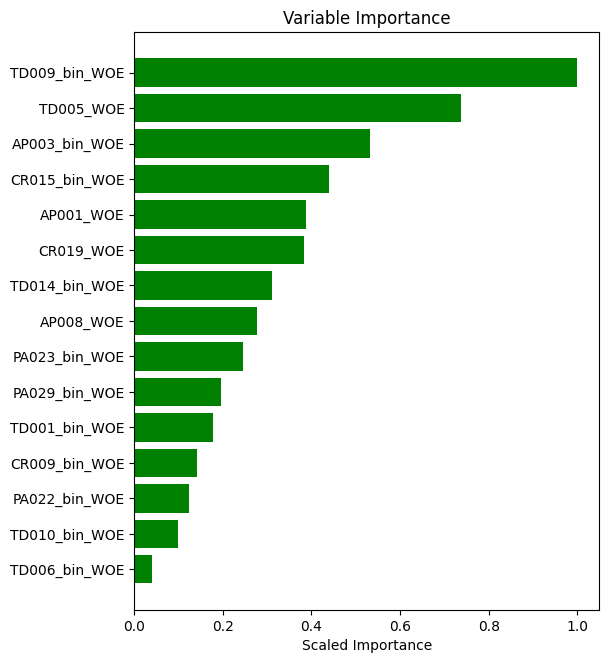

In [ ]:
VarImp(gbm_v1)

In [ ]:
createGains(gbm_v1)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1600,468,1132,1600,468,1132,0.15,0.09,315.0,1.49,6.0,29.25
1,1600,427,1173,3200,895,2305,0.28,0.18,630.0,1.42,10.0,27.97
2,1600,383,1217,4800,1278,3522,0.41,0.27,945.0,1.35,14.0,26.62
3,1600,361,1239,6400,1639,4761,0.52,0.37,1260.0,1.30,15.0,25.61
4,1600,315,1285,8000,1954,6046,0.62,0.47,1575.0,1.24,15.0,24.42
5,1600,259,1341,9600,2213,7387,0.70,0.57,1890.0,1.17,13.0,23.05
6,1600,241,1359,11200,2454,8746,0.78,0.68,2205.0,1.11,10.0,21.91
7,1600,257,1343,12800,2711,10089,0.86,0.79,2520.0,1.08,7.0,21.18
8,1600,251,1349,14400,2962,11438,0.94,0.89,2835.0,1.04,5.0,20.57


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



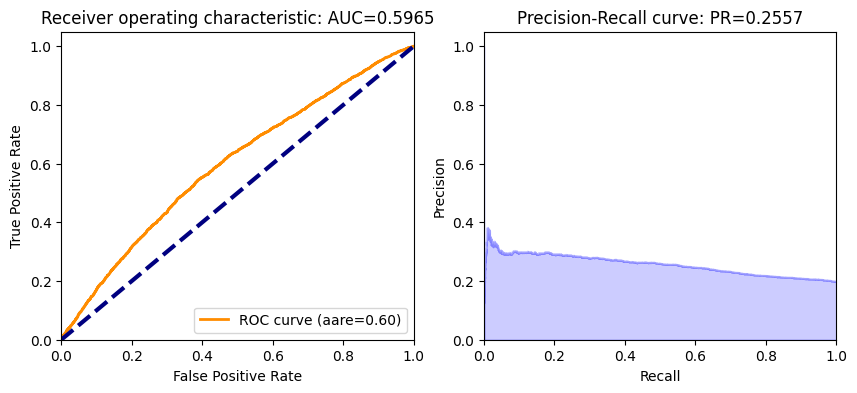

In [ ]:
ROC_AUC(gbm_v1,test_hex,'loan_default')

### Try Dropping 2 Less Important Features
#### Truns out using all transformed features achieves best performance


In [ ]:
#Use all the features first for testing
target = 'loan_default'
predictors = train_df_gbm.columns.tolist()
predictors=predictors[2:17]
values_to_remove = ['TD006_bin_WOE', 'TD010_bin_WOE']
predictors = [item for item in predictors if item not in values_to_remove]
predictors

['AP001_WOE',
 'AP003_bin_WOE',
 'AP008_WOE',
 'CR009_bin_WOE',
 'CR015_bin_WOE',
 'CR019_WOE',
 'PA022_bin_WOE',
 'PA023_bin_WOE',
 'PA029_bin_WOE',
 'TD001_bin_WOE',
 'TD005_WOE',
 'TD009_bin_WOE',
 'TD014_bin_WOE']

In [ ]:
gbm_v2 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v1',
        seed=1234)
gbm_v2.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: gbm_v1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22361                  5            5            5             26            32            30.9

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.14693649700108505
RMSE: 0.3833229669626972
MAE: 0.29628467947138415
RMSLE: 0.2686390871878489
Mean Residual Deviance: 0.14693649700108505

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------
     2023-07-26 01:29:24  0.019 sec   0.0                0.3944827494940858   0.3112332792967949   0.15561663964841363
     2023-07-26 01:29:25  0.160 sec   1.0                0.39317358096384225  0.31014783251169137  0.154585464767931
     2023-07-26 01:29:25  0.268 sec   2.0                0.39209999383579935  0.309175335295964    0.1537424051660339
     2023-07-26 01:29:25  0.388 sec   3.0                0.3912023093238103   0.30828340451512487  0.15303924682028214
     2023-07-26 01:29:25  0.528 sec   4.0                0.3904422755858172   0.30747406771872193  0.1524451705646312
     2023-07-26 01:29:25  0.711 sec   5.0                0.3897860925511466   0.30672259090002624  0.15193319794629104
     2023-07-26 01:29:25  0.832 sec   6.0                0.38924567954115635  0.30605226596374996  0.1515121990414566
     2023-07-26 01:29:25  0.945 sec   7.0                0.38874213386822215  0.3054030089966254   0.15112044664441876
     2023-07-26 01:29:26  1.068 sec   8.0                0.38832233377956554  0.3048270669650519   0.1507942349120083
     2023-07-26 01:29:26  1.183 sec   9.0                0.38794518080491514  0.30427962642663625  0.15050146330975828
---  ---                  ---         ---                ---                  ---                  ---
     2023-07-26 01:29:27  2.914 sec   24.0               0.3851500652265399   0.2994155085532693   0.14834057274400791
     2023-07-26 01:29:27  3.029 sec   25.0               0.3850391249672323   0.2992089590571122   0.14825512775553193
     2023-07-26 01:29:28  3.159 sec   26.0               0.38493568720822935  0.2990127001400106   0.1481754832864718
     2023-07-26 01:29:28  3.282 sec   27.0               0.38484649814526023  0.29884352152550125  0.1481068271346698
     2023-07-26 01:29:28  3.471 sec   28.0               0.384765612626809    0.29867806979472517  0.14804457666008364
     2023-07-26 01:29:28  3.610 sec   29.0               0.3846776104588391   0.29852607854671076  0.14797686398832235
     2023-07-26 01:29:28  3.720 sec   30.0               0.3846082032640784   0.298379098920268    0.14792347001802267
     2023-07-26 01:29:28  3.837 sec   31.0               0.3845230690527158   0.2982191958919866   0.14785799063371965
     2023-07-26 01:29:28  3.952 sec   32.0               0.38444258633919637  0.2980949865495786   0.14779610219117045
     2023-07-26 01:29:32  7.151 sec   50.0               0.3833229669626972   0.29628467947138415  0.14693649700108505
[34 rows x 7 columns]


Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
TD009_bin_WOE  746.856                1                    0.255278
TD005_WOE      400.723                0.536547             0.136968
AP003_bin_WOE  339.134                0.454082             0.115917
CR015_bin_WOE  263.848                0.353278             0.0901841
TD014_bin_WOE  193.559   

In [ ]:
createGains(gbm_v2)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1600,482,1118,1600,482,1118,0.15,0.09,315.0,1.53,6.0,30.12
1,1600,418,1182,3200,900,2300,0.29,0.18,630.0,1.43,11.0,28.12
2,1600,364,1236,4800,1264,3536,0.40,0.28,945.0,1.34,12.0,26.33
3,1600,360,1240,6400,1624,4776,0.52,0.37,1260.0,1.29,15.0,25.37
4,1600,305,1295,8000,1929,6071,0.61,0.47,1575.0,1.22,14.0,24.11
5,1600,265,1335,9600,2194,7406,0.70,0.58,1890.0,1.16,12.0,22.85
6,1600,256,1344,11200,2450,8750,0.78,0.68,2205.0,1.11,10.0,21.88
7,1600,269,1331,12800,2719,10081,0.86,0.78,2520.0,1.08,8.0,21.24
8,1600,243,1357,14400,2962,11438,0.94,0.89,2835.0,1.04,5.0,20.57


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



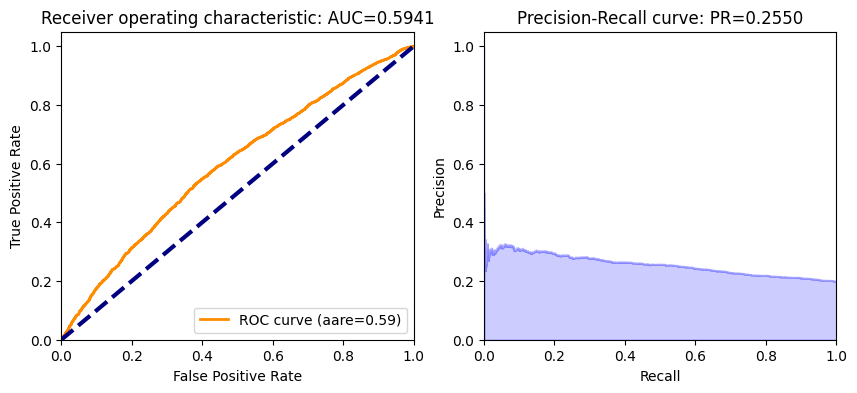

In [ ]:
ROC_AUC(gbm_v2,test_hex,'loan_default')

## Section 6 Deep Learning <a class="anchor" id="6"></a>
### What's Deep Learning and how does the H2O's Deep Learning work?

**Deep Learning** involves the use of artificial neural networks composed of multiple layers of neurons. Each layer processes the input from the previous layer and gradually learns to extract higher-level representations of the data. Deep learning is particularly well-suited for complex tasks like image recognition, natural language processing, and speech recognition, where traditional machine learning techniques may struggle.

**H2O's Deep Learning** is based on a multi-layer feedforward artificial neural network that is trained with stochastic gradient descent using back-propagation. The network can contain a large number of hidden layers consisting of neurons with tanh, rectifier, and maxout activation functions. Advanced features such as adaptive learning rate, rate annealing, momentum training, dropout, L1 or L2 regularization, checkpointing, and grid search enable high predictive accuracy.

In [ ]:
!pip install h2o
import h2o
from h2o.estimators import H2ODeepLearningEstimator
h2o.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.2-py2.py3-none-any.whl size=249153908 sha256=c9674c27a88bbe137b165755d325702177458c3c652f353a06c2f8855e00e358
  Stored in directory: /root/.cache/pip/wheels/31/f7/e0/e32942d9f76cb1cb14c949b7772eb78979d2e0132aae6c6780
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpieh9mrkw
  JVM stdout: /tmp/tmpieh9mrkw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpieh9mrkw/h2o_unknownUser_star

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_k99jd3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
train_df_dl = train_df_rf
test_df_dl = test_df_rf

In [ ]:
#Use all the features first for testing
target = 'loan_default'
predictors = train_df_dl.columns.tolist()
predictors=predictors[2:17]
predictors

['AP001_WOE',
 'AP003_bin_WOE',
 'AP008_WOE',
 'CR009_bin_WOE',
 'CR015_bin_WOE',
 'CR019_WOE',
 'PA022_bin_WOE',
 'PA023_bin_WOE',
 'PA029_bin_WOE',
 'TD001_bin_WOE',
 'TD005_WOE',
 'TD006_bin_WOE',
 'TD009_bin_WOE',
 'TD010_bin_WOE',
 'TD014_bin_WOE']

In [ ]:
#Use 50% training data
train_smpl = train_df_dl.sample(frac=0.5, random_state=1)
test_smpl = test_df_dl.sample(frac=0.5, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Build and train the model:
dl_v1 = H2ODeepLearningEstimator(distribution="tweedie",
                               hidden=[1],
                               epochs=1000,
                               train_samples_per_iteration=-1,
                               reproducible=True,
                               activation="Tanh",
                               single_node_mode=False,
                               balance_classes=False,
                               force_load_balance=False,
                               seed=23123,
                               tweedie_power=1.5,
                               score_training_samples=0,
                               score_validation_samples=0,
                               stopping_rounds=0)
dl_v1.train(x=predictors,
          y=target,
          training_frame=train_hex)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1690391326174_1


Status of Neuron Layers: predicting loan_default, regression, tweedie distribution, Automatic loss, 18 weights/biases, 5.2 KB, 32,000,000 training samples, mini-batch size 1
    layer    units    type    dropout    l1    l2    mean_rate              rate_rms                 momentum    mean_weight          weight_rms               mean_bias              bias_rms
--  -------  -------  ------  ---------  ----  ----  ---------------------  -----------------------  ----------  -------------------  -----------------------  ---------------------  -----------------------
    1        15       Input   0.0
    2        1        Tanh    0.0        0.0   0.0   0.0004967857501469552  0.00013338978169485927   0.0         0.14767927899956704  0.15427172183990479      -0.044050374757751795  1.0971281125650402e-154
    3        1        Linear             0.0   0.0   0.0004107567947357893  1.0971281125650402e-154  0.0         0.665566623210907    1.0971281125650402e-154  -1.7210161469510448    1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.14966607913911537
RMSE: 0.3868670044590458
MAE: 0.2986335369918558
RMSLE: 0.27133556429679573
Mean Residual Deviance: 1.8961575096973406

Scoring History: 
     timestamp            duration          training_speed    epochs    iterations    samples     training_rmse        training_deviance    training_mae         training_r2
---  -------------------  ----------------  ----------------  --------  ------------  ----------  -------------------  -------------------  -------------------  --------------------
     2023-07-26 17:46:55  0.000 sec                           0.0       0             0.0         nan                  nan                  nan                  nan
     2023-07-26 17:46:55  1.218 sec         72562 obs/sec     1.0       1             32000.0     0.38890346284352373  1.9117893379546167   0.2986557677507416   0.030714769189903457
     2023-07-26 17:46:56  1.646 sec         92485 obs/sec     2.0       2             64000.0     0.38797783651717893  1.9027224542158958   0.30338536611521294  0.03532325591329588
     2023-07-26 17:46:56  1.923 sec         121518 obs/sec    3.0       3             96000.0     0.38724723046782994  1.8996909799738915   0.29989265438968393  0.038953025404799724
     2023-07-26 17:46:57  2.358 sec         128256 obs/sec    4.0       4             128000.0    0.38703857827303     1.8971095008208023   0.3009621465876468   0.03998838742982658
     2023-07-26 17:46:57  2.843 sec         127490 obs/sec    5.0       5             160000.0    0.38720561904491346  1.8989279628848046   0.29535102424947046  0.03915955178059649
     2023-07-26 17:46:58  3.372 sec         125162 obs/sec    6.0       6             192000.0    0.3868670044590458   1.8961575096973406   0.2986335369918558   0.040839343146184426
     2023-07-26 17:46:58  3.821 sec         122270 obs/sec    7.0       7             224000.0    0.3870499711697082   1.8974509026032458   0.2988585923666818   0.039931868650037394
     2023-07-26 17:46:58  4.219 sec         126046 obs/sec    8.0       8             256000.0    0.3872288564960844   1.8987254637591275   0.2944168843105909   0.039044222085611535
     2023-07-26 17:46:59  4.632 sec         127886 obs/sec    9.0       9             288000.0    0.38714688411085163  1.8980029338707547   0.30084668047280994  0.039451028026345036
---  ---                  ---               ---               ---       ---           ---         ---                  ---                  ---                  ---
     2023-07-26 17:48:48  1 min 53.331 sec  498007 obs/sec    992.0     992           31744000.0  0.38885689420124947  1.9172577552034278   0.2952023098887749   0.030946886406539087
     2023-07-26 17:48:48  1 min 53.423 sec  498056 obs/sec    993.0     993           31776000.0  0.38871633400391375  1.9155

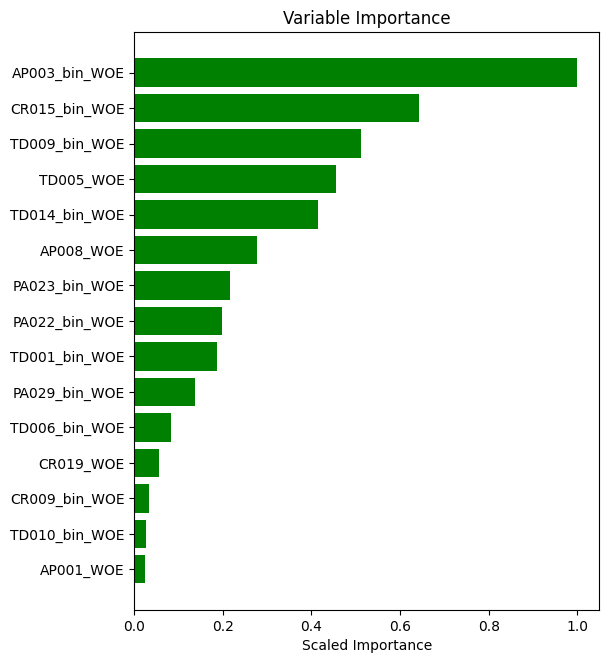

In [ ]:
VarImp(dl_v1)

In [ ]:
createGains(dl_v1)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,800,228,572,800,228,572,0.15,0.09,151.2,1.51,6.0,28.50
1,800,204,596,1600,432,1168,0.29,0.18,302.4,1.43,11.0,27.00
2,800,193,607,2400,625,1775,0.41,0.27,453.6,1.38,14.0,26.04
3,800,178,622,3200,803,2397,0.53,0.37,604.8,1.33,16.0,25.09
4,800,145,655,4000,948,3052,0.63,0.47,756.0,1.25,16.0,23.70
5,800,133,667,4800,1081,3719,0.71,0.57,907.2,1.19,14.0,22.52
6,800,113,687,5600,1194,4406,0.79,0.68,1058.4,1.13,11.0,21.32
7,800,124,676,6400,1318,5082,0.87,0.78,1209.6,1.09,9.0,20.59
8,800,113,687,7200,1431,5769,0.95,0.89,1360.8,1.05,6.0,19.88


deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



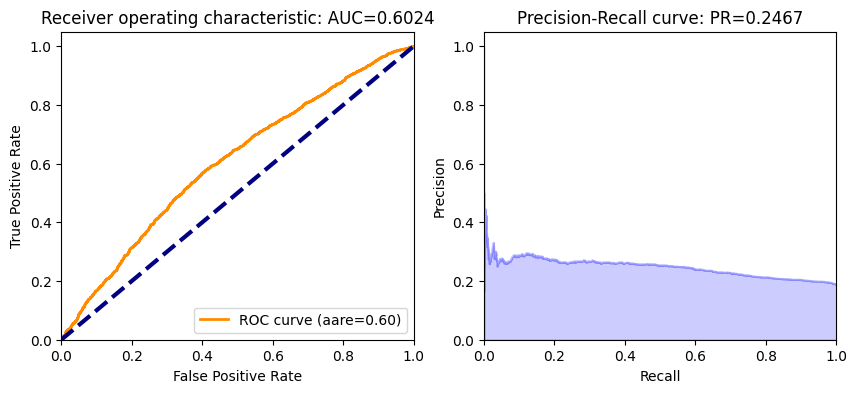

In [ ]:
ROC_AUC(dl_v1,test_hex,'loan_default')

### Hyperparameter Tuning
#### Neural networks often benefit from deeper architectures with more neurons in each layer to learn intricate patterns and representations from the data. 'hidden' specifies the hidden layer sizes, let's **set the "hidden" parameter to 15**, which is the number of features.

In [ ]:
#Use 50% training data
train_smpl = train_df_dl.sample(frac=0.5, random_state=1)
test_smpl = test_df_dl.sample(frac=0.5, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Build and train the model:
dl_v2 = H2ODeepLearningEstimator(distribution="tweedie",
                               hidden=[15],
                               epochs=1000,
                               train_samples_per_iteration=-1,
                               reproducible=True,
                               activation="Tanh",
                               single_node_mode=False,
                               balance_classes=False,
                               force_load_balance=False,
                               seed=23123,
                               tweedie_power=1.5,
                               score_training_samples=0,
                               score_validation_samples=0,
                               stopping_rounds=0)
dl_v2.train(x=predictors,
          y=target,
          training_frame=train_hex)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1690391326174_7


Status of Neuron Layers: predicting loan_default, regression, tweedie distribution, Automatic loss, 256 weights/biases, 8.2 KB, 32,000,000 training samples, mini-batch size 1
    layer    units    type    dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms           mean_bias            bias_rms
--  -------  -------  ------  ---------  ----  ----  ---------------------  ---------------------  ----------  --------------------  -------------------  -------------------  -----------------------
    1        15       Input   0.0
    2        15       Tanh    0.0        0.0   0.0   0.05784030090732914    0.12271425127983093    0.0         -0.05934374509233749  0.477919340133667    -0.5849661127673599  1.6329693794250488
    3        1        Linear             0.0   0.0   0.0004322838174023976  0.0001015078742057085  0.0         0.04343626294285059   0.17134308815002441  -0.5021105036635999  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.14942329051863198
RMSE: 0.38655308887477796
MAE: 0.3020197073141356
RMSLE: 0.27189718953532904
Mean Residual Deviance: 1.8937793450713964

Scoring History: 
     timestamp            duration          training_speed    epochs    iterations    samples     training_rmse        training_deviance    training_mae         training_r2
---  -------------------  ----------------  ----------------  --------  ------------  ----------  -------------------  -------------------  -------------------  --------------------
     2023-07-26 18:53:52  0.000 sec                           0.0       0             0.0         nan                  nan                  nan                  nan
     2023-07-26 18:53:54  1.970 sec         19138 obs/sec     1.0       1             32000.0     0.38813270752203355  1.9006293154254648   0.29807317295523383  0.03455295276138182
     2023-07-26 18:53:55  3.196 sec         24233 obs/sec     2.0       2             64000.0     0.3873059330070523   1.8969043760817588   0.2986840231028051   0.03866163443125592
     2023-07-26 18:53:56  4.086 sec         28012 obs/sec     3.0       3             96000.0     0.38708768916580427  1.8969663350634531   0.30647432185252366  0.03974474237100989
     2023-07-26 18:53:57  4.605 sec         32947 obs/sec     4.0       4             128000.0    0.3867414061731775   1.8941266701537953   0.2975281433238145   0.0414620345495208
     2023-07-26 18:53:57  5.045 sec         37488 obs/sec     5.0       5             160000.0    0.3872732015333149   1.8983977365951306   0.2946867220083849   0.03882411421365506
     2023-07-26 18:53:58  5.475 sec         41406 obs/sec     6.0       6             192000.0    0.386884995871762    1.89665828144286     0.2902008249631037   0.04075012873242634
     2023-07-26 18:53:58  5.901 sec         44728 obs/sec     7.0       7             224000.0    0.3871961764780017   1.8970790915069808   0.2995006454790679   0.039206414166631065
     2023-07-26 18:53:58  6.330 sec         47583 obs/sec     8.0       8             256000.0    0.386778214601114    1.8951614222777085   0.2967038343475137   0.04127956660545207
     2023-07-26 18:53:59  6.753 sec         50130 obs/sec     9.0       9             288000.0    0.3868772788191232   1.8952746752673757   0.2960011590077521   0.040788395959126866
---  ---                  ---               ---               ---       ---           ---         ---                  ---                  ---                  ---
     2023-07-26 19:00:37  6 min 45.268 sec  93817 obs/sec     992.0     992           31744000.0  0.3870539781784477   1.8995679777983772   0.29350966444229254  0.03991198996980039
     2023-07-26 19:00:38  6 min 45.611 sec  93832 obs/sec     993.0     993           31776000.0  0.3874608600004759   1.899127061685758    0.29756537919569553  0

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



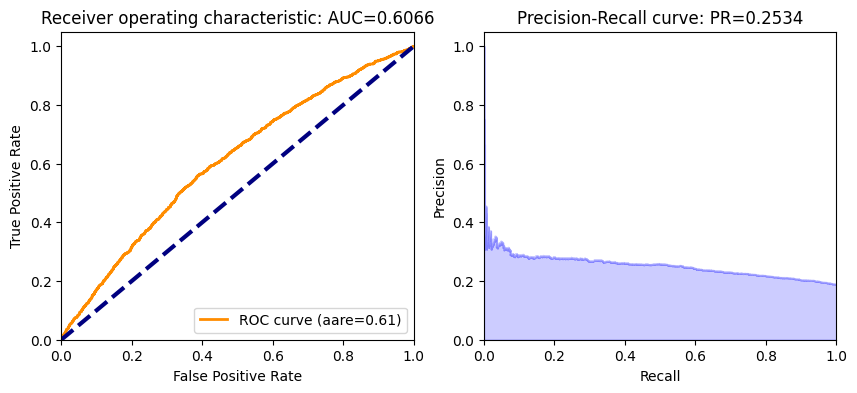

In [ ]:
ROC_AUC(dl_v2,test_hex,'loan_default')

### Try Dropping Two Less Important Features
#### Turns out dropping less important features doesn't lead to better performance with other factors held constant

In [ ]:
#Use all the features first for testing
target = 'loan_default'
predictors = train_df_dl.columns.tolist()
predictors=predictors[2:17]
values_to_remove = ['AP001_WOE', 'TD010_bin_WOE','CR009_bin_WOE']
predictors = [item for item in predictors if item not in values_to_remove]
predictors

['AP003_bin_WOE',
 'AP008_WOE',
 'CR015_bin_WOE',
 'CR019_WOE',
 'PA022_bin_WOE',
 'PA023_bin_WOE',
 'PA029_bin_WOE',
 'TD001_bin_WOE',
 'TD005_WOE',
 'TD006_bin_WOE',
 'TD009_bin_WOE',
 'TD014_bin_WOE']

In [ ]:
#Use 50% training data and all test data
train_smpl = train_df_dl.sample(frac=0.5, random_state=1)
test_smpl = test_df_dl.sample(frac=0.5, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Build and train the model:
dl_v3 = H2ODeepLearningEstimator(distribution="tweedie",
                               hidden=[15],
                               epochs=1000,
                               train_samples_per_iteration=-1,
                               reproducible=True,
                               activation="Tanh",
                               single_node_mode=False,
                               balance_classes=False,
                               force_load_balance=False,
                               seed=23123,
                               tweedie_power=1.5,
                               score_training_samples=0,
                               score_validation_samples=0,
                               stopping_rounds=0)
dl_v3.train(x=predictors,
          y=target,
          training_frame=train_hex)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1690391326174_8


Status of Neuron Layers: predicting loan_default, regression, tweedie distribution, Automatic loss, 211 weights/biases, 7.2 KB, 32,000,000 training samples, mini-batch size 1
    layer    units    type    dropout    l1    l2    mean_rate               rate_rms                momentum    mean_weight           weight_rms           mean_bias            bias_rms
--  -------  -------  ------  ---------  ----  ----  ----------------------  ----------------------  ----------  --------------------  -------------------  -------------------  -----------------------
    1        12       Input   0.0
    2        15       Tanh    0.0        0.0   0.0   0.03518880430169197     0.061045438051223755    0.0         -0.06186141562906818  0.3207350969314575   0.1599672682066492   1.3066606521606445
    3        1        Linear             0.0   0.0   0.00040928883633265894  1.9639825040940195e-05  0.0         -0.03198757975672682  0.16228967905044556  -0.8569770696253185  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.1495221752667646
RMSE: 0.38668097349981495
MAE: 0.3011394386382141
RMSLE: 0.27164728953221895
Mean Residual Deviance: 1.8940746121314866

Scoring History: 
     timestamp            duration          training_speed    epochs    iterations    samples     training_rmse        training_deviance    training_mae         training_r2
---  -------------------  ----------------  ----------------  --------  ------------  ----------  -------------------  -------------------  -------------------  --------------------
     2023-07-26 19:04:44  0.000 sec                           0.0       0             0.0         nan                  nan                  nan                  nan
     2023-07-26 19:04:45  1.971 sec         19161 obs/sec     1.0       1             32000.0     0.3879453471729696   1.8996317109002887   0.2972218121947029   0.035484813608394505
     2023-07-26 19:04:47  3.345 sec         23503 obs/sec     2.0       2             64000.0     0.3876217342968592   1.8976999323658896   0.299447276247762    0.03709328423985814
     2023-07-26 19:04:48  4.212 sec         28152 obs/sec     3.0       3             96000.0     0.3871285095017257   1.8966282698093564   0.3075730707745548   0.03954220423769472
     2023-07-26 19:04:49  5.255 sec         29540 obs/sec     4.0       4             128000.0    0.3868932620139304   1.8949465224362316   0.29872107296687755  0.04070913784053998
     2023-07-26 19:04:49  5.999 sec         32566 obs/sec     5.0       5             160000.0    0.3870850420269493   1.8962857980844738   0.2952595325172198   0.039757875934193
     2023-07-26 19:04:50  6.946 sec         33790 obs/sec     6.0       6             192000.0    0.3869927632396105   1.8979457457124813   0.2895132381356215   0.040215653461574186
     2023-07-26 19:04:52  8.231 sec         32719 obs/sec     7.0       7             224000.0    0.38723287012183466  1.897447896166032    0.29946475771367564  0.03902430137578394
     2023-07-26 19:04:53  9.759 sec         31569 obs/sec     8.0       8             256000.0    0.38683048081245675  1.8955196003429606   0.2969098701553045   0.04102044099522706
     2023-07-26 19:04:54  11.046 sec        31355 obs/sec     9.0       9             288000.0    0.38711361840489045  1.8969039537567338   0.29792040505244566  0.039616091820860566
---  ---                  ---               ---               ---       ---           ---         ---                  ---                  ---                  ---
     2023-07-26 19:10:56  6 min 12.565 sec  102812 obs/sec    992.0     992           31744000.0  0.38715404732347697  1.9004186333398      0.29466337583896707  0.03941548244682358
     2023-07-26 19:10:56  6 min 12.875 sec  102829 obs/sec    993.0     993           31776000.0  0.3884846417284144   1.901709365158855    0.2992909968662

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



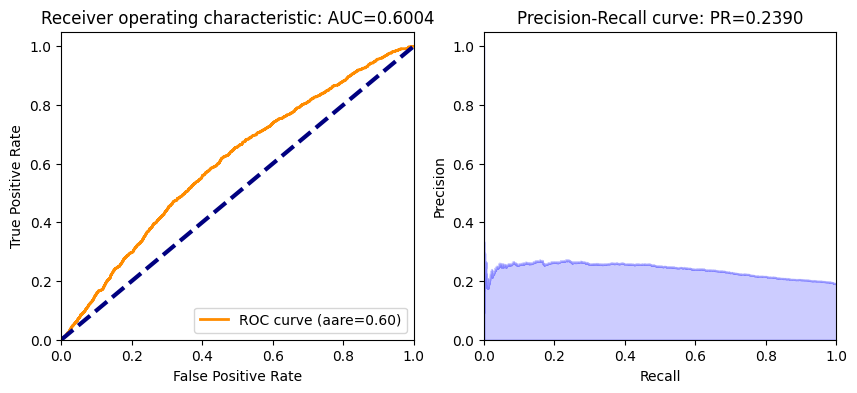

In [ ]:
ROC_AUC(dl_v3,test_hex,'loan_default')

### Insights:
- For models built in Section 5 GBM and Section 6 Deep Learning, the deep learning model 'dl_v2' performs the best.
We get AUC of 60.66% from ROC curve and the precision-recall rate of 25.34%.
- Using same sample sizes and features, deep learning model performs better than GBM model overall, indicating better prediction power for this data.
- 'dl_v2' model has hyperparameter 'hidden' set to 15, 'balance_classes' set to False, use 50% of the train and test data and all 15 WOE transformed features.

### Next Step to Improve the Model:
- Increase Model Complexity: Consider adding more hidden layers and neurons to the deep learning model to capture complex patterns in the data.
- Hyperparameter Tuning: Optimize hyperparameters such as learning rate, activation functions, and regularization to find the best configuration for the model's architecture. Use techniques like cross-validation to prevent overfitting and enhance generalization.



## Section 7 GLM <a class="anchor" id="7"></a>
### What's GLM?

**Generalized Linear Model (GLM)** is a versatile statistical framework for analyzing data and building predictive models. It extends traditional linear regression to handle a wider range of data distributions, making it suitable for various types of data, including binary, count, and continuous outcomes. GLM incorporates a link function to connect the linear predictor to the response variable's distribution, allowing for flexible modeling. It's used for tasks like regression, classification, and more, offering interpretability and adaptability. **Regularization techniques like Ridge and LASSO can be applied to control model complexity.**

In [163]:
!pip install h2o
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 mins 37 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_dsx5kv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [164]:
train_df_glm = train_df_rf
test_df_glm = test_df_rf

In [165]:
#Use all the features first for testing
target = 'loan_default'
predictors = train_df_glm.columns.tolist()
predictors=predictors[2:17]
predictors

['AP001_WOE',
 'AP003_bin_WOE',
 'AP008_WOE',
 'CR009_bin_WOE',
 'CR015_bin_WOE',
 'CR019_WOE',
 'PA022_bin_WOE',
 'PA023_bin_WOE',
 'PA029_bin_WOE',
 'TD001_bin_WOE',
 'TD005_WOE',
 'TD006_bin_WOE',
 'TD009_bin_WOE',
 'TD010_bin_WOE',
 'TD014_bin_WOE']

In [166]:
#Use 50% training data
train_smpl = train_df_glm.sample(frac=0.5, random_state=1)
test_smpl = test_df_glm.sample(frac=0.5, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [167]:
glm_v1 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0.05) #, compute_p_values = True)
glm_v1.train(predictors,target,training_frame=train_hex)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1691688810087_1


GLM Model: summary
    family    link    regularization                             number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  -----------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.05 )  15                            8                              4                       Key_Frame__upload_b373c209abd41bd81c47e5a061084af2.hex

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1526465109366919
RMSE: 0.3907000267938203
LogLoss: 0.4805152258712424
AUC: 0.6264445896951362
AUCPR: 0.2790494840657378
Gini: 0.25288917939027233
Null degrees of freedom: 31999
Residual degrees of freedom: 31991
Null deviance: 31437.68171069583
Residual deviance: 30752.974455759515
AIC: 30770.974455759515

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18583615474294712
       0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      12789  13020  0.5045   (13020.0/25809.0)
1      1976   4215   0.3192   (1976.0/6191.0)
Total  14765  17235  0.4686   (14996.0/32000.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.185836     0.359857  266
max f2                       0.153146     0.552606  373
max f0point5                 0.213906     0.308948  165
max accuracy                 0.281128     0.806688  5
max precision                0.284422     0.590909  2
max recall                   0.136661     1         399
max specificity              0.286971     0.999845  0
max absolute_mcc             0.205605     0.150446  194
max min_per_class_accuracy   0.193739     0.589446  236
max mean_per_class_accuracy  0.194394     0.590155  233
max tns                      0.286971     25805     0
max fns                      0.286971     6187      0
max fps                      0.136661     25809     399
max tps                      0.136661     6191      399
max tnr                      0.286971     0.999845  0
max fnr                      0.286971     0.999354  0
max fpr                      0.136661     1         399
max tpr                      0.136661     1         399

Gains/Lift Table: Avg response rate: 19.35 %, avg score: 19.35 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100938                   0.264724           2.14433   2.14433            0.414861         0.271489  0.414861                    0.271489            0.0216443       0.0216443                  114.433   114.433            0.0143213
2        0.02                        0.258925           1.50009   1.82523            0.290221         0.261458  0.353125                    0.26652             0.0148603       0.0365046                  50.0091   82.523             0.0204637
3        0.030375                    0.256102           2.0862    1.91437            0.403614         0.257218  0.37037                     0.263343            0.0216443       0.0581489                  108.62    91.4368            0.0344363
4        0.04                        0.252129           1.87956   1.90599            0.363636         0.254285  0.36875          

In [168]:
glm_v1.predict(test_hex)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.775178,0.224822
1,0.777386,0.222614
1,0.781984,0.218016
0,0.831052,0.168948
1,0.794822,0.205178
1,0.787306,0.212694
1,0.795895,0.204105
0,0.844835,0.155165
0,0.834172,0.165828
1,0.785259,0.214741


In [169]:
glm_v1.predict(test_hex)['p1']

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


p1
0.224822
0.222614
0.218016
0.168948
0.205178
0.212694
0.204105
0.155165
0.165828
0.214741


In [170]:
predictions = glm_v1.predict(test_hex)['p1']
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,p1
0,0,0.224822
1,0,0.222614
2,0,0.218016
3,0,0.168948
4,0,0.205178


In [171]:
def createGains(model):
    predictions = model.predict(test_hex)['p1']
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='p1',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(glm_v1)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,800,201,599,800,201,599,0.13,0.09,151.2,1.33,4.0,25.12
1,800,217,583,1600,418,1182,0.28,0.18,302.4,1.38,10.0,26.12
2,800,195,605,2400,613,1787,0.41,0.28,453.6,1.35,13.0,25.54
3,800,171,629,3200,784,2416,0.52,0.37,604.8,1.30,15.0,24.50
4,800,161,639,4000,945,3055,0.62,0.47,756.0,1.25,15.0,23.62
5,800,127,673,4800,1072,3728,0.71,0.57,907.2,1.18,14.0,22.33
6,800,125,675,5600,1197,4403,0.79,0.68,1058.4,1.13,11.0,21.38
7,800,107,693,6400,1304,5096,0.86,0.79,1209.6,1.08,7.0,20.38
8,800,117,683,7200,1421,5779,0.94,0.89,1360.8,1.04,5.0,19.74


In [172]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df)['p1'].as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)

    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')

    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



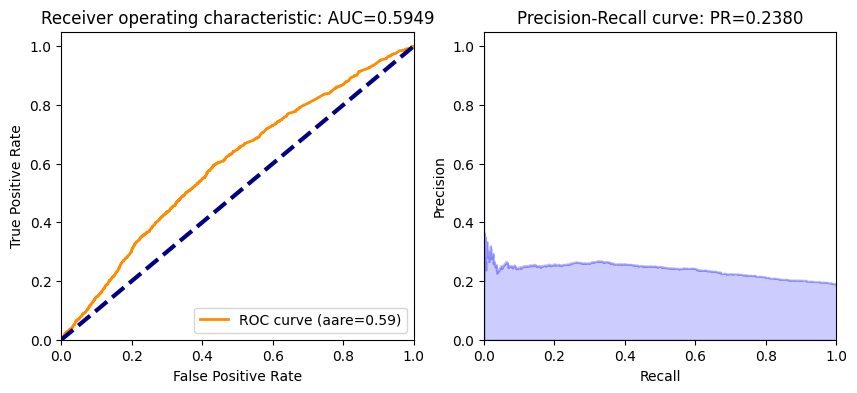

In [173]:
ROC_AUC(glm_v1,test_hex,'loan_default')

In [174]:
# Print the Coefficients table
coefs = glm_v1._model_json['output']['coefficients_table'].as_data_frame()
coefs = pd.DataFrame(coefs)
coefs.sort_values(by='standardized_coefficients',ascending=False)

,names,coefficients,standardized_coefficients
13,TD009_bin_WOE,0.305424,0.105397
11,TD005_WOE,0.210866,0.068021
15,TD014_bin_WOE,0.136815,0.038387
2,AP003_bin_WOE,0.169291,0.033436
5,CR015_bin_WOE,0.128310,0.024204
8,PA023_bin_WOE,0.069992,0.013199
9,PA029_bin_WOE,0.023497,0.004699
7,PA022_bin_WOE,0.001180,0.000229
1,AP001_WOE,0.000000,0.000000
3,AP008_WOE,0.000000,0.000000


### Hyperparameter Tuning
To get the best possible model, GLM needs to find the optimal values of the regularization parameters 𝛼 and 𝜆. When performing regularization, penalties are introduced to the model buidling process to avoid overfitting, to reduce variance of the prediction error, and to handle correlated predictors.

**Lambda (λ)** is a regularization parameter that controls the extent of regularization in models like Ridge Regression, LASSO, and Elastic Net. When λ is 0, no regularization occurs, risking overfitting. **Alpha (α)** adjusts the balance between LASSO and Ridge penalties in Elastic Net; **α=0 implies Ridge, α=1 means LASSO, and 0<α<1 blends both.** Ridge (λ>0, α=0) minimizes coefficients with L2 penalty, LASSO (λ>0, α=1) enforces sparsity via L1 penalty, while Elastic Net (λ>0, 0<α<1) combines both penalties, offering flexibility in feature selection and coefficient control.

We'll perform **grid search to find the best value for the regularization parameter lambda (λ)** in a GLM.








In [177]:
train, valid= train_hex.split_frame(ratios = [.8])

In [178]:
# Example of values to grid over for `lambda`
# import Grid Search
from h2o.grid.grid_search import H2OGridSearch

# select the values for lambda_ to grid over
hyper_params = {'lambda': [1, 0.5, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0]}

# this example uses cartesian grid search because the search space is small
# and we want to see the performance of all models. For a larger search space use
# random grid search instead: {'strategy': "RandomDiscrete"}
# initialize the glm estimator
glm_v2 = H2OGeneralizedLinearEstimator(family = 'binomial')

# build grid search with previously made GLM and hyperparameters
grid = H2OGridSearch(model = glm_v2, hyper_params = hyper_params,
                     search_criteria = {'strategy': "Cartesian"})

# train using the grid
grid.train(x = predictors, y = target, training_frame = train, validation_frame = valid)

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,lambda,model_ids,logloss
,0.001,Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_5,0.4729397
,0.0001,Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_6,0.4731181
,1e-05,Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_7,0.4731423
,0.0,Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_8,0.4731491
,0.01,Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_4,0.4732497
,0.1,Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_3,0.4911780
,1.0,Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_1,0.4929956
,0.5,Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_2,0.4929956


In [179]:
# sort the grid models by decreasing AUC
sorted_grid = grid.get_grid(sort_by = 'auc', decreasing = True)
print(sorted_grid)

Hyper-Parameter Search Summary: ordered by decreasing auc
    lambda    model_ids                                                    auc
--  --------  -----------------------------------------------------------  --------
    0.001     Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_5  0.641245
    0.01      Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_4  0.641218
    0.0001    Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_6  0.640806
    1e-05     Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_7  0.64072
    0         Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_8  0.640669
    0.1       Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_3  0.594032
    1         Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_1  0.5
    0.5       Grid_GLM_py_9_sid_ab82_model_python_1691688810087_3_model_2  0.5


After conducting a grid search over different lambda values to find the best regularization strength for the GLM model in terms of binary classification performance, the results are sorted by AUC to evaluate binary classification models' predictive accuracy. Using 50% of the train data, the hyper-parameter search evaluated models with different lambda values. **Lambda values of 0.001, 0.01, and 0.0001 had the highest AUCs, indicating better model performance.** Lower lambda values led to better results, while higher values and extremes like 0.1, 1, and 0.5 resulted in less effective models.



In [181]:
glm_v2 = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0.001) #, compute_p_values = True)
glm_v2.train(predictors,target,training_frame=train_hex)
glm_v2.predict(test_hex)
glm_v2.predict(test_hex)['p1']



glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


p1
0.357331
0.294859
0.253227
0.16267
0.221681
0.247293
0.177558
0.0841446
0.108281
0.277609


In [182]:
predictions = glm_v2.predict(test_hex)['p1']
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,loan_default,p1
0,0,0.357331
1,0,0.294859
2,0,0.253227
3,0,0.162670
4,0,0.221681


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



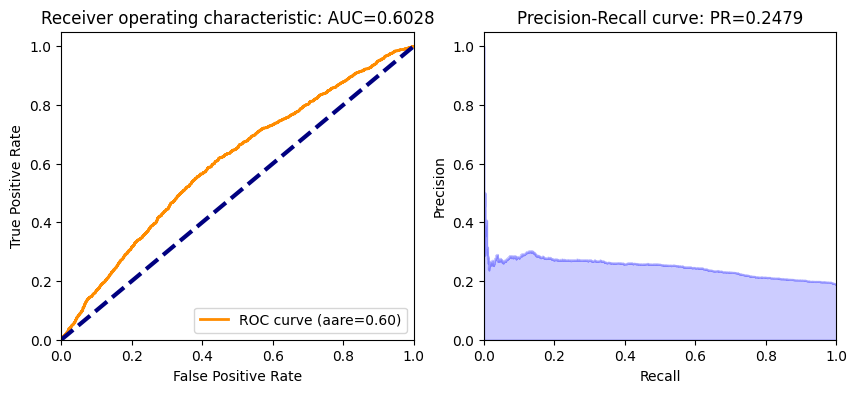

In [184]:
ROC_AUC(glm_v2,test_hex,'loan_default')

### Insights:

- After fine-tuning the model's hyperparameters and optimizing the lambda value to 0.001 in "glm_v2", a significant improvement in the area under the ROC curve (AUC) was achieved. The AUC increased from 0.5949 to 0.628, indicating an enhancement in the model's ability to distinguish between positive and negative instances in the binary classification task. This adjustment underscores **the importance of selecting appropriate hyperparameters to maximize the model's predictive accuracy and overall performance**.

## Section 8 AutoML <a class="anchor" id="8"></a>
### What's autoML?

AutoML, short for **Automated Machine Learning**, is a powerful tool that **automates the process of building and optimizing machine learning models.** It streamlines and accelerates the complex steps involved in **model selection, feature engineering, hyperparameter tuning, and ensemble building.** AutoML algorithms search through a variety of model architectures, preprocessing techniques, and hyperparameter configurations to find the best-performing model for a given task. It **reduces the need for manual trial-and-error, making machine learning accessible to a wider range of users**, including those without extensive data science expertise. AutoML helps in faster model development, improved model accuracy, and increased efficiency in deploying machine learning solutions across different domains and applications.

In [187]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 46 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_dsx5kv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.166 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [188]:
train_df_auto = train_df_rf
test_df_auto = test_df_rf

In [189]:
#Use all the features first for testing
target = 'loan_default'
predictors = train_df_auto.columns.tolist()
predictors=predictors[2:17]
predictors

['AP001_WOE',
 'AP003_bin_WOE',
 'AP008_WOE',
 'CR009_bin_WOE',
 'CR015_bin_WOE',
 'CR019_WOE',
 'PA022_bin_WOE',
 'PA023_bin_WOE',
 'PA029_bin_WOE',
 'TD001_bin_WOE',
 'TD005_WOE',
 'TD006_bin_WOE',
 'TD009_bin_WOE',
 'TD010_bin_WOE',
 'TD014_bin_WOE']

In [190]:
#Use 50% training data
train_smpl = train_df_auto.sample(frac=0.5, random_state=1)
test_smpl = test_df_auto.sample(frac=0.5, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### Run AutoML

Run AutoML, stopping after 60 seconds.  The `max_runtime_secs` argument provides a way to limit the AutoML run by time.  When using a time-limited stopping criterion, the number of models train will vary between runs.  If different hardware is used or even if the same machine is used but the available compute resources on that machine are not the same between runs, then AutoML may be able to train more models on one run vs another.

The `test` frame is passed explicitly to the `leaderboard_frame` argument here, which means that instead of using cross-validated metrics, we use test set metrics for generating the leaderboard.

In [191]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml_v1 = H2OAutoML(max_runtime_secs = 60, max_models=20, seed=1)
aml_v1.train(predictors,target,training_frame=train_hex)

AutoML progress: |
19:21:17.952: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████████████
19:21:29.877: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
19:21:31.109: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

████████
19:21:38.427: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███████████
19:21:48.894: _r

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20230810_192117


GLM Model: summary
    family    link      regularization             lambda_search                                                              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  -------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.0117 )  nlambda = 30, lambda.max = 5.7259, lambda.min = 0.0117, lambda.1se = -1.0  15                            15                             14                      AutoML_1_20230810_192117_training_Key_Frame__upload_932d3d6ace027d22c9061cf756964de2.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.14996128630919411
RMSE: 0.3872483522356088
MAE: 0.3002231894050112
RMSLE: 0.2717943242231826
Mean Residual Deviance: 0.14996128630919411
R^2: 0.04083176836665714
Null degrees of freedom: 22384
Residual degrees of freedom: 22369
Null deviance: 3499.785838731167
Residual deviance: 3356.88339403131
AIC: 21087.069151105054

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.1475144003497862
RMSE: 0.38407603459443573
MAE: 0.2980889742140967
RMSLE: 0.27059565475447794
Mean Residual Deviance: 0.1475144003497862
R^2: 0.03373079160541492
Null degrees of freedom: 3169
Residual degrees of freedom: 3154
Null deviance: 484.0569529248307
Residual deviance: 467.6206491088222
AIC: 2963.2308537435215

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    deviance_test    alpha    iterations    training_rmse       training_deviance    training_mae        training_r2          validation_rmse      validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  ---------------  -------  ------------  ------------------  -------------------  ------------------  -------------------  -------------------  ---------------------  ------------------  -------------------
    2023-08-10 19:21:30  0.000 sec   1            5.7       16            0.152986          0.149866         0
    2023-08-10 19:21:30  0.062 sec   2            3.6       16            0.152202          0.149237         0
    2023-08-10 19:21:30  0.130 sec   3            2.2       16            0.151504          0.14869          0
    2023-08-10 19:21:30  0.204 sec   4            1.4       16            0.150949          0.148262         0
    2023-08-10 19:21:30  0.243 sec   5            0.85      16            0.150548          0.147958         0        5             0.3872483522356088  0.14996128630919411  0.3002231894050112  0.04083176836665714  0.38407603459443573  0.1475144003497862     0.2980889742140967  0.03373079160541492
    2023-08-10 19:21:30  0.285 sec   6            0.53      16            0.150285          0.147759         0
    2023-08-10 19:21:30  0.319 sec   7            0.33      16            0.150127          0.147642         0
    2023-08-10 19:21:30  0.328 sec   8            0.2       16            0.150041          0.147578         0
    2023-08-10 19:21:30  0.364 sec   9            0.13      16            0.149998          0.147547         0
    2023-08-10 19:21:30  0.375 sec   10           0.079     16            0.149977          0.147531         0
    2023-08-10 19:21:30  0.384 sec   11           0.049     16            0.149968          0.147523         0
    2023-08-10 19:21:30  0.392 sec   12           0.03      16            0.149964          0.147518         0
    2023-08-10 19:21:30  0.399 sec   13           0.019     16            0.149962          0.147516         

### Leaderboard

Next, we will view **the AutoML Leaderboard**.  Since we specified a `leaderboard_frame` in the `H2OAutoML.train()` method for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric.  In the case of regression, the default ranking metric is mean residual deviance.  In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

Now we will view a snapshot of the top models. Here we should see the **GLM at the top of the leaderboard**.

In [192]:
aml_v1.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GLM_1_AutoML_1_20230810_192117,0.384076,0.147514,0.298089,0.270596,0.147514
GBM_2_AutoML_1_20230810_192117,0.385505,0.148614,0.297588,0.271512,0.148614
GBM_1_AutoML_1_20230810_192117,0.386179,0.149134,0.298923,0.272413,0.149134
GBM_3_AutoML_1_20230810_192117,0.387704,0.150314,0.299725,0.273626,0.150314
GBM_4_AutoML_1_20230810_192117,0.388605,0.151014,0.297659,0.274501,0.151014
XGBoost_3_AutoML_1_20230810_192117,0.389388,0.151623,0.298836,0.274869,0.151623
DRF_1_AutoML_1_20230810_192117,0.399637,0.15971,0.308563,0.285488,0.15971
XRT_1_AutoML_1_20230810_192117,0.402102,0.161686,0.30966,0.288018,0.161686
XGBoost_2_AutoML_1_20230810_192117,0.418907,0.175483,0.312766,0.301935,0.175483
XGBoost_1_AutoML_1_20230810_192117,0.428606,0.183703,0.318993,0.311319,0.183703


The ranking displays the performance of various machine learning models based on different evaluation metrics. Models are compared using metrics such as Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Logarithmic Error (RMSLE), and Mean Residual Deviance. Lower values for these metrics indicate better model performance. In this case, the top-performing model is "GLM_1," with the lowest RMSE, MSE, MAE, RMSLE, and mean residual deviance values, showcasing its accurate predictive ability. The subsequent models, such as "GBM" and "XGBoost," exhibit slightly higher error values. While the "DRF" and "XRT" models have larger errors, the "XGBoost_1" model ranks last with the highest error metrics. Overall, the ranking helps in selecting the best-performing model based on these evaluation criteria.

### Predict Using Leader Model

If you need to generate predictions on a test set, you can make predictions on the `"H2OAutoML"` object directly, or on the leader model object.

In [193]:
pred = aml_v1.predict(test_hex)
pred.head()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
0.338041
0.29501
0.252813
0.172356
0.228082
0.253299
0.193611
0.0664591
0.101311
0.279401


#### If needed, the standard `model_performance()` method can be applied to the AutoML leader model and a test set to generate an H2O model performance object.

In [194]:
perf = aml_v1.leader.model_performance(test_hex)
perf

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.15068694895577303
RMSE: 0.3881841688628904
MAE: 0.3000688362044224
RMSLE: 0.27298560774821146
Mean Residual Deviance: 0.15068694895577303
R^2: 0.016910672983428743
Null degrees of freedom: 7999
Residual degrees of freedom: 7984
Null deviance: 1226.4295416639784
Residual deviance: 1205.4955916461843
AIC: 7596.610291955

In [205]:
# Get the best model from AutoML
best_model = aml_v1.leader
best_model

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20230810_192117


GLM Model: summary
    family    link      regularization             lambda_search                                                              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  -------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.0117 )  nlambda = 30, lambda.max = 5.7259, lambda.min = 0.0117, lambda.1se = -1.0  15                            15                             14                      AutoML_1_20230810_192117_training_Key_Frame__upload_932d3d6ace027d22c9061cf756964de2.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.14996128630919411
RMSE: 0.3872483522356088
MAE: 0.3002231894050112
RMSLE: 0.2717943242231826
Mean Residual Deviance: 0.14996128630919411
R^2: 0.04083176836665714
Null degrees of freedom: 22384
Residual degrees of freedom: 22369
Null deviance: 3499.785838731167
Residual deviance: 3356.88339403131
AIC: 21087.069151105054

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.1475144003497862
RMSE: 0.38407603459443573
MAE: 0.2980889742140967
RMSLE: 0.27059565475447794
Mean Residual Deviance: 0.1475144003497862
R^2: 0.03373079160541492
Null degrees of freedom: 3169
Residual degrees of freedom: 3154
Null deviance: 484.0569529248307
Residual deviance: 467.6206491088222
AIC: 2963.2308537435215

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    deviance_test    alpha    iterations    training_rmse       training_deviance    training_mae        training_r2          validation_rmse      validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  ---------------  -------  ------------  ------------------  -------------------  ------------------  -------------------  -------------------  ---------------------  ------------------  -------------------
    2023-08-10 19:21:30  0.000 sec   1            5.7       16            0.152986          0.149866         0
    2023-08-10 19:21:30  0.062 sec   2            3.6       16            0.152202          0.149237         0
    2023-08-10 19:21:30  0.130 sec   3            2.2       16            0.151504          0.14869          0
    2023-08-10 19:21:30  0.204 sec   4            1.4       16            0.150949          0.148262         0
    2023-08-10 19:21:30  0.243 sec   5            0.85      16            0.150548          0.147958         0        5             0.3872483522356088  0.14996128630919411  0.3002231894050112  0.04083176836665714  0.38407603459443573  0.1475144003497862     0.2980889742140967  0.03373079160541492
    2023-08-10 19:21:30  0.285 sec   6            0.53      16            0.150285          0.147759         0
    2023-08-10 19:21:30  0.319 sec   7            0.33      16            0.150127          0.147642         0
    2023-08-10 19:21:30  0.328 sec   8            0.2       16            0.150041          0.147578         0
    2023-08-10 19:21:30  0.364 sec   9            0.13      16            0.149998          0.147547         0
    2023-08-10 19:21:30  0.375 sec   10           0.079     16            0.149977          0.147531         0
    2023-08-10 19:21:30  0.384 sec   11           0.049     16            0.149968          0.147523         0
    2023-08-10 19:21:30  0.392 sec   12           0.03      16            0.149964          0.147518         0
    2023-08-10 19:21:30  0.399 sec   13           0.019     16            0.149962          0.147516         

In [206]:
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(best_model)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,800,230,570,800,230,570,0.15,0.09,151.2,1.52,6.0,28.75
1,800,197,603,1600,427,1173,0.28,0.18,302.4,1.41,10.0,26.69
2,800,198,602,2400,625,1775,0.41,0.27,453.6,1.38,14.0,26.04
3,800,189,611,3200,814,2386,0.54,0.37,604.8,1.35,17.0,25.44
4,800,147,653,4000,961,3039,0.64,0.47,756.0,1.27,17.0,24.02
5,800,112,688,4800,1073,3727,0.71,0.57,907.2,1.18,14.0,22.35
6,800,109,691,5600,1182,4418,0.78,0.68,1058.4,1.12,10.0,21.11
7,800,124,676,6400,1306,5094,0.86,0.79,1209.6,1.08,7.0,20.41
8,800,107,693,7200,1413,5787,0.93,0.89,1360.8,1.04,4.0,19.62


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



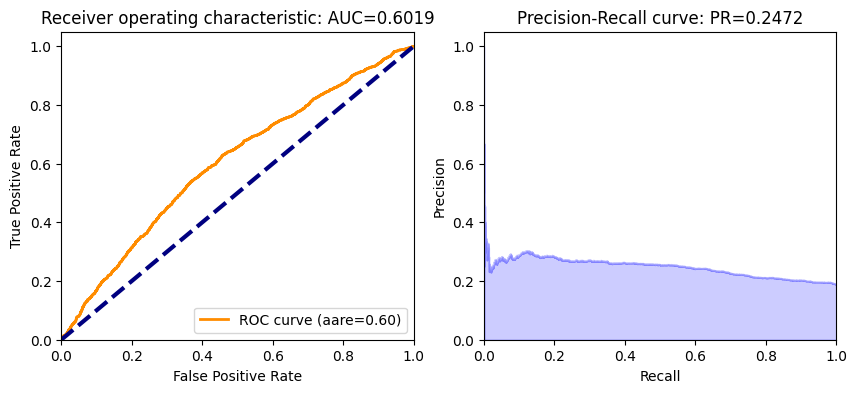

In [208]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)

    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')

    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')


    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

ROC_AUC(best_model,test_hex,'loan_default')

### Insights:

- After employing AutoML on my dataset, the achieved AUC is 0.6019. The best model identified by AutoML is the GLM with a Lambda value of 0.0117. Although this AUC is slightly lower than that of the GLM with Lambda 0.001, it's important to note that AutoML's model selection process rigorously compared the performance of various machine learning techniques. Consequently, while the specific GLM variant yielded a slightly diminished AUC, **the broader AutoML process ensured a comprehensive evaluation, ultimately leading to a well-informed model selection decision.**

## Section 9 SHAP <a class="anchor" id="9"></a>
### 'shap' is a Python package that's used for explaining the output of machine learning models. It provides tools for understanding the importance of input features in making predictions. 
**SHAP (SHapley Additive exPlanations)** is a technique in explainable AI that quantifies the contribution of each feature to a model's predictions. It calculates values representing how much each feature influences predictions, considering interactions. SHAP values enable clear feature importance ranking and help interpret complex models. They enhance model transparency, aiding users in understanding decision-making processes.

In [162]:
#Concatenate along rows (vertically)
data_shap = pd.concat([train_df_rf, test_df_rf])
data_shap = data_shap.sort_values(by='id', ascending=True)
data_shap

,id,loan_default,AP001_WOE,AP003_bin_WOE,AP008_WOE,CR009_bin_WOE,CR015_bin_WOE,CR019_WOE,PA022_bin_WOE,PA023_bin_WOE,PA029_bin_WOE,TD001_bin_WOE,TD005_WOE,TD006_bin_WOE,TD009_bin_WOE,TD010_bin_WOE,TD014_bin_WOE
15109,1,1,0.01,0.07,0.02,0.07,0.19,0.14,-0.15,-0.13,-0.14,-0.24,0.04,-0.14,0.04,-0.24,-0.08
24229,2,0,0.10,0.07,0.09,0.08,-0.27,-0.20,-0.15,-0.13,-0.14,0.02,-0.03,-0.14,-0.18,-0.24,-0.08
56026,3,0,-0.04,-0.50,-0.09,0.07,0.19,0.12,-0.15,-0.13,-0.14,0.02,0.04,-0.14,0.04,-0.24,-0.30
22834,4,0,-0.03,-0.50,0.11,-0.09,0.08,-0.05,-0.15,-0.13,-0.14,-0.24,-0.44,-0.14,-0.49,-0.24,-0.30
2642,5,0,-0.04,0.07,0.09,-0.09,-0.27,-0.20,-0.15,-0.13,-0.14,0.02,-0.22,-0.14,-0.49,-0.24,-0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51386,79996,0,-0.10,0.07,0.02,0.07,0.08,-0.09,-0.15,-0.13,-0.14,0.02,-0.22,-0.14,-0.18,-0.24,0.14
17903,79997,0,0.01,-0.50,0.09,0.08,0.08,0.02,-0.15,-0.13,-0.14,-0.24,-0.22,-0.14,-0.49,-0.24,-0.30
16471,79998,0,-0.14,0.07,0.02,-0.09,0.19,-0.09,-0.15,-0.13,-0.14,-0.24,-0.51,0.11,-0.49,0.00,-0.08
36131,79999,0,-0.05,0.07,-0.09,0.07,0.19,0.02,-0.15,-0.13,-0.14,-0.24,-0.44,-0.14,-0.49,-0.24,-0.30


In [163]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

predictors = data_shap.columns.tolist()
predictors=predictors[2:17]
predictors

Y = data_shap['loan_default']
X = data_shap[predictors]

#Train-test split on the features (X) and target (Y) data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [164]:
#max_depth=6: This sets the maximum depth of each tree in the forest to 6. It limits how deep each individual tree can grow, helping to control overfitting.the code.
#n_estimators=10: This specifies the number of decision trees (estimators) to create in the random forest ensemble.
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  
print(model.feature_importances_)
#which features (input variables) were most influential in making predictions

[0.03332825 0.15531092 0.04499582 0.01275476 0.02906626 0.03585508
 0.02209713 0.03377747 0.07034303 0.01827997 0.11864086 0.00602769
 0.31841822 0.02206263 0.07904192]


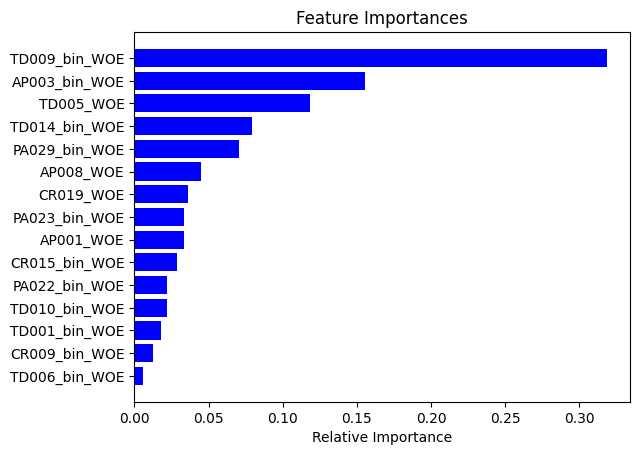

In [165]:
importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Keep the top 10 variables (features)

In [166]:
predictors = data_shap.columns.tolist()
predictors= ['AP001_WOE',
 'AP003_bin_WOE',
 'AP008_WOE',
 'CR015_bin_WOE',
 'PA022_bin_WOE',
 'PA023_bin_WOE',
 'PA029_bin_WOE',
 'TD005_WOE',
 'TD009_bin_WOE',
 'TD014_bin_WOE']

Y = data_shap['loan_default']
X = data_shap[predictors]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#### Calculate the SHAP (SHapley Additive exPlanations) values using a TreeExplainer. The TreeExplainer is designed to work with tree-based models like random forests. The calculated shap_values will provide an explanation for each prediction made by the model, showing how much each feature contributed to that prediction. 
#### Second part of the code is calculating the correlation between the SHAP values for each feature and the corresponding actual values of that feature in the training data. 

In [167]:
#ARCHFLAGS="-arch x86_64" 
#!pip3 install shap
!pip install git+https://github.com/slundberg/shap.git
import shap

#'check_additivity=False' disables the additivity check for faster computation
shap_values = shap.TreeExplainer(model).shap_values(X_train, check_additivity=False)

# Determine the correlation in order to plot with different colors
corrlist = np.zeros(len(predictors))
X_train_np = X_train.to_numpy() # our X_train is a pandas data frame. Convert it to numpy
for i in range(0,len(predictors) ):
    tmp = np.corrcoef(shap_values[:,i],X_train_np[:,i])
    corrlist[i] = tmp[0][1]


  Cloning https://github.com/slundberg/shap.git to /private/var/folders/jl/pdyb2sq53l1_msbfhzzlrt6m0000gn/T/pip-req-build-pqzk4pft
  Running command git clone --filter=blob:none --quiet https://github.com/slundberg/shap.git /private/var/folders/jl/pdyb2sq53l1_msbfhzzlrt6m0000gn/T/pip-req-build-pqzk4pft
  Resolved https://github.com/slundberg/shap.git to commit ec17a2604127c16b83caaf8e3b4d10eeadaa73ee
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [168]:
corrlist
# The correlation coefficient measures the strength and direction of the linear relationship between two variables. 
# In this context, it helps understand how the SHAP values are related to the actual feature values. After this loop completes, corrlist will contain the correlation coefficients for each feature, indicating how much the SHAP values and the actual feature values align.

array([0.23669973, 0.68691416, 0.78960678, 0.05166419, 0.94047705,
       0.816006  , 0.96310438, 0.72578309, 0.80402505, 0.69202017])

#### 'shap_v_abs' is the absolute value of the SHAP values. This is important because SHAP values can be positive (indicating a feature's positive impact on the prediction) or negative (indicating a feature's negative impact on the prediction). Taking the absolute value helps measure the overall impact of each feature without considering the direction.

#### 'shap_v_abs_mean' calculates the mean of the absolute SHAP values for each feature along axis=0. This gives you an idea of the average contribution of each feature across all the instances in the training data.


In [169]:
# Calculate the absolute SHAP values
shap_v_abs = np.abs(shap_values)
shap_v_abs_mean = shap_v_abs.mean(axis=0)

In [170]:
shap_v_abs_mean

array([0.00128068, 0.03765104, 0.00477671, 0.00717649, 0.00687697,
       0.00435646, 0.00428661, 0.00684885, 0.01171429, 0.00281381])

In [171]:
k = pd.DataFrame({'Variables': predictors, 'abs_SHAP': shap_v_abs_mean}).reset_index()
k

,index,Variables,abs_SHAP
0,0,AP001_WOE,0.001281
1,1,AP003_bin_WOE,0.037651
2,2,AP008_WOE,0.004777
3,3,CR015_bin_WOE,0.007176
4,4,PA022_bin_WOE,0.006877
5,5,PA023_bin_WOE,0.004356
6,6,PA029_bin_WOE,0.004287
7,7,TD005_WOE,0.006849
8,8,TD009_bin_WOE,0.011714
9,9,TD014_bin_WOE,0.002814


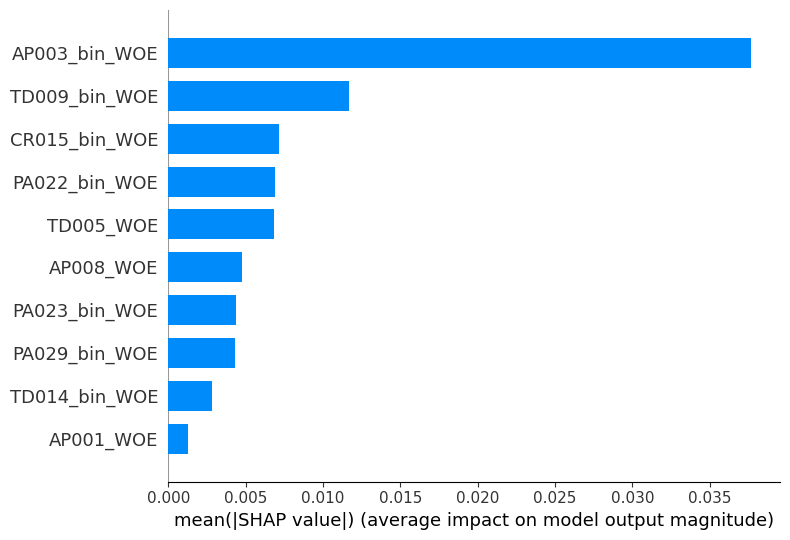

In [172]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

Can the above variable importance plot show the directions between the features and the target variable? Yes, that's the power of the Shap value plot as shown below. This plot is made of many dots. Each dot has three characteristics. The graph below plots the SHAP values of every feature for every sample. It shorts features by the total of absolute SHAP values over all samples. The color represents the feature value (red high, blue low). 

* The vertical location shows the feature importance.
* The horizontal location shows whether the effect of that value caused a higher or lower prediction.
* Color shows whether that feature was high or low for that observation

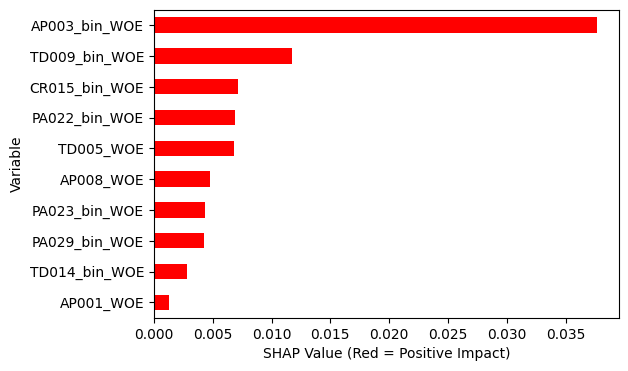

In [173]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(6,4),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train)  

### The summary_plot

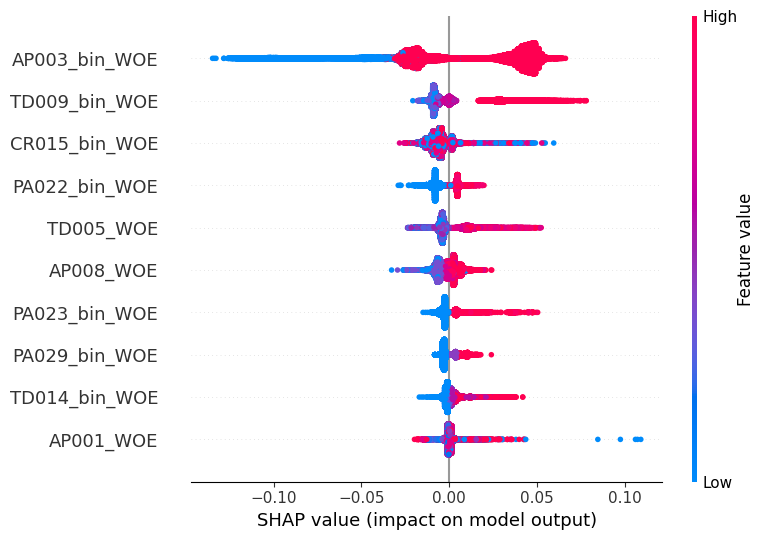

In [174]:
shap.summary_plot(shap_values, X_train)
#generates a summary plot using the SHAP values and the training data

#### We can describe the model. A high probability of loan default is associated with the following characteristics:
* High AP003_bin_WOE
* Low PA022_bin_WOE
* High TD009_bin_WOE
* High TD005_WOE
* High PA029_bin_WOE
* High AP008_WOE
* High PA023_bin_WOE
* High CR015_bin_WOE
* High TD014_bin_WOE
* Low AP001_WOE

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Vertical dispersion at a single value represents interaction effects with other features. To help reveal these interactions dependence_plot automatically selects another feature for coloring.

### The dependence_plot
#### A SHAP dependence plot helps you understand how changes in the chosen feature's value influence the model's predictions. It's particularly useful for visualizing non-linear relationships and interactions between the feature and the model's predictions.

#### The resulting dependence plot will typically have two main components:
* Feature Values on x-Axis: The x-axis of the plot represents the feature's values from the X_train data. This gives you an idea of the range of values for the chosen feature.
* SHAP Values on y-Axis: The y-axis shows the corresponding SHAP values for each data point. This indicates the impact of the feature's value on each prediction.

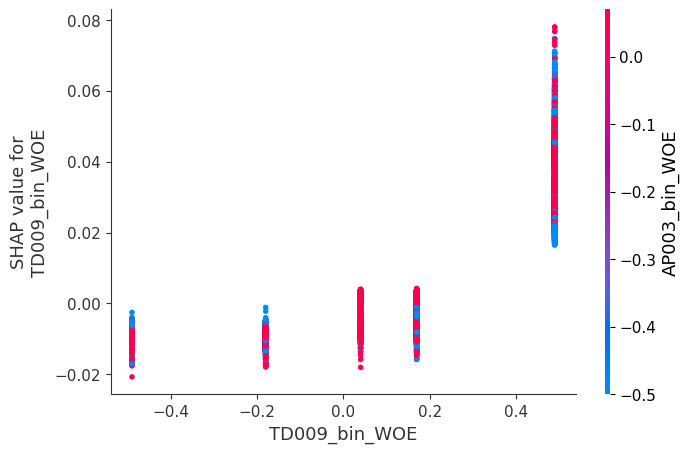

In [175]:
shap.dependence_plot("TD009_bin_WOE", shap_values, X_train)
# In this case AP003_bin_WOE highlights that it has more impact on loan default than TD009_bin_WOE.

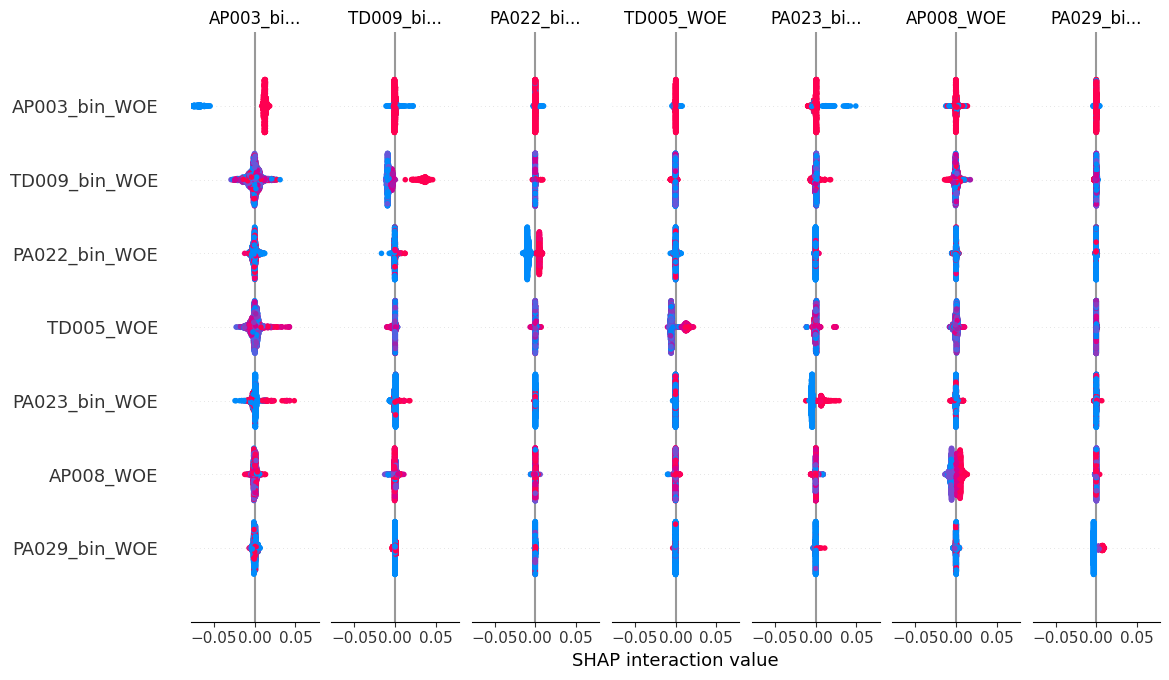

In [176]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_train.iloc[:2000,:])
shap.summary_plot(shap_interaction_values, X_train.iloc[:2000,:])

### The force_plot
#### Visualize the given SHAP values with an additive force layout.

In [185]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train, check_additivity=False)

shap.force_plot(explainer.expected_value, shap_values[0])

1. The base value is the average of all output values of the model on the training.
2. The pink (red) color features are many with small (low importance) values. The plot stacked them all together and shows their values on hover. The values represent how much those features influence the final output of the model.
3. higher/lower is a caption. It indicates if each feature value influences the prediction to a higher or lower output value.

### Descriptions for the top 5 variables
#### These descriptions help clarify how each variable's values impact the likelihood of loan default. The relationships provide insights into which factors contribute positively or negatively to the prediction of loan defaults.

1. **AP003_bin_WOE** (AP003 - CODE_EDUCATION):
   - This variable represents the education level of applicants.
   - It has a **positive** relationship with the target variable 'loan default'. Assuming the higher the values are, the lower the education levels they are with,this means that applicants with higher education levels are **less likely to default on their loans**.

2. **TD009_bin_WOE** (TD009 - TD_CNT_QUERY_LAST_3MON_P2P):
   - This variable indicates the count of queries an applicant made to peer-to-peer (P2P) lending platforms in the last 3 months.
   - It has a **positive** relationship with the target variable 'loan default'. This implies that applicants who frequently query P2P lending platforms in the recent past are **more likely to default on their loans**.

3. **PA022_bin_WOE** (PA022 - DAYS_BTW_APPLICATION_AND_FIRST_COLLECTION_OR_HIGH_RISK_CALL):
   - This variable measures the time (in days) between the applicant's loan application and the first collection or high-risk call.
   - It has a **negative** relationship with the target variable 'loan default'. This suggests that applicants who experience a shorter time gap between application and the first collection or high-risk call are **less likely to default on their loans**.

4. **CR015_bin_WOE** (CR015 - MONTH_CREDIT_CARD_MOB_MAX):
   - Assume this variable represents the maximum month of credit card usage for an applicant.
   - It has a **negative** relationship with the target variable 'loan default'. This indicates that applicants who have a lower maximum month of credit card usage are **less likely to default on their loans**.

5. **TD005_WOE** (TD005 - TD_CNT_QUERY_LAST_1MON_P2P):
   - This variable indicates the count of queries an applicant made to peer-to-peer (P2P) lending platforms in the last 1 month.
   - It has a **positive** relationship with the target variable 'loan default'. This means that applicants who recently made more queries to P2P lending platforms are **more likely to default on their loans**.

